# Project BINF-F402
## Group 2

Daan Vandenberge, daan.vandenberge@ulb.be, 000577772

Karolien Heymans, karolien.heymans@ulb.be, 000577754

Fien Strijthaegen, fien.strijthaegen@ulb.be, 000532187



In [1]:
library(xtable)
library(dplyr)

Warning message:
"package 'xtable' was built under R version 4.2.3"
Warning message:
"package 'dplyr' was built under R version 4.2.3"

Attaching package: 'dplyr'


The following objects are masked from 'package:stats':

    filter, lag


The following objects are masked from 'package:base':

    intersect, setdiff, setequal, union




## Clinical data

In [1]:
clinical_data = read.delim(file='clinical-data.tsv',sep ='\t',header=TRUE,row.names=1)# load in data with the read.delim 

In [2]:
Age = clinical_data$AGE
BMI = clinical_data$BMI
Cohort = clinical_data$COHORT
Hardy_scale = clinical_data$DTHHRDY
Heigth = clinical_data$HGHT
Ischemic_Time = clinical_data$TRISCHD
Sex = clinical_data$SEX
Weigth = clinical_data$WGHT
# every variable is assigned individually for easier work

all variables have been assigned to a vector. Next, the data is checked of there are any NA values in the clinical data.

In [3]:
any(is.na(Age))
any(is.na(BMI))
any(is.na(Cohort))
any(is.na(Hardy_scale))
any(is.na(Heigth))
any(is.na(Ischemic_Time))
any(is.na(Sex))
any(is.na(Weigth))
# this is done with the any function

[1] FALSE

[1] FALSE

[1] FALSE

[1] FALSE

[1] FALSE

[1] FALSE

[1] FALSE

[1] FALSE

every variable has no empty value

## Q1: explore clinical variables

Firstly, histogram plots are created to see how each variable is distributed in the clinical data

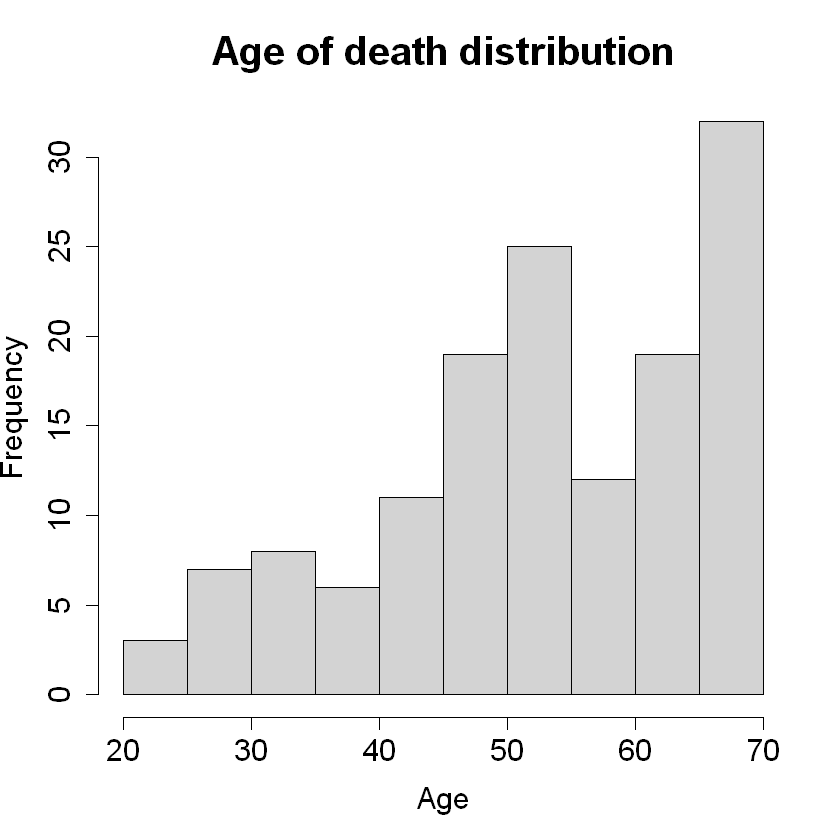

In [4]:
hist(Age, main = "Age of death distribution", xlab = "Age", ylab = "Frequency", cex.main = 2, cex.lab = 1.5, cex.axis = 1.5)
#this is done with the hist function 


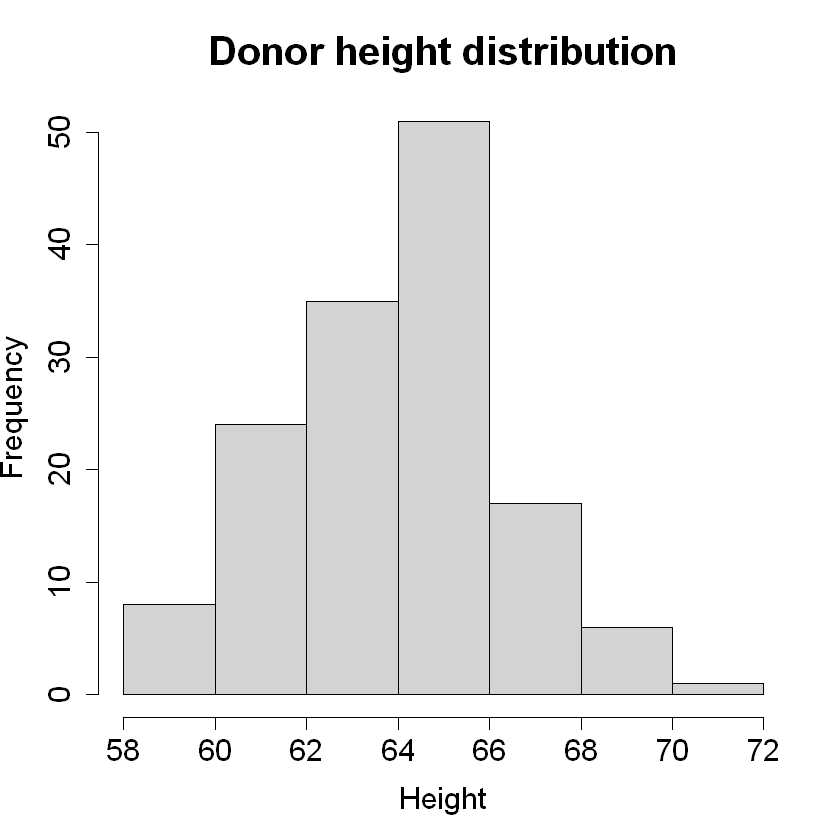

In [5]:
hist(Heigth, main = "Donor height distribution", xlab = "Height", ylab = "Frequency", cex.main = 2, cex.lab = 1.5, cex.axis = 1.5)

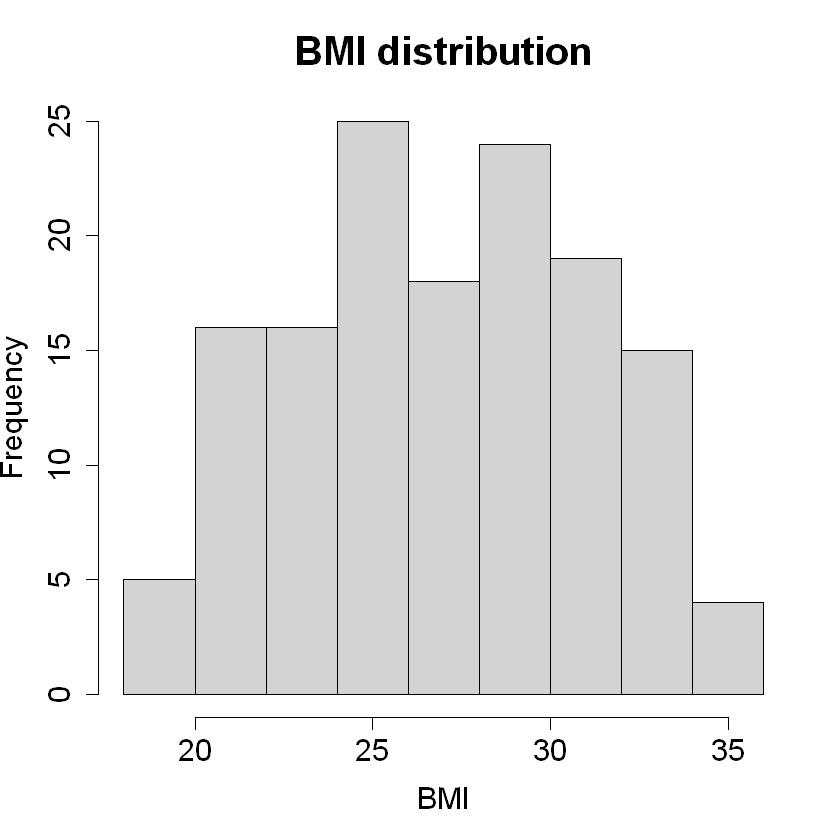

In [6]:
hist(BMI, main = "BMI distribution", xlab = "BMI", ylab = "Frequency", cex.main = 2, cex.lab = 1.5, cex.axis = 1.5)

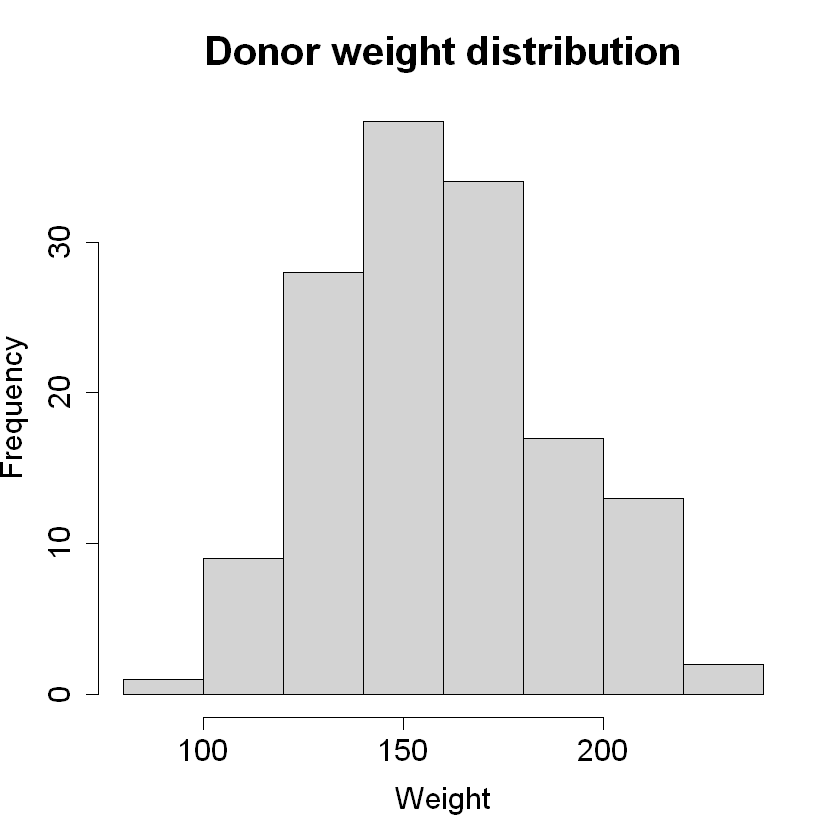

In [7]:
hist(Weigth, main = "Donor weight distribution", xlab = "Weight", ylab = "Frequency", cex.main = 2, cex.lab = 1.5, cex.axis = 1.5)

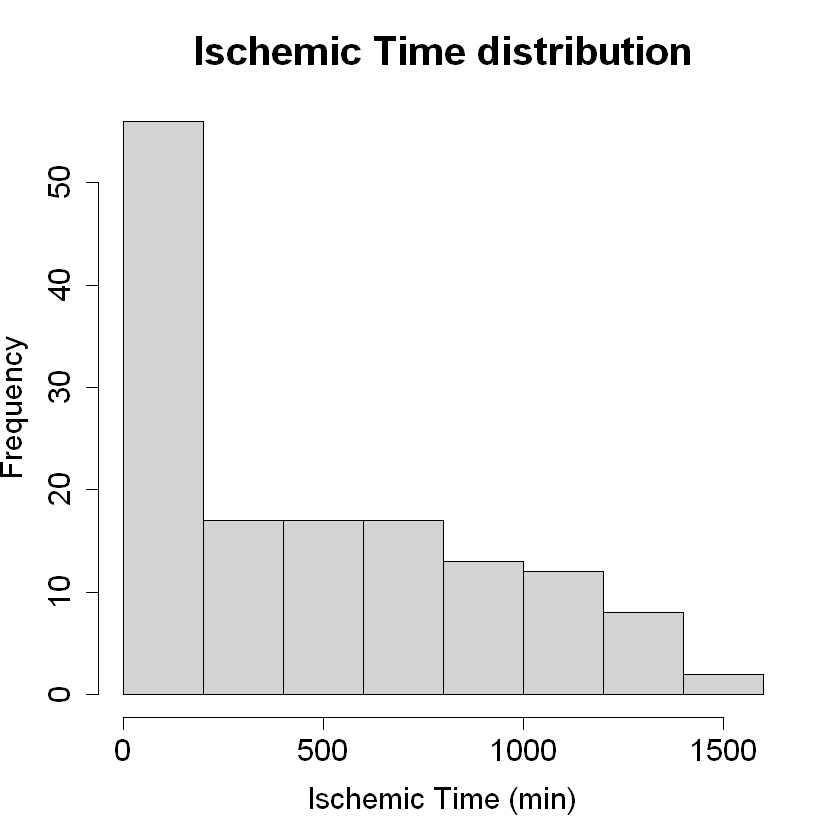

In [8]:
hist(Ischemic_Time,  main = "Ischemic Time distribution", xlab = "Ischemic Time (min)", ylab = "Frequency", cex.main = 2, cex.lab = 1.5, cex.axis = 1.5)

Warning message:
"Using `size` aesthetic for lines was deprecated in ggplot2 3.4.0.
ℹ Please use `linewidth` instead."


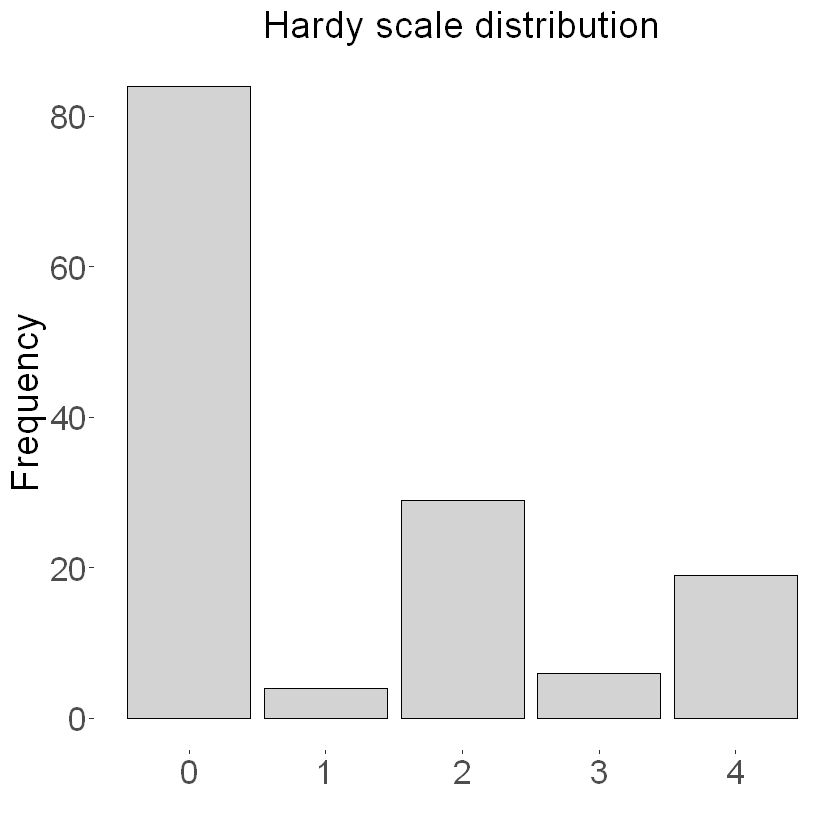

In [12]:
library(ggplot2)
       
ggplot(data = clinical_data, aes(x = DTHHRDY)) +
  geom_bar(fill = "lightgrey", color = "black", size = 0.3) +
  labs(title = "Hardy scale distribution", x = "", y = "Frequency") +
  theme(plot.title = element_text(size = 23, hjust = 0.5),
        axis.title = element_text(size = 23),
        axis.text.x = element_text(size = 20),
        axis.text.y = element_text(size = 20),
        panel.background = element_rect(fill = "white"))# for the distribution of hardy scale, we use the ggplot2 library

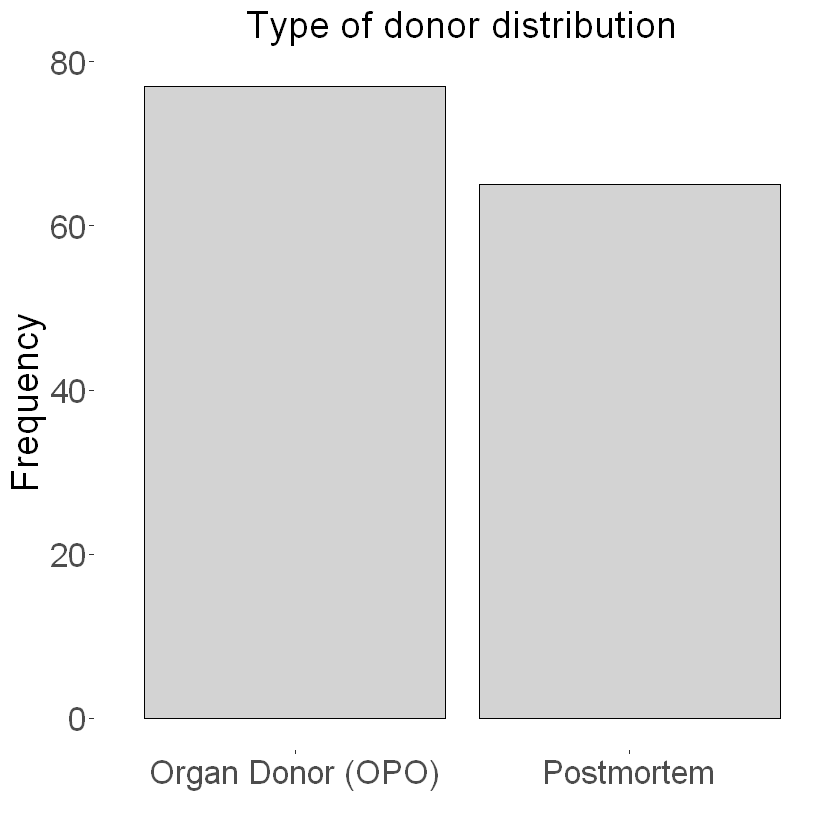

In [13]:
ggplot(data = clinical_data, aes(x = COHORT)) +
  geom_bar(fill = "lightgrey",color = "black", size = 0.3) +
  labs(title = "Type of donor distribution", x = "", y = "Frequency") +
  theme(plot.title = element_text(size = 23, hjust = 0.5),
        axis.title = element_text(size = 23),
        axis.text.x = element_text(size = 20),
        axis.text.y = element_text(size = 20),
        panel.background = element_rect(fill = "white"))#for the distribution of the donor type, we also used the ggpolt2 library
        


Next, the Shapiro-Wilik test was perfomed to test the normallity of the data for that variable

In [ ]:
shapiro.test(Age)


	Shapiro-Wilk normality test

data:  Age
W = 0.93931, p-value = 8.064e-06


In [ ]:
shapiro.test(BMI)


	Shapiro-Wilk normality test

data:  BMI
W = 0.97479, p-value = 0.009984


In [ ]:
shapiro.test(Hardy_scale)


	Shapiro-Wilk normality test

data:  Hardy_scale
W = 0.71614, p-value = 3.095e-15


In [ ]:
shapiro.test(Heigth)


	Shapiro-Wilk normality test

data:  Heigth
W = 0.98064, p-value = 0.04182


In [ ]:
shapiro.test(Ischemic_Time)



	Shapiro-Wilk normality test

data:  Ischemic_Time
W = 0.88707, p-value = 5.442e-09


In [14]:
OPO = subset(clinical_data, COHORT == "Organ Donor (OPO)")
POST = subset(clinical_data, COHORT == "Postmortem")

all x values are identical

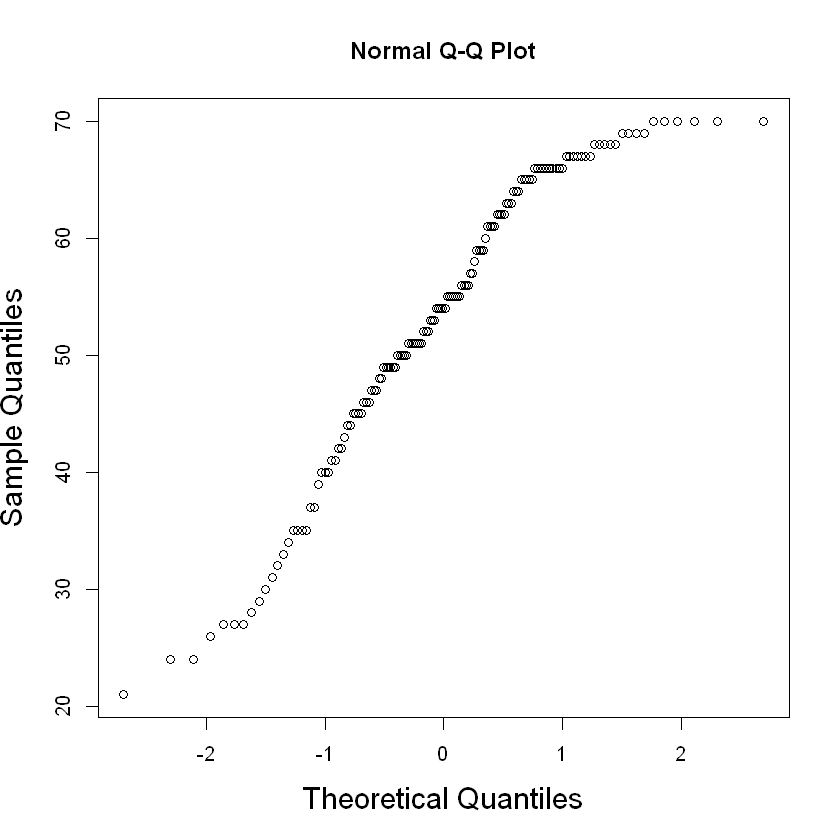

In [23]:
par(cex.lab = 1.5)  # Adjust the value as per your desired font size
qqnorm(Age)


## 1.2 Correlation of the clinical variables

The correlation can only be analyzed between the numerical clinical variables.

In [16]:
numerical_data <- clinical_data[, c("AGE", "HGHT", "WGHT", "BMI", "TRISCHD")]

In [ ]:
install.packages("corrplot")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [ ]:
library(corrplot)
library(ggplot2)

corrplot 0.92 loaded



In [17]:
correlation_matrix = cor(numerical_data, method = "spearman")
print(correlation_matrix)

                 AGE        HGHT        WGHT          BMI     TRISCHD
AGE      1.000000000 -0.03946346 -0.01047059  0.001525525  0.18672364
HGHT    -0.039463456  1.00000000  0.48052359  0.124056430  0.13886352
WGHT    -0.010470591  0.48052359  1.00000000  0.916885941  0.04901136
BMI      0.001525525  0.12405643  0.91688594  1.000000000 -0.03367039
TRISCHD  0.186723639  0.13886352  0.04901136 -0.033670390  1.00000000


The pairs() function is used to create a matrix of scatter plots for the numerical data.

now, we are going to perform the pearson correlatin test , to test the significance of the correlations

In [ ]:
cor.test(BMI, Weigth, method = "pearson")


	Pearson's product-moment correlation

data:  BMI and Weigth
t = 25.739, df = 140, p-value < 2.2e-16
alternative hypothesis: true correlation is not equal to 0
95 percent confidence interval:
 0.8748014 0.9335925
sample estimates:
      cor 
0.9085966 


In [ ]:
cor.test(Ischemic_Time, Age, method = "pearson")


	Pearson's product-moment correlation

data:  Ischemic_Time and Age
t = 2.2965, df = 140, p-value = 0.02313
alternative hypothesis: true correlation is not equal to 0
95 percent confidence interval:
 0.02664188 0.34444936
sample estimates:
     cor 
0.190533 


In [ ]:
cor.test(Weigth, Heigth, method = "pearson")


	Pearson's product-moment correlation

data:  Weigth and Heigth
t = 7.1444, df = 140, p-value = 4.536e-11
alternative hypothesis: true correlation is not equal to 0
95 percent confidence interval:
 0.3849394 0.6281347
sample estimates:
      cor 
0.5168906 


In [ ]:
cor.test(Ischemic_Time, Heigth, method = "pearson")


	Pearson's product-moment correlation

data:  Ischemic_Time and Heigth
t = 1.9277, df = 140, p-value = 0.05592
alternative hypothesis: true correlation is not equal to 0
95 percent confidence interval:
 -0.004036589  0.317124953
sample estimates:
      cor 
0.1607976 


In [ ]:
cor.test(BMI, Heigth, method = "pearson")


	Pearson's product-moment correlation

data:  BMI and Heigth
t = 1.414, df = 140, p-value = 0.1596
alternative hypothesis: true correlation is not equal to 0
95 percent confidence interval:
 -0.0469886  0.2779515
sample estimates:
      cor 
0.1186571 


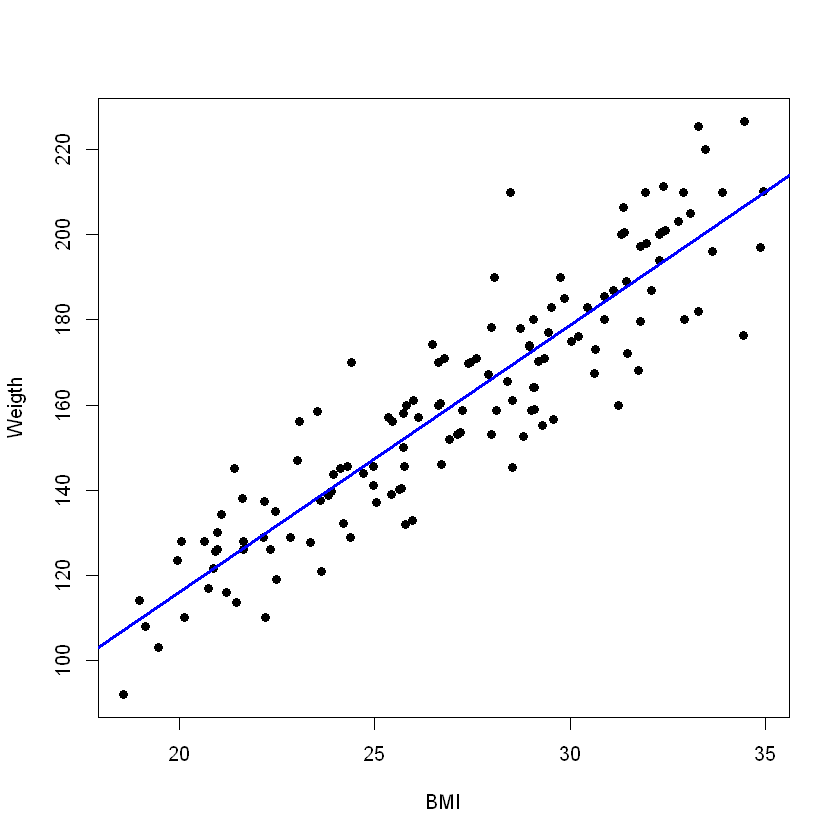

In [24]:
plot(BMI, Weigth, pch = 16)
abline(lm(Weigth ~ BMI), col = "blue", lwd = 3)

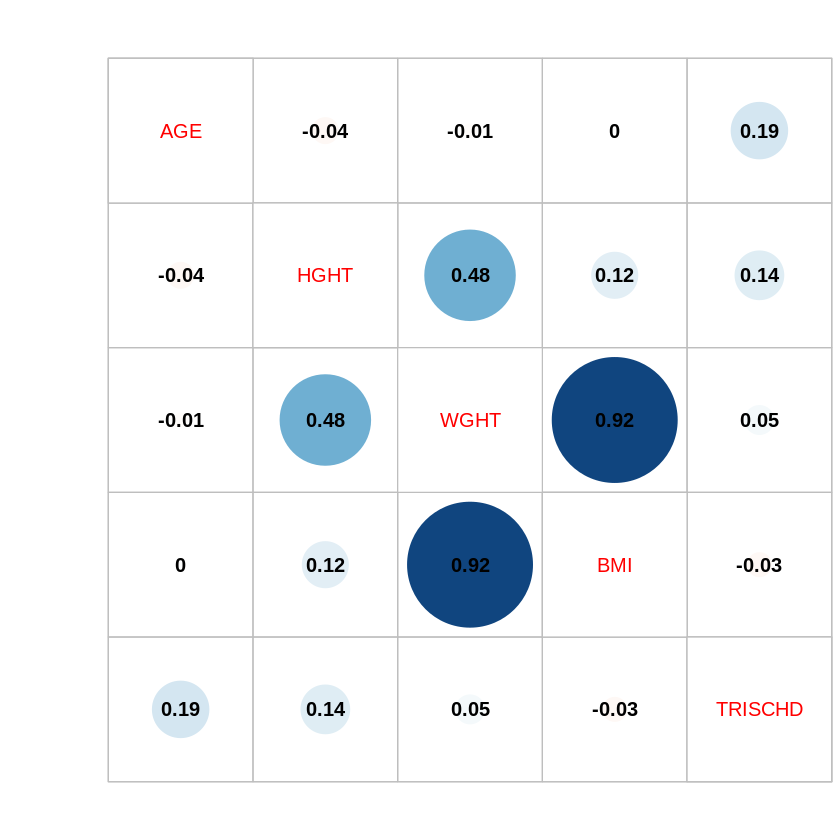

In [ ]:
#correlogram
corrplot(correlation_matrix, addCoef.col = 'black', tl.pos = 'd',
         cl.pos = 'n', col = COL2())

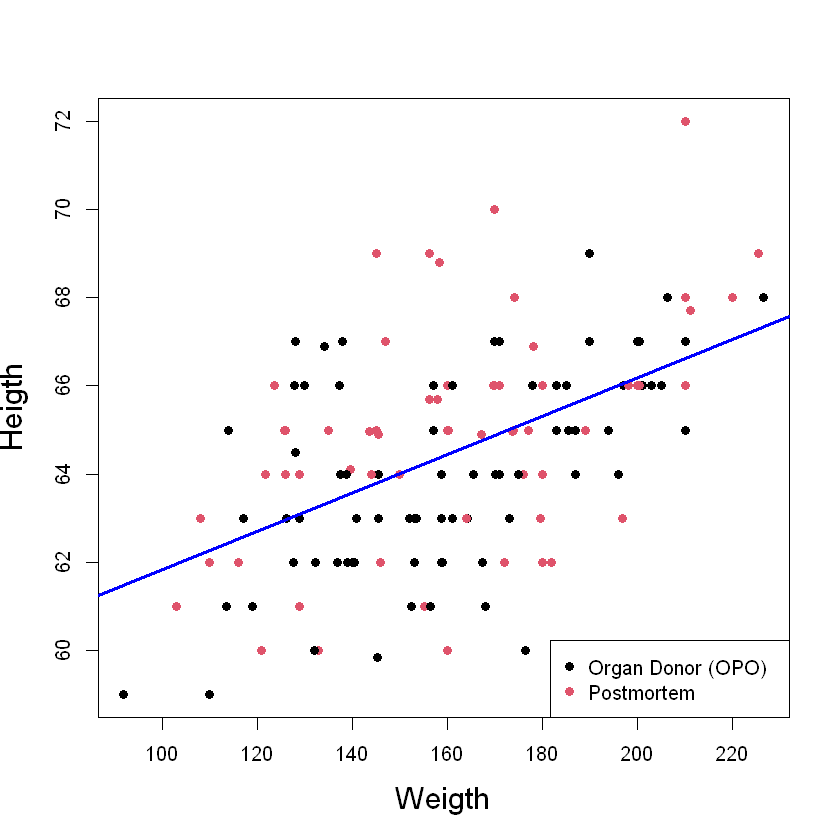

In [47]:
plot(Weigth, Heigth, pch = 16, col=factor(Cohort), cex.lab = 1.5)
abline(lm(Heigth ~ Weigth), col = "blue", lwd = 3)
legend("bottomright",
       legend = levels(factor(Cohort)),
       pch = 19,
       col = factor(levels(factor(Cohort))))
par(cex.lab = 10, cex.axis = 10)

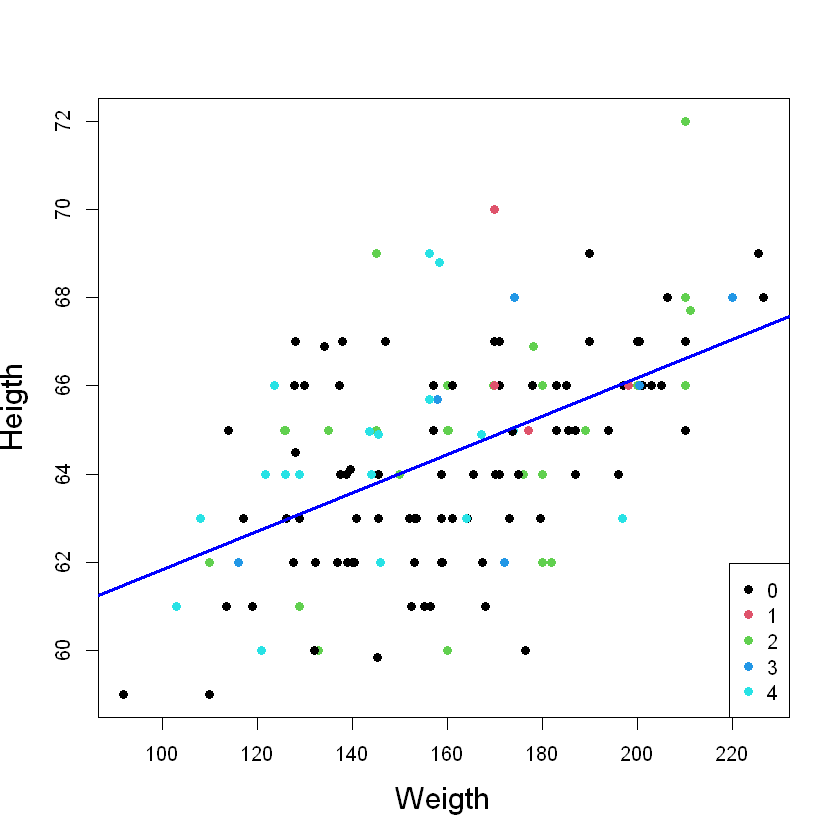

In [46]:
plot(Weigth, Heigth, pch = 16, col=factor(Hardy_scale), cex.lab = 1.5)
abline(lm(Heigth ~ Weigth), col = "blue", lwd = 3)
legend("bottomright",
       legend = levels(factor(Hardy_scale)),
       pch = 19,
       col = factor(levels(factor(Hardy_scale))))
par(cex.lab = 10, cex.axis = 10)

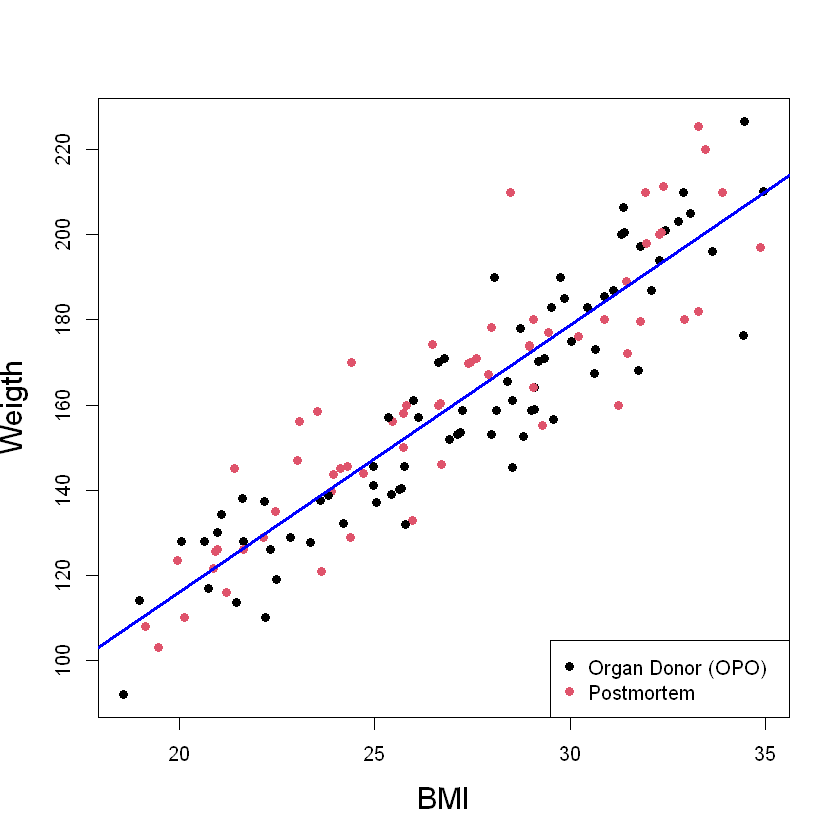

In [45]:
plot(BMI, Weigth, pch = 16, col=factor(Cohort), cex.lab = 1.5)
abline(lm(Weigth ~ BMI), col = "blue", lwd = 3)
legend("bottomright",
       legend = levels(factor(Cohort)),
       pch = 19,
       col = factor(levels(factor(Cohort))))
par(cex.lab = 10, cex.axis = 10)

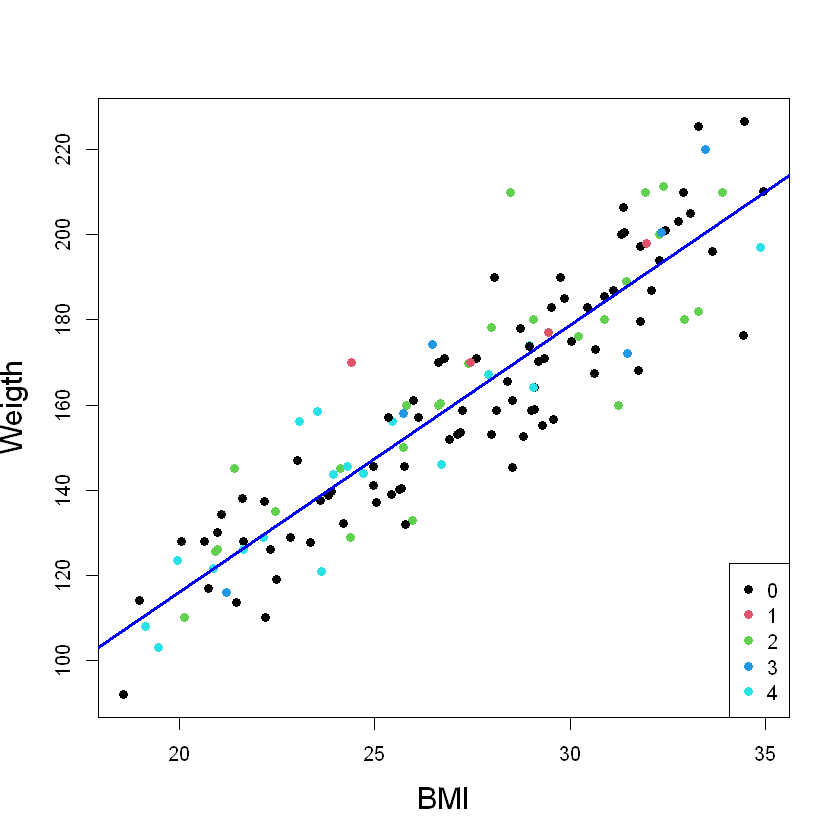

In [44]:
plot(BMI, Weigth, pch = 16, col=factor(Hardy_scale),cex.lab = 1.5)
abline(lm(Weigth ~ BMI), col = "blue", lwd = 3)
legend("bottomright",
       legend = levels(factor(Hardy_scale)),
       pch = 19,
       col = factor(levels(factor(Hardy_scale))))
par(cex.lab = 10, cex.axis = 10)

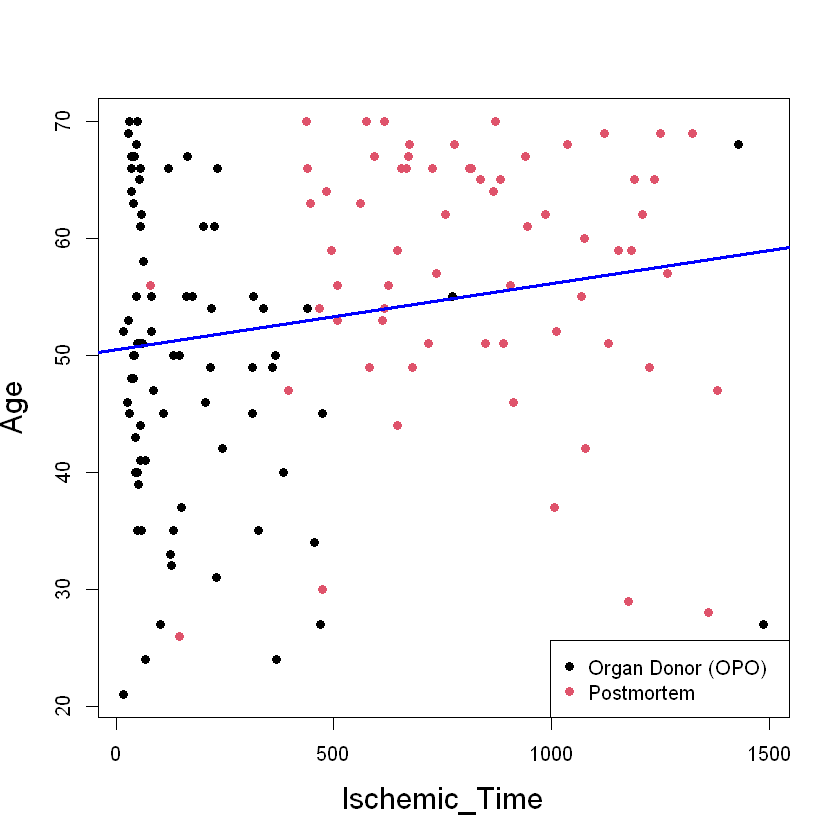

In [39]:
plot(Ischemic_Time, Age, pch = 16, col=factor(Cohort),cex.lab = 1.5)
abline(lm(Age ~ Ischemic_Time), col = "blue", lwd = 3)
legend("bottomright",
       legend = levels(factor(Cohort)),
       pch = 19,
       col = factor(levels(factor(Cohort))))
par(cex.lab = 10, cex.axis = 10)

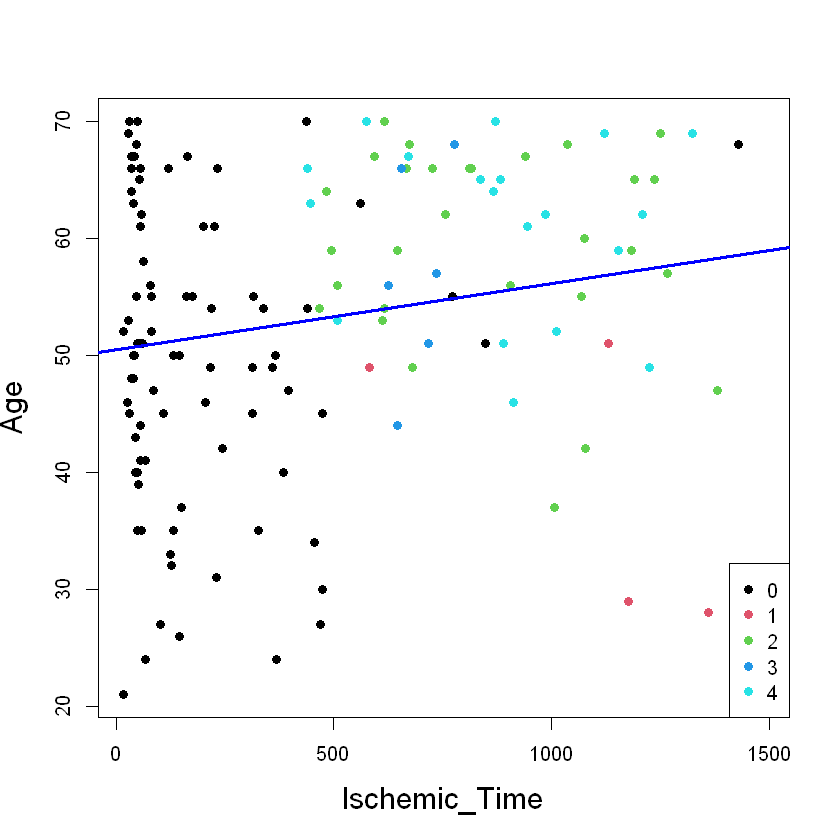

In [37]:
plot(Ischemic_Time, Age, pch = 16, col=factor(Hardy_scale),cex.lab = 1.5)
abline(lm(Age ~ Ischemic_Time), col = "blue", lwd = 3)
legend("bottomright",
       legend = levels(factor(Hardy_scale)),
       pch = 19,
       col = factor(levels(factor(Hardy_scale))))
par(cex.lab = 10, cex.axis = 10)

In [49]:
compare_table = table(as.factor(Cohort),as.factor(Hardy_scale))
print(compare_table)


                   
                     0  1  2  3  4
  Organ Donor (OPO) 77  0  0  0  0
  Postmortem         7  4 29  6 19


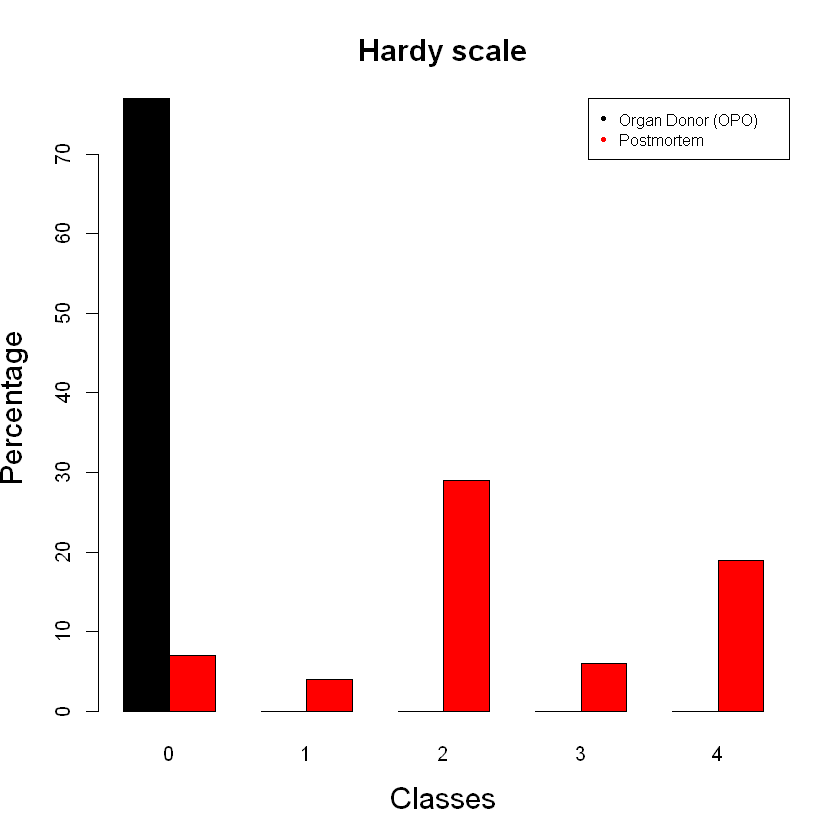

In [52]:

barplot(compare_table,
        col=c("black","red"),beside=TRUE)
title(main = "Hardy scale", cex.main = 1.5)  
title(xlab = "Classes", cex.lab = 1.5)     
title(ylab = "Percentage", cex.lab = 1.5)
legend("topright", legend=c("Organ Donor (OPO)", "Postmortem"),
       col=c("black", "red"), pch=20, cex=0.8)

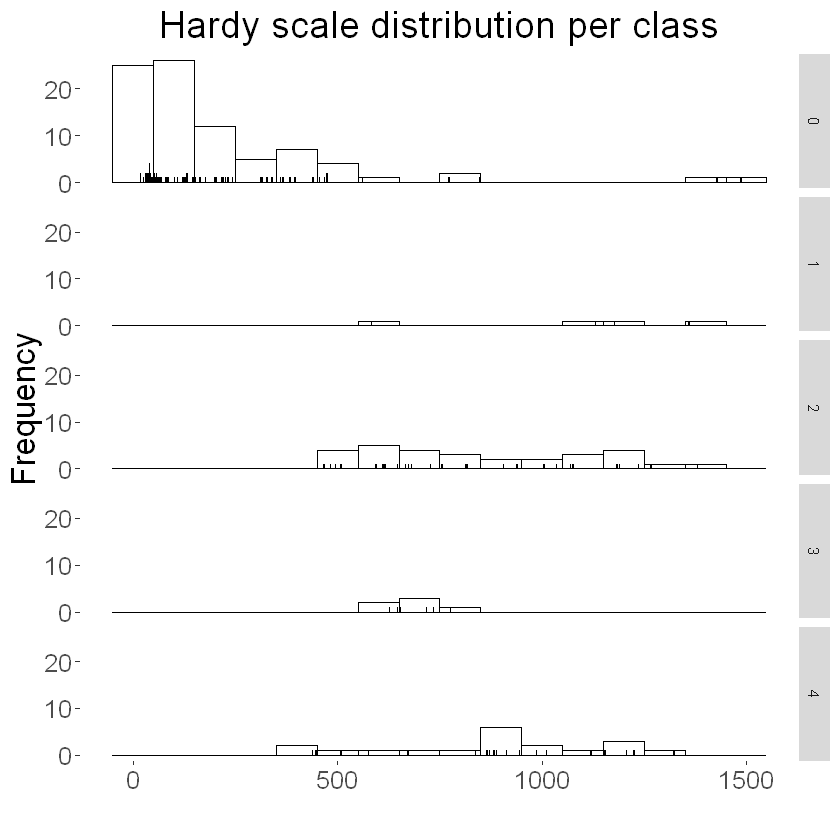

In [60]:
library(ggplot2)
ggplot(clinical_data, aes(x=TRISCHD)) +
  geom_histogram(fill="white", colour="black", binwidth=100) +
  facet_grid(DTHHRDY ~ .) +
  geom_bar(fill = "lightgrey", color = "black", size = 0.3) +
  labs(title = "Hardy scale distribution per class", x = "", y = "Frequency") +
  theme(plot.title = element_text(size = 23, hjust = 0.5),
        axis.title = element_text(size = 20),
        axis.text.x = element_text(size = 15),
        axis.text.y = element_text(size = 15),
        panel.background = element_rect(fill = "white"))



PCA analysis

Next , The PCA analysis was performed, using the prcomp function.First a subset of the data was created, that only contains the numerical elements

Importance of components:
                          PC1    PC2    PC3    PC4     PC5
Standard deviation     1.4502 1.1063 0.9805 0.8421 0.04849
Proportion of Variance 0.4206 0.2448 0.1923 0.1418 0.00047
Cumulative Proportion  0.4206 0.6654 0.8577 0.9995 1.00000

[1] 2.103098742 1.223966912 0.961392693 0.709190800 0.002350852
[1] 42.06197484 24.47933824 19.22785387 14.18381601  0.04701705


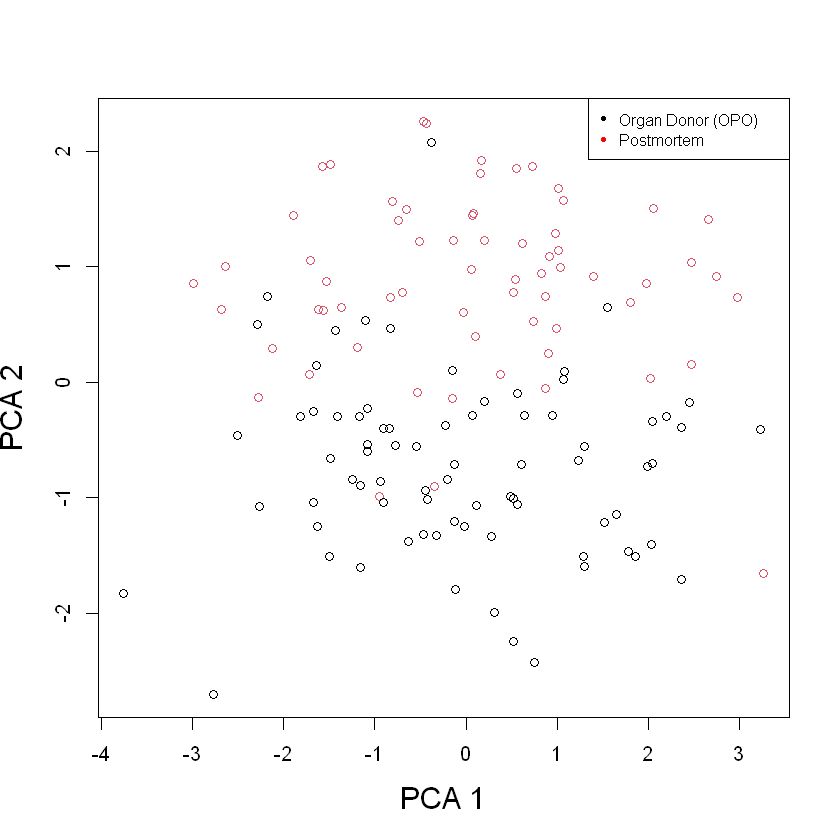

In [66]:
num_data = clinical_data[,c(2, 3, 4, 5, 8)]
PCA_data = scale(num_data)

PCA_analysis = prcomp(PCA_data, center = TRUE, scale. = TRUE)
summary(PCA_analysis)
plot(PCA_analysis$x[,1], PCA_analysis$x[,2], xlab = "PCA 1", ylab = "PCA 2", col = factor(Cohort), cex.lab = 1.5) 
legend("topright", legend=c("Organ Donor (OPO)", "Postmortem"),
       col=c("black", "red"), pch=20, cex=0.8)

# Add the dots representing the observations to the biplot
#invisible(text(PCA_analysis$x[,1], PCA_analysis$x[,2], labels = ".", cex = 2))

# Add a legend for the arrows representing the variables



print(PCA_analysis$sdev^2)# print out the eigenvalues
print(PCA_analysis$sdev^2/sum(PCA_analysis$sdev^2)*100)#percentage of variance explained by the pca




The PCA graph was created using the 'factoextra package'

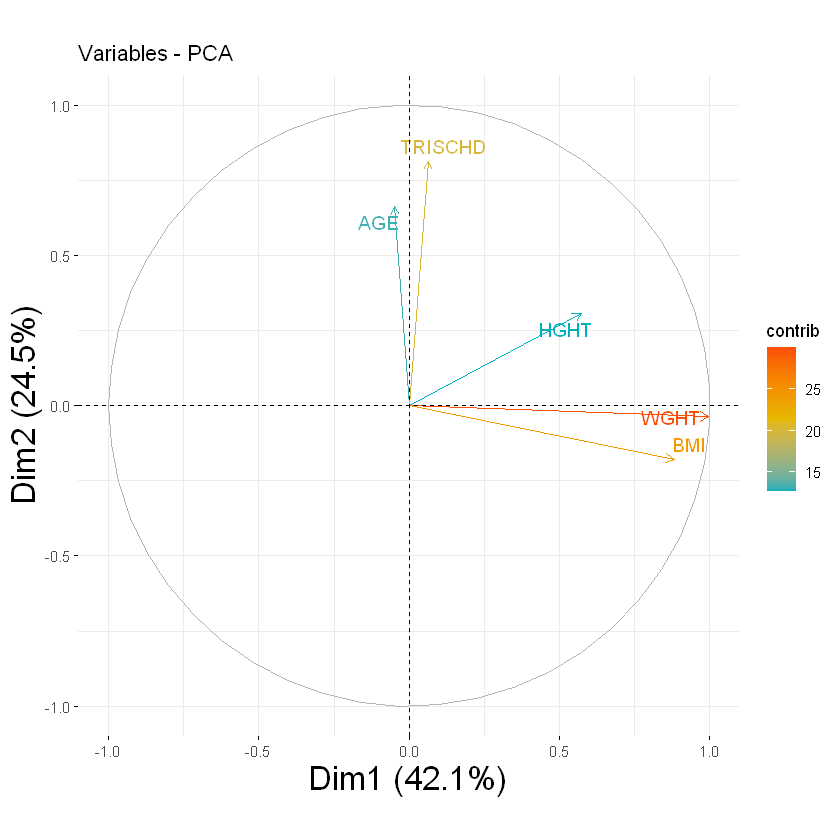

In [73]:
#install.packages("factoextra")
library(factoextra)
fviz_pca_var(PCA_analysis,col.var = "contrib", gradient.cols = c("#00AFBB", "#E7B800", "#FC4E07"), repel = TRUE) + 
  theme(axis.title = element_text(size = 20))


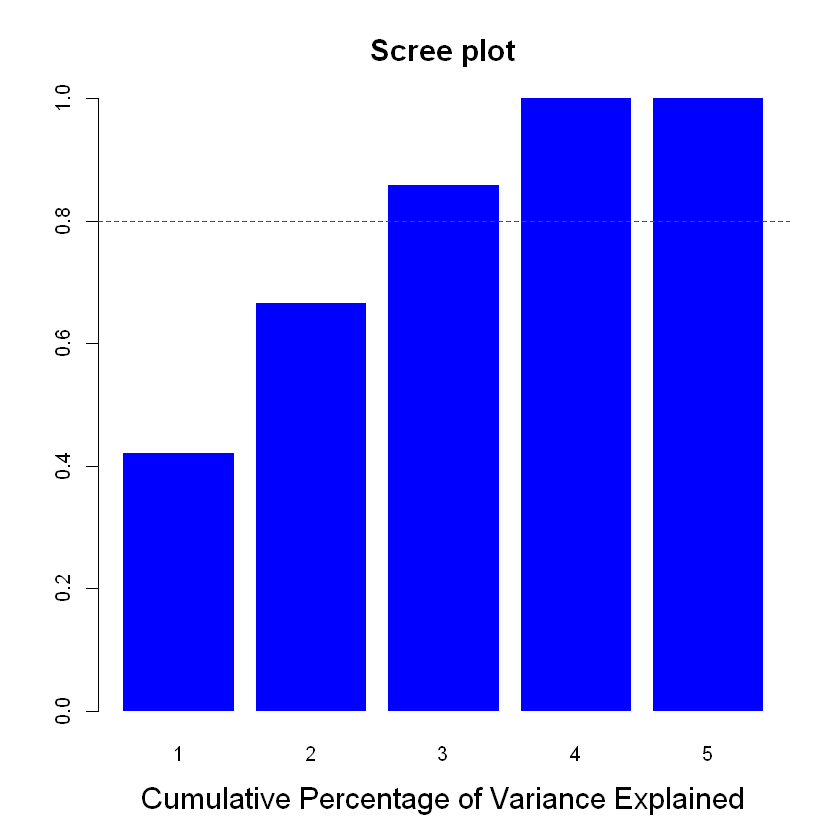

In [70]:
variances = PCA_analysis$sdev^2 / sum(PCA_analysis$sdev^2)
cum_variances = cumsum(variances)
barplot(cum_variances, main = "Scree plot", xlab = "Cumulative Percentage of Variance Explained", col = "blue", border = NA, names.arg = 1:length(cum_variances),cex.lab=1.5, cex.main=1.5)
abline(h = 0.8, lty = 2, col = "red")

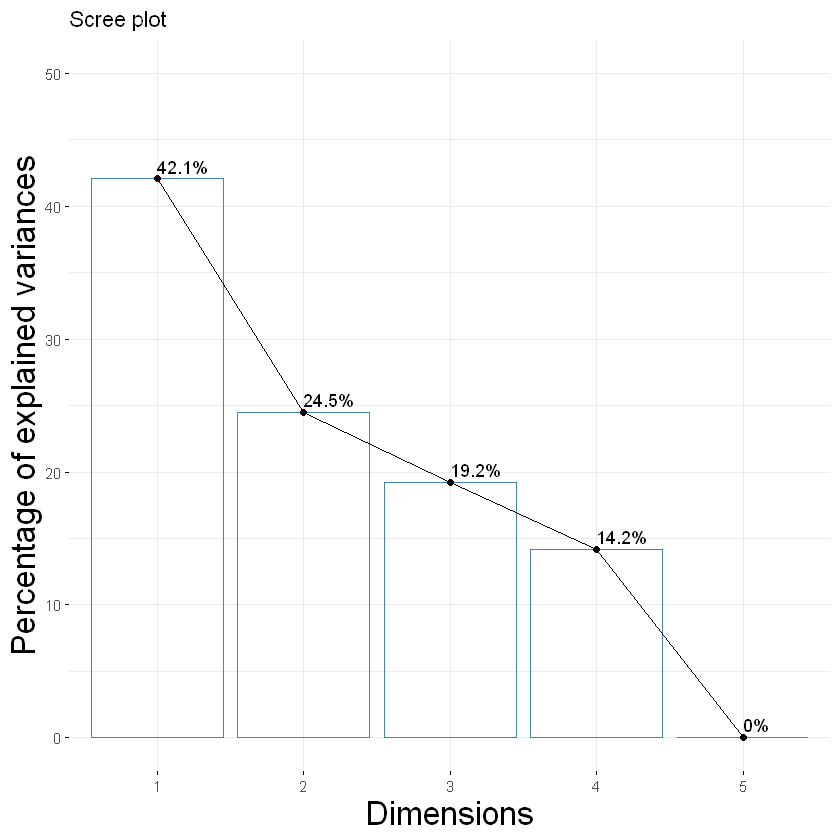

In [72]:
#prop_var = 100 * PCA_analysis$sdev^2 / sum(PCA_analysis$sdev^2)
#screeplot(PCA_analysis, type = "l", main = "Scree Plot", ylim = c(0, 60), 
          #ylab = "Percentage of variance explained", axes = FALSE)
#axis(2, at = seq(0, 60, by = 10), labels = seq(0, 60, by = 10))
#lines(prop_var, type = "b", pch = 19, col = "red")
fviz_eig(PCA_analysis, addlabels = TRUE, ylim = c(0, 50), barfill = cumsum(PCA_analysis$sdev^2)/sum(PCA_analysis$sdev^2)) + 
   theme(axis.title = element_text(size = 20)) 

In [74]:
head(PCA_data)

,AGE,HGHT,WGHT,BMI,TRISCHD
GTEX-1122O-0226,0.86772570,0.64160652,1.49574031,1.3791798,-1.0406059
GTEX-1128S-0126,1.02733328,0.64160652,-0.00743612,-0.2927816,0.8214603
GTEX-113JC-0126,-0.01011597,1.01578428,0.62879204,0.2300075,0.3326977
GTEX-11DXX-0226,1.02733328,0.01797693,-1.12607905,-1.3022222,-0.9905375
GTEX-11EM3-0126,-2.56383722,-2.26866492,-1.75531569,-1.1624906,-1.0811374
GTEX-11EMC-0226,1.02733328,-1.02140573,-1.75531569,-1.6660063,0.4638291


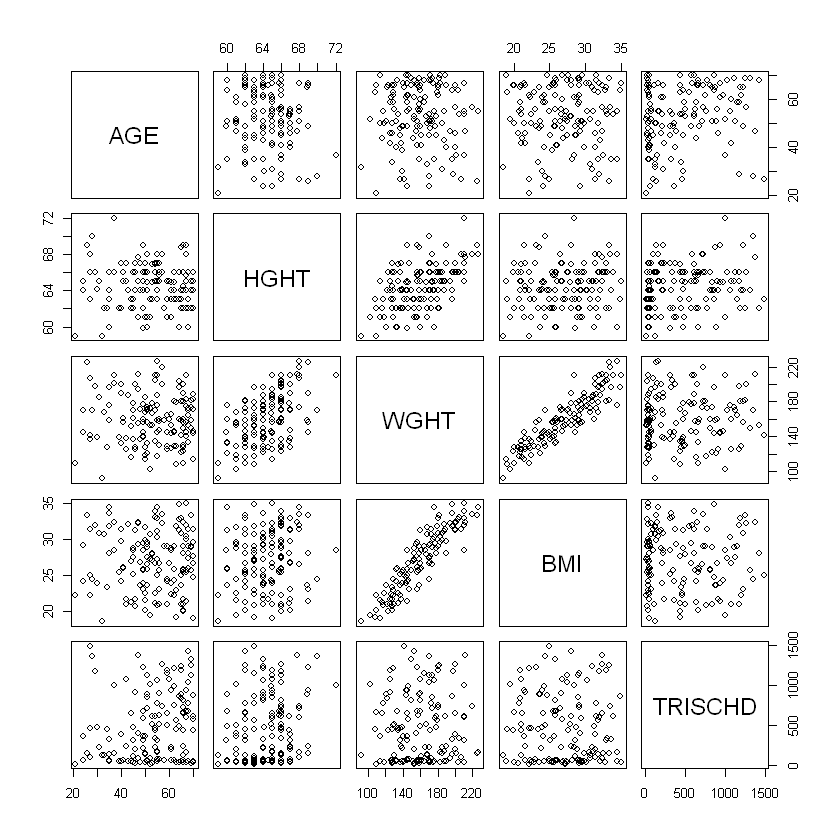

In [75]:
pairs(numerical_data)

## RNA read counts

In [2]:
rna_counts = read.delim(file='RNA-read-counts.tsv',sep ='\t',header=TRUE,row.names=1)
head(rna_counts)

,Description,GTEX.1122O.0226,GTEX.1128S.0126,GTEX.113JC.0126,GTEX.11DXX.0226,GTEX.11EM3.0126,GTEX.11EMC.0226,GTEX.11GSP.0126,GTEX.11I78.0526,GTEX.11P81.0126,⋯,GTEX.1PBJI.0726,GTEX.1QCLZ.0626,GTEX.1QEPI.0726,GTEX.1QP28.0626,GTEX.1QP67.0326,GTEX.1QPFJ.0626,GTEX.1R46S.0426,GTEX.1R9JW.0226,GTEX.1RDX4.0926,GTEX.1S5ZU.0726
,<chr>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,⋯,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>
ENSG00000223972.5,DDX11L1,0,0,0,1,0,0,0,0,0,⋯,0,1,0,0,1,0,0,0,0,1
ENSG00000227232.5,WASH7P,132,259,87,207,122,251,99,125,119,⋯,202,173,164,85,288,183,136,74,168,169
ENSG00000278267.1,MIR6859-1,0,0,0,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0
ENSG00000243485.5,MIR1302-2HG,0,1,1,0,3,0,0,0,0,⋯,0,0,1,0,0,0,0,0,1,0
ENSG00000237613.2,FAM138A,0,0,0,0,1,0,0,0,0,⋯,0,1,0,0,0,0,0,1,0,0
ENSG00000268020.3,OR4G4P,0,0,0,1,1,0,1,1,0,⋯,0,2,1,0,1,0,0,1,0,1


## Morphological counts

In [3]:
morph_counts = read.delim(file='morphological-counts.tsv', sep='\t', header=TRUE, row.names=1)
head(morph_counts)

,Mophological.cluster.0,Mophological.cluster.1,Mophological.cluster.2,Mophological.cluster.3,Mophological.cluster.4,Mophological.cluster.5,Mophological.cluster.6,Mophological.cluster.7,Mophological.cluster.8,Mophological.cluster.9,⋯,Mophological.cluster.54,Mophological.cluster.55,Mophological.cluster.56,Mophological.cluster.57,Mophological.cluster.58,Mophological.cluster.59,Mophological.cluster.60,Mophological.cluster.61,Mophological.cluster.62,Mophological.cluster.63
,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,⋯,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>
GTEX-1122O-0226,171,133,105,235,13,399,350,681,484,105,⋯,146,264,50,44,30,98,1069,686,513,84
GTEX-1128S-0126,198,60,131,345,261,332,186,285,176,135,⋯,7,416,65,378,63,12,655,199,207,334
GTEX-113JC-0126,175,95,73,160,48,163,93,398,301,56,⋯,65,224,153,29,5,3,438,232,115,34
GTEX-11DXX-0226,79,52,144,20,30,177,177,18,462,213,⋯,93,270,72,69,63,3,131,285,67,43
GTEX-11EM3-0126,20,22,107,74,49,589,466,88,49,140,⋯,99,41,150,18,2,2,193,44,66,24
GTEX-11EMC-0226,24,35,161,50,233,84,29,42,76,65,⋯,26,77,114,218,2,0,110,19,10,70


In [78]:
if (!require("BiocManager", quietly = TRUE))
    install.packages("BiocManager")
BiocManager::install("DESeq2")

Installing package into 'C:/Users/cobot/AppData/Local/R/win-library/4.3'
(as 'lib' is unspecified)



package 'BiocManager' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\cobot\AppData\Local\Temp\RtmpKApZ31\downloaded_packages


'getOption("repos")' replaces Bioconductor standard repositories, see
'help("repositories", package = "BiocManager")' for details.
Replacement repositories:
    CRAN: https://cran.r-project.org

Bioconductor version 3.17 (BiocManager 1.30.20), R 4.3.0 (2023-04-21 ucrt)

Installing package(s) 'BiocVersion', 'DESeq2'

also installing the dependencies 'bitops', 'formatR', 'RCurl', 'GenomeInfoDbData', 'zlibbioc', 'lambda.r', 'futile.options', 'GenomeInfoDb', 'XVector', 'MatrixGenerics', 'S4Arrays', 'DelayedArray', 'futile.logger', 'snow', 'BH', 'S4Vectors', 'IRanges', 'GenomicRanges', 'SummarizedExperiment', 'BiocGenerics', 'Biobase', 'BiocParallel', 'matrixStats', 'locfit', 'RcppArmadillo'




package 'bitops' successfully unpacked and MD5 sums checked
package 'formatR' successfully unpacked and MD5 sums checked
package 'RCurl' successfully unpacked and MD5 sums checked
package 'zlibbioc' successfully unpacked and MD5 sums checked
package 'lambda.r' successfully unpacked and MD5 sums checked
package 'futile.options' successfully unpacked and MD5 sums checked
package 'GenomeInfoDb' successfully unpacked and MD5 sums checked
package 'XVector' successfully unpacked and MD5 sums checked
package 'MatrixGenerics' successfully unpacked and MD5 sums checked
package 'S4Arrays' successfully unpacked and MD5 sums checked
package 'DelayedArray' successfully unpacked and MD5 sums checked
package 'futile.logger' successfully unpacked and MD5 sums checked
package 'snow' successfully unpacked and MD5 sums checked
package 'BH' successfully unpacked and MD5 sums checked
package 'S4Vectors' successfully unpacked and MD5 sums checked
package 'IRanges' successfully unpacked and MD5 sums checked


installing the source package 'GenomeInfoDbData'


Installation paths not writeable, unable to update packages
  path: C:/Program Files/R/R-4.3.0/library
  packages:
    class, KernSmooth, MASS, Matrix, nnet

Old packages: 'clock', 'future.apply', 'httpuv', 'httr2', 'igraph', 'knitr',
  'pROC', 'RSNNS', 'sys', 'tzdb', 'waldo'



In [5]:
library("DESeq2")
library(ggplot2)

Loading required package: S4Vectors

Loading required package: stats4

Loading required package: BiocGenerics


Attaching package: 'BiocGenerics'


The following objects are masked from 'package:stats':

    IQR, mad, sd, var, xtabs


The following objects are masked from 'package:base':

    anyDuplicated, append, as.data.frame, basename, cbind, colnames,
    dirname, do.call, duplicated, eval, evalq, Filter, Find, get, grep,
    grepl, intersect, is.unsorted, lapply, Map, mapply, match, mget,
    order, paste, pmax, pmax.int, pmin, pmin.int, Position, rank,
    rbind, Reduce, rownames, sapply, setdiff, sort, table, tapply,
    union, unique, unsplit, which.max, which.min



Attaching package: 'S4Vectors'


The following objects are masked from 'package:base':

    expand.grid, I, unname


Loading required package: IRanges


Attaching package: 'IRanges'


The following object is masked from 'package:grDevices':

    windows


Loading required package: GenomicRanges

Loading required p

In [80]:
install.packages("corrplot")

Installing package into 'C:/Users/cobot/AppData/Local/R/win-library/4.3'
(as 'lib' is unspecified)



package 'corrplot' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\cobot\AppData\Local\Temp\RtmpKApZ31\downloaded_packages


In [81]:
library(corrplot)


corrplot 0.92 loaded



 Q2: clinical data vs. morphology
1) Compute systematically associations between clinical variables and morphological cluster counts. The purpose is to compare the magnitude of the associations of the different variables with morphology.
2) Discuss the association with technical variables.
3) For non-technical variables, redo the analysis with adjustment for the confounding technical variables, if any is reported in Q2.2. Report and discuss significant associations.

In [82]:
#load data
clinical_data = read.delim(file='clinical-data.tsv',sep ='\t',header=TRUE,row.names=1)

In [83]:
#DTHHRDY is a categorical variable, set its type to character to that it can be viewed as such by deseq2
clinical_data$DTHHRDY <- as.character(clinical_data$DTHHRDY)

In [84]:
morph_counts = t(read.delim(file='morphological-counts.tsv', sep='\t', header=TRUE, row.names=1))

In [85]:
#Take out "Morphological.cluster" from column names for brevity's sake
row.names(morph_counts) = gsub("Mophological.cluster.", "", row.names(morph_counts))

Automatically generates interesting plots in function of var. All plots are saved under morph_plots/ and file names end in the variable name. In case of a categorical variable, there are some extra plots that can begenerated lile plotCounts and volcano plot. These are not interesting. for the other variables because they are typically made in a "cancer/no cancer" type situation, this can be an interesting style of analysis for e.g. postmortem/donor, but not for weight or height.

In [96]:
morph_analysis <- function(var, formula, categorical) {
  
  #construct DESEQDataset object
  #we don't normalize the counts since the tutorial from bioconductor
  #says deseq2 does not expect that: 
  #https://www.bioconductor.org/packages/devel/bioc/vignettes/DESeq2/inst/doc/DESeq2.html#why-un-normalized-counts
  
  #dds holds the read counts. The design formula expresses the variables
  #which will be used in modeling, it is used to estimate the dispersion
  #and to estimate the log2 fold changes of the model
  
  #We will not be pre-filtering low count clusters since we are only working
  #with 64 clusters instead of hundreds or thousands of genes
  #https://www.bioconductor.org/packages/devel/bioc/vignettes/DESeq2/inst/doc/DESeq2.html#pre-filtering
  dds = DESeqDataSetFromMatrix(countData = morph_counts, 
                               colData = clinical_data,
                               design = formula)
  #Run DESeq function
  dds = DESeq(dds)
  res = results(dds)
  #summary of the differential morphology expression
  summary(res)
  
  #Plotting adjusted p-values for each morphological cluster
  #We will go with the default cutoff value 0.1 for padj
  #https://www.bioconductor.org/packages/devel/bioc/vignettes/DESeq2/inst/doc/DESeq2.html#p-values-and-adjusted-p-values
  #The more dots below the line, the more clusters are significantly linked
  #to the chosen clinical/technical variable(s)
  plot(rownames(morph_counts),xlab = "mean of normalized counts", ylab = "log fold change", cex.lab = 1.5, res$padj)
  abline(h=0.1, col="red")
  
  #Normalized counts of cluster
  #Shows the log2 fold changes attributable to a given variable over the mean
  #of normalized counts for all the samples in the data set
  #https://www.bioconductor.org/packages/devel/bioc/vignettes/DESeq2/inst/doc/DESeq2.html#ma-plot
  plotMA(res, cex.lab = 1.5)
  #TODO: bigger dots
  
  #sort results by p-value
  res <- na.omit(res[order(res$padj),])
  
  #Save list of most significant clusters
  #cutoff: padj has to be smaller than 0.1
  sign_clusters = res[res$padj < 0.1,]
  print(sign_clusters)
  
  #Plot the counts of the clusters with the 10 lowest adjusted p-values, one plot per cluster
  #https://www.bioconductor.org/packages/devel/bioc/vignettes/DESeq2/inst/doc/DESeq2.html#plot-counts
  if (categorical) {
    clusters = rownames(head(res,10))
    for (cluster in clusters) {
      plotCounts(dds, gene=cluster, intgroup=var, main=paste("Cluster ",cluster,sep=""), cex.lab = 1.5)
    }
  }
  
  #Volcano plot
  #Blue = padj < 0.1
  #Red = padj < 0.1 and fold change > 2
  #https://en.wikipedia.org/wiki/Volcano_plot_(statistics)
  par(mfrow=c(1,1))
  with(res, plot(log2FoldChange, -log10(pvalue), pch=19, main=paste("Volcano plot ", var,sep=""), xlim=c(-3,3), cex.lab = 1.5))
  with(subset(res, padj<.01 ), points(log2FoldChange, -log10(pvalue), pch=19, col="blue"))
  with(subset(res, padj<.01 & abs(log2FoldChange)>2), points(log2FoldChange, -log10(pvalue), pch=19, col="red"))
  legend(x="topright", 
         legend=c("Padj > 0.1", "Padj < 0.1", "Padh < 0.1 and log2FC > 2"),
         col=c("black", "blue", "red"),
         pch=19)
 
  
  #PCA
  #TODO???
}

  the design formula contains one or more numeric variables with integer values,
  specifying a model with increasing fold change for higher values.
  did you mean for this to be a factor? if so, first convert
  this variable to a factor using the factor() function

  the design formula contains one or more numeric variables that have mean or
  standard deviation larger than 5 (an arbitrary threshold to trigger this message).
  Including numeric variables with large mean can induce collinearity with the intercept.
  Users should center and scale numeric variables in the design to improve GLM convergence.

estimating size factors

estimating dispersions

gene-wise dispersion estimates

mean-dispersion relationship

-- note: fitType='parametric', but the dispersion trend was not well captured by the
   function: y = a/x + b, and a local regression fit was automatically substituted.
   specify fitType='local' or 'mean' to avoid this message next time.

final dispersion estimates

fitting 


out of 64 with nonzero total read count
adjusted p-value < 0.1
LFC > 0 (up)       : 16, 25%
LFC < 0 (down)     : 17, 27%
outliers [1]       : 2, 3.1%
low counts [2]     : 0, 0%
(mean count < 12)
[1] see 'cooksCutoff' argument of ?results
[2] see 'independentFiltering' argument of ?results



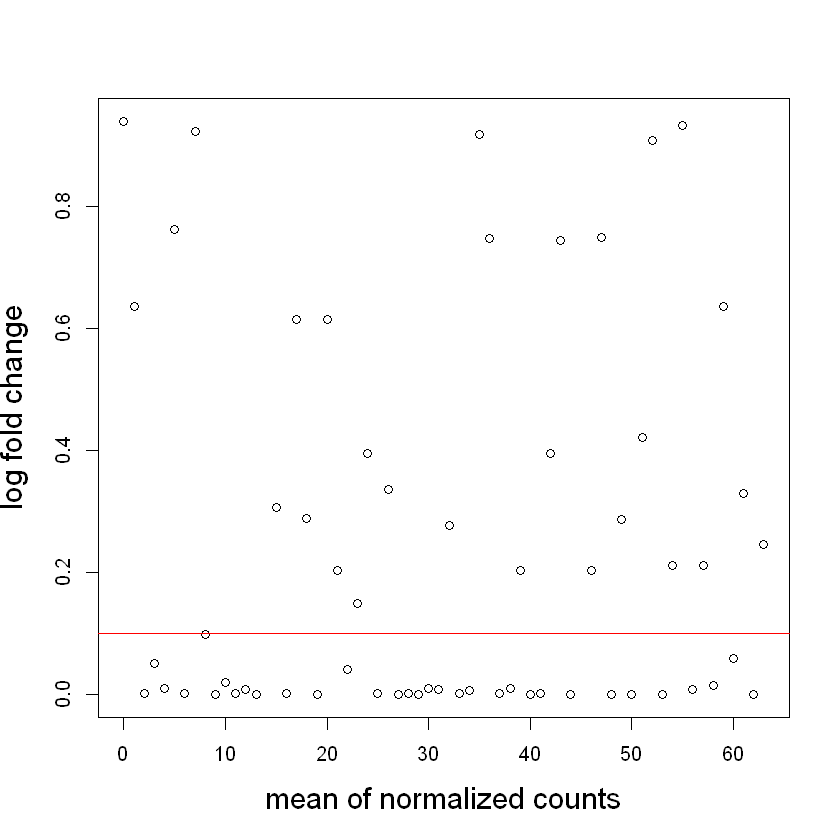

log2 fold change (MLE): AGE 
Wald test p-value: AGE 
DataFrame with 33 rows and 6 columns
     baseMean log2FoldChange      lfcSE      stat      pvalue        padj
    <numeric>      <numeric>  <numeric> <numeric>   <numeric>   <numeric>
44   172.3732      0.0397693 0.00719482   5.52749 3.24849e-08 2.01407e-06
40   182.7025      0.0605038 0.01141546   5.30016 1.15701e-07 3.58673e-06
50   188.2888      0.0570618 0.01102518   5.17559 2.27195e-07 4.69537e-06
53    92.9895     -0.0401842 0.00809008  -4.96709 6.79646e-07 1.05345e-05
62   104.8641     -0.0489837 0.01059072  -4.62515 3.74319e-06 4.64155e-05
...       ...            ...        ...       ...         ...         ...
10    93.3999     -0.0257011 0.00992884  -2.58853  0.00963868   0.0206068
22    31.5082     -0.0307420 0.01322763  -2.32407  0.02012158   0.0415846
3    110.1487     -0.0201276 0.00902577  -2.23001  0.02574649   0.0514930
60   156.7795      0.0182298 0.00842876   2.16280  0.03055621   0.0592027
8    121.9710      0.0

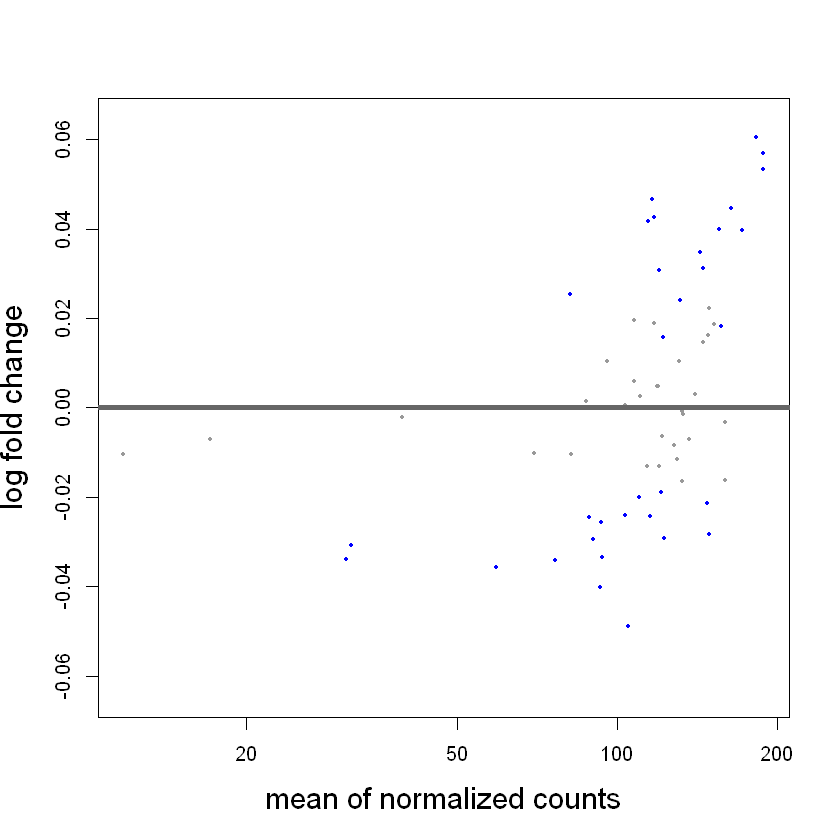

  the design formula contains one or more numeric variables that have mean or
  standard deviation larger than 5 (an arbitrary threshold to trigger this message).
  Including numeric variables with large mean can induce collinearity with the intercept.
  Users should center and scale numeric variables in the design to improve GLM convergence.

estimating size factors

estimating dispersions

gene-wise dispersion estimates

mean-dispersion relationship

final dispersion estimates

fitting model and testing

-- replacing outliers and refitting for 3 genes
-- DESeq argument 'minReplicatesForReplace' = 7 
-- original counts are preserved in counts(dds)

estimating dispersions

fitting model and testing




out of 64 with nonzero total read count
adjusted p-value < 0.1
LFC > 0 (up)       : 21, 33%
LFC < 0 (down)     : 6, 9.4%
outliers [1]       : 3, 4.7%
low counts [2]     : 0, 0%
(mean count < 9)
[1] see 'cooksCutoff' argument of ?results
[2] see 'independentFiltering' argument of ?results



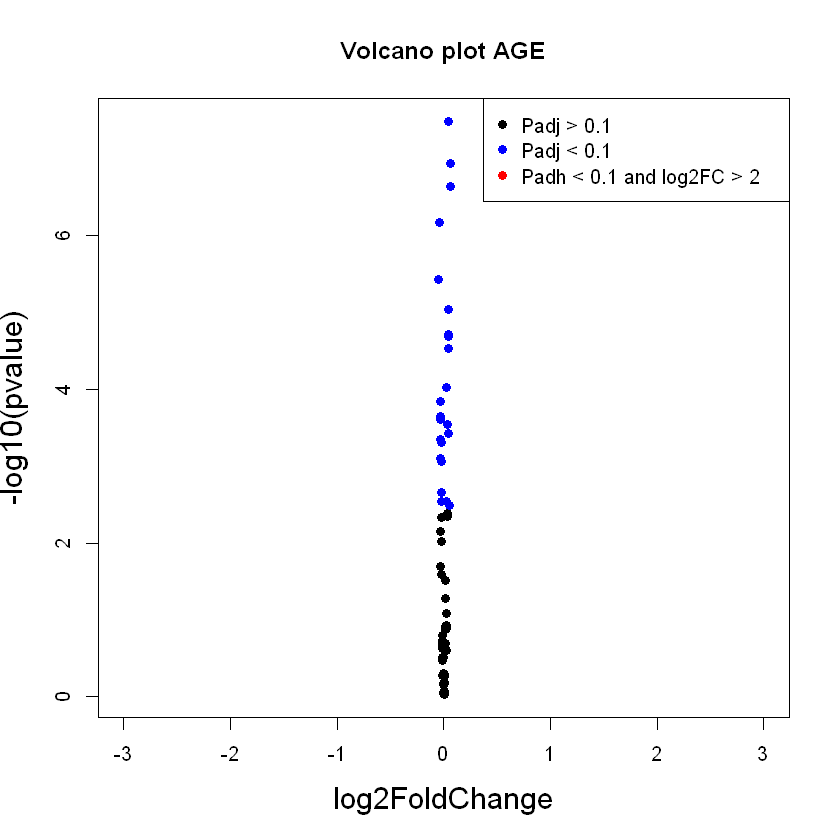

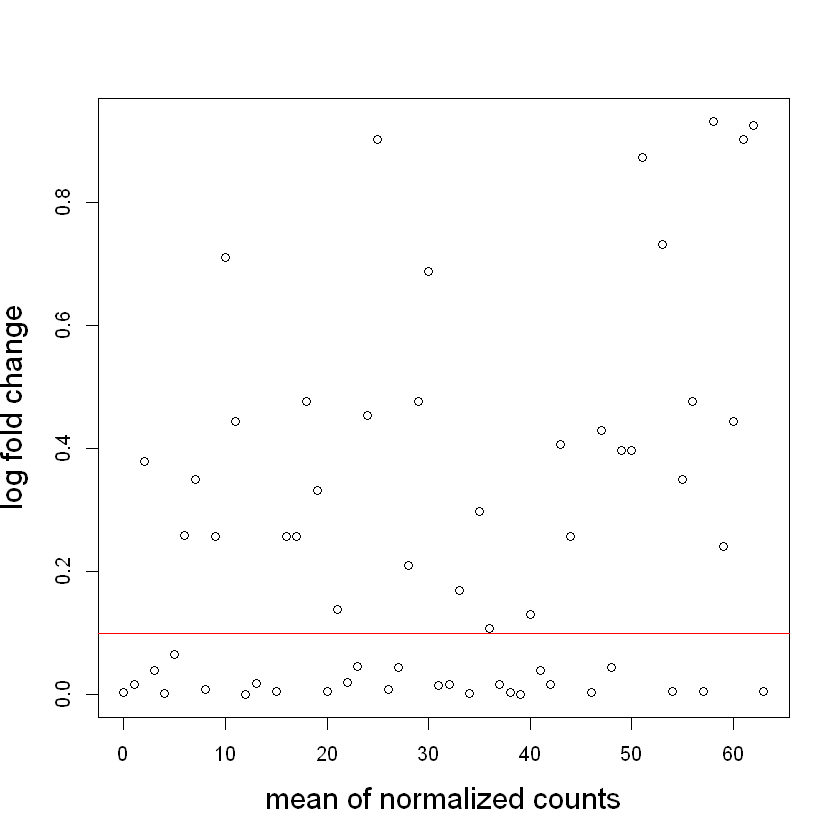

log2 fold change (MLE): HGHT 
Wald test p-value: HGHT 
DataFrame with 27 rows and 6 columns
     baseMean log2FoldChange     lfcSE      stat      pvalue        padj
    <numeric>      <numeric> <numeric> <numeric>   <numeric>   <numeric>
39    149.278       0.328318 0.0712164   4.61015 4.02375e-06 0.000245449
12    188.915       0.406247 0.0928341   4.37606 1.20845e-05 0.000368577
4     143.581       0.240275 0.0631372   3.80560 1.41460e-04 0.002239627
34    121.015      -0.120143 0.0316472  -3.79632 1.46861e-04 0.002239627
38    119.988       0.201035 0.0559135   3.59546 3.23814e-04 0.003950533
...       ...            ...       ...       ...         ...         ...
41    88.5211      0.0959193 0.0392241   2.44542   0.0144684   0.0387172
27   163.8442     -0.1356962 0.0572904  -2.36857   0.0178572   0.0444201
48   116.5553      0.1382275 0.0585357   2.36142   0.0182050   0.0444201
23   152.3163     -0.1312906 0.0561324  -2.33894   0.0193384   0.0453708
5    159.5815     -0.0940403 0.0

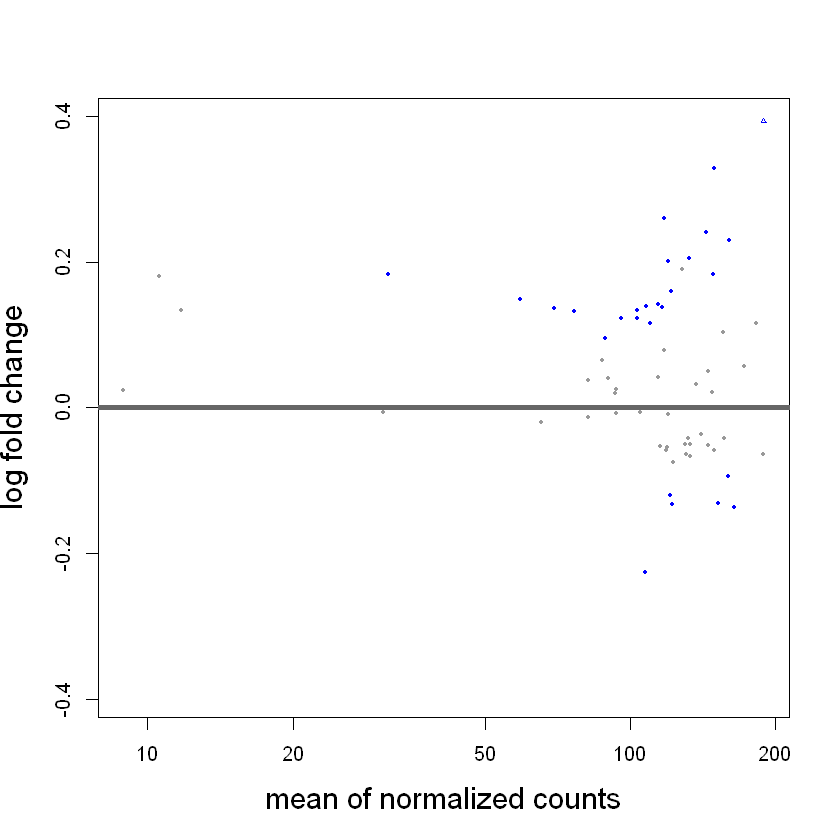

  the design formula contains one or more numeric variables that have mean or
  standard deviation larger than 5 (an arbitrary threshold to trigger this message).
  Including numeric variables with large mean can induce collinearity with the intercept.
  Users should center and scale numeric variables in the design to improve GLM convergence.

estimating size factors

estimating dispersions

gene-wise dispersion estimates

mean-dispersion relationship

-- note: fitType='parametric', but the dispersion trend was not well captured by the
   function: y = a/x + b, and a local regression fit was automatically substituted.
   specify fitType='local' or 'mean' to avoid this message next time.

final dispersion estimates

fitting model and testing




out of 64 with nonzero total read count
adjusted p-value < 0.1
LFC > 0 (up)       : 22, 34%
LFC < 0 (down)     : 6, 9.4%
outliers [1]       : 3, 4.7%
low counts [2]     : 0, 0%
(mean count < 12)
[1] see 'cooksCutoff' argument of ?results
[2] see 'independentFiltering' argument of ?results



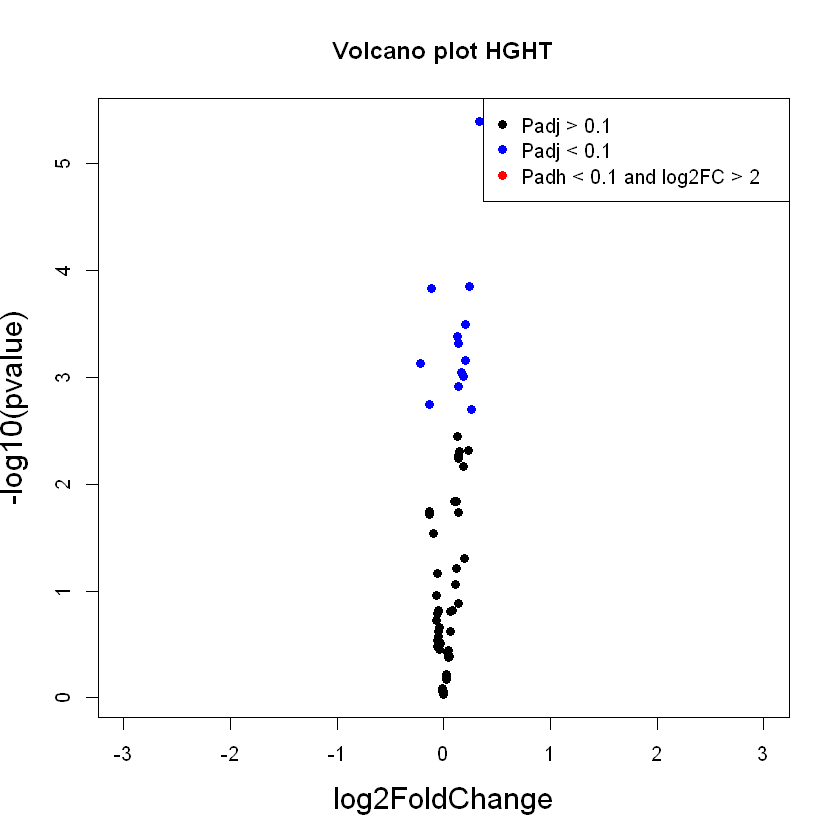

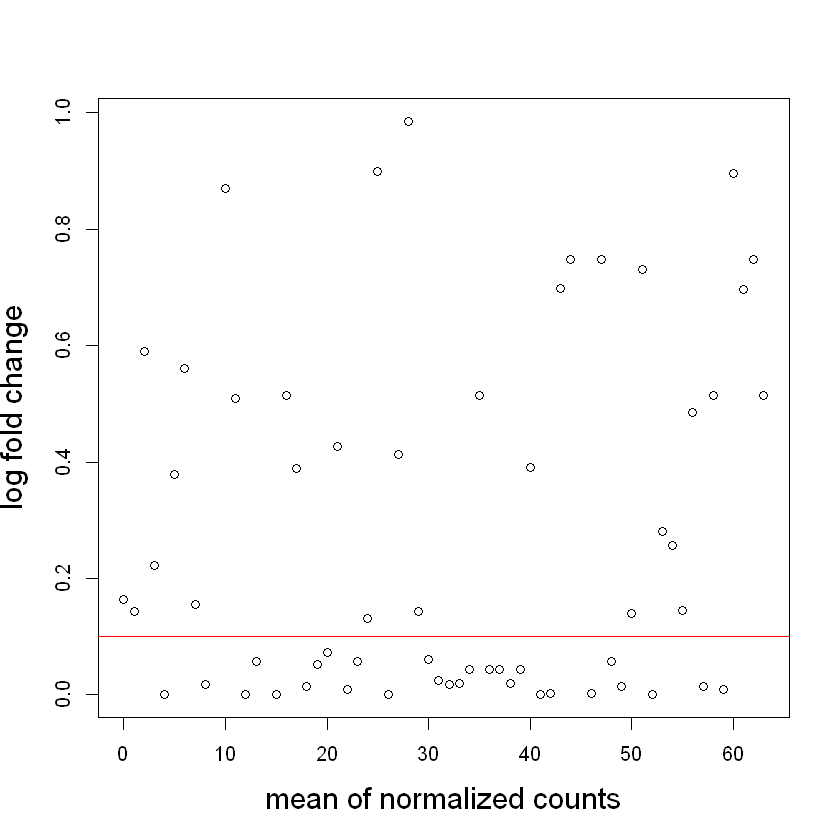

log2 fold change (MLE): WGHT 
Wald test p-value: WGHT 
DataFrame with 28 rows and 6 columns
     baseMean log2FoldChange      lfcSE      stat      pvalue        padj
    <numeric>      <numeric>  <numeric> <numeric>   <numeric>   <numeric>
26   117.5627      0.0328315 0.00689416   4.76222 1.91479e-06 0.000116802
15    69.6019      0.0151750 0.00345643   4.39038 1.13155e-05 0.000345121
4    143.5815      0.0222495 0.00523995   4.24613 2.17498e-05 0.000375165
12   188.9150      0.0329500 0.00786421   4.18987 2.79118e-05 0.000375165
52   110.6787     -0.0232640 0.00558179  -4.16783 3.07512e-05 0.000375165
...       ...            ...        ...       ...         ...         ...
13    76.3889     0.00918936 0.00403013   2.28016   0.0225980   0.0574365
23   152.3163    -0.01060767 0.00469755  -2.25813   0.0239377   0.0574740
48   116.5553     0.01102434 0.00490136   2.24924   0.0244971   0.0574740
30   147.6561     0.00739387 0.00334548   2.21011   0.0270978   0.0612209
20   121.3658     0.

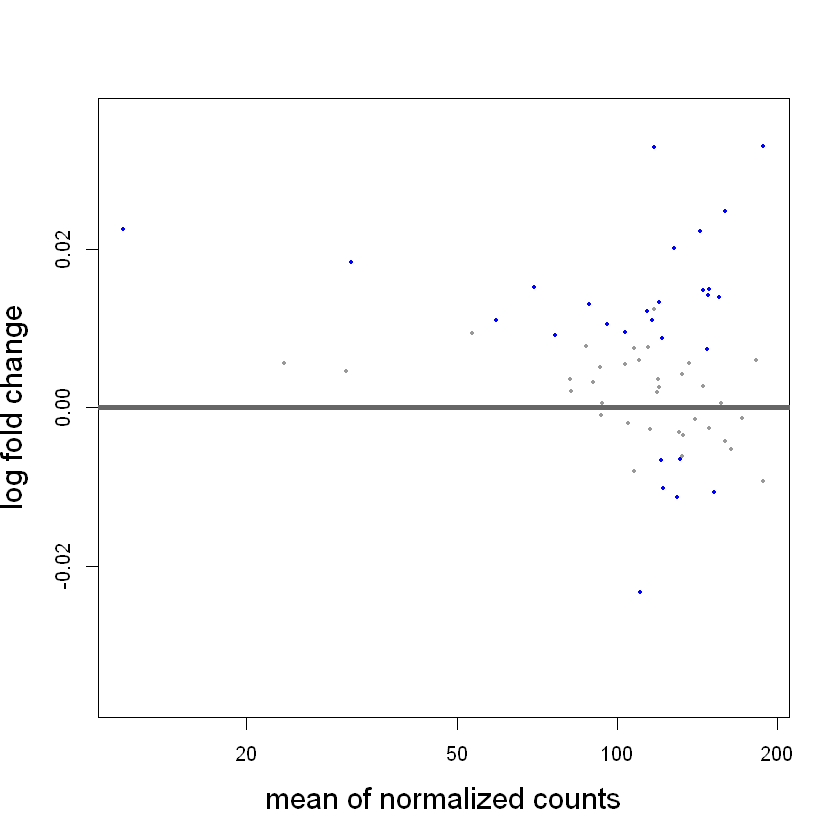

  the design formula contains one or more numeric variables that have mean or
  standard deviation larger than 5 (an arbitrary threshold to trigger this message).
  Including numeric variables with large mean can induce collinearity with the intercept.
  Users should center and scale numeric variables in the design to improve GLM convergence.

estimating size factors

estimating dispersions

gene-wise dispersion estimates

mean-dispersion relationship

-- note: fitType='parametric', but the dispersion trend was not well captured by the
   function: y = a/x + b, and a local regression fit was automatically substituted.
   specify fitType='local' or 'mean' to avoid this message next time.

final dispersion estimates

fitting model and testing




out of 64 with nonzero total read count
adjusted p-value < 0.1
LFC > 0 (up)       : 9, 14%
LFC < 0 (down)     : 2, 3.1%
outliers [1]       : 3, 4.7%
low counts [2]     : 0, 0%
(mean count < 12)
[1] see 'cooksCutoff' argument of ?results
[2] see 'independentFiltering' argument of ?results



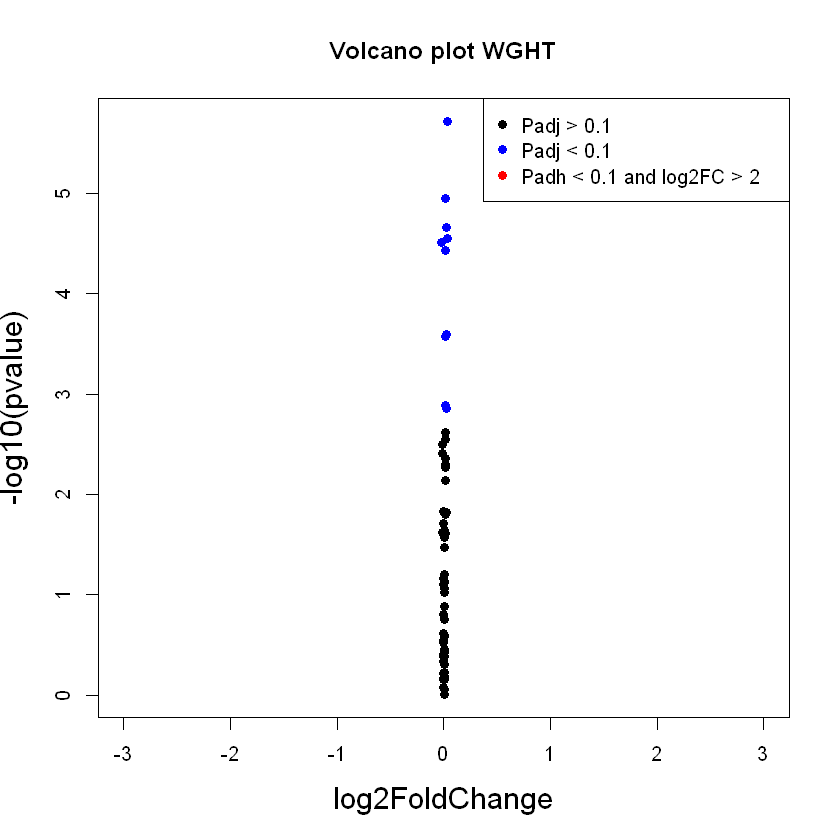

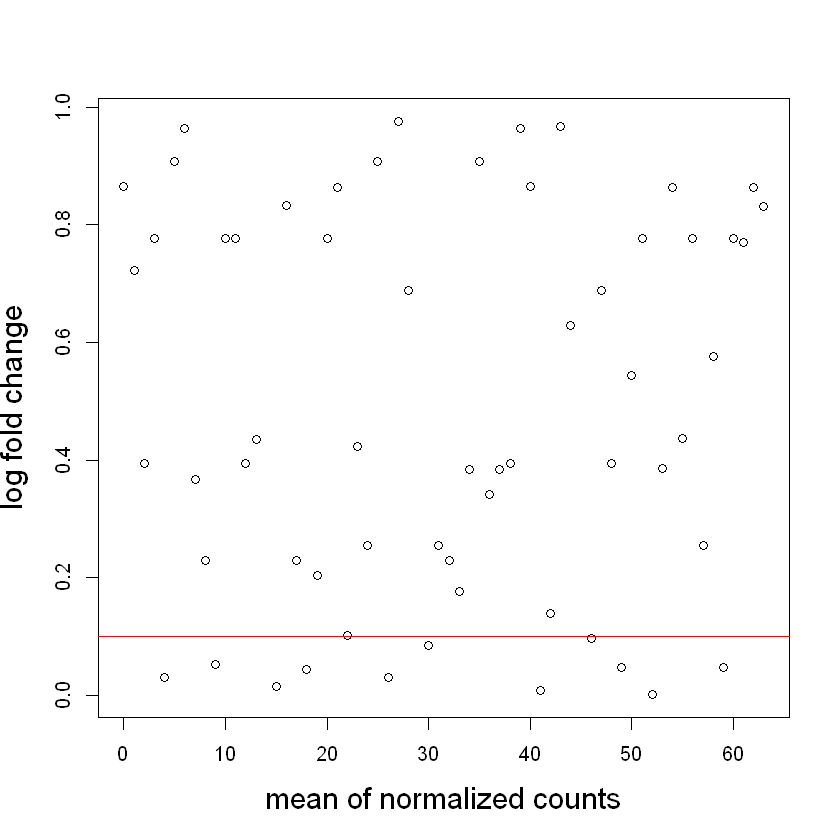

log2 fold change (MLE): BMI 
Wald test p-value: BMI 
DataFrame with 11 rows and 6 columns
    baseMean log2FoldChange     lfcSE      stat      pvalue        padj
   <numeric>      <numeric> <numeric> <numeric>   <numeric>   <numeric>
52  110.6787     -0.1673596 0.0385012  -4.34687 1.38094e-05 0.000842374
41   88.5211      0.0810352 0.0220930   3.66791 2.44544e-04 0.007458596
15   69.6019      0.0829513 0.0244761   3.38908 7.01274e-04 0.014259233
4   143.5815      0.1126313 0.0368903   3.05314 2.26459e-03 0.030170785
26  117.5627      0.1467005 0.0484700   3.02662 2.47302e-03 0.030170785
18  145.3042      0.0970766 0.0340512   2.85090 4.35951e-03 0.044321691
49  129.8455     -0.0723951 0.0264861  -2.73333 6.26977e-03 0.047806991
59   11.7334      0.1347199 0.0489635   2.75143 5.93350e-03 0.047806991
9   117.5544      0.0827994 0.0310794   2.66412 7.71898e-03 0.052317535
30  147.6561      0.0567178 0.0230453   2.46115 1.38494e-02 0.084481396
46   95.8441      0.0483531 0.0203478   2.3763

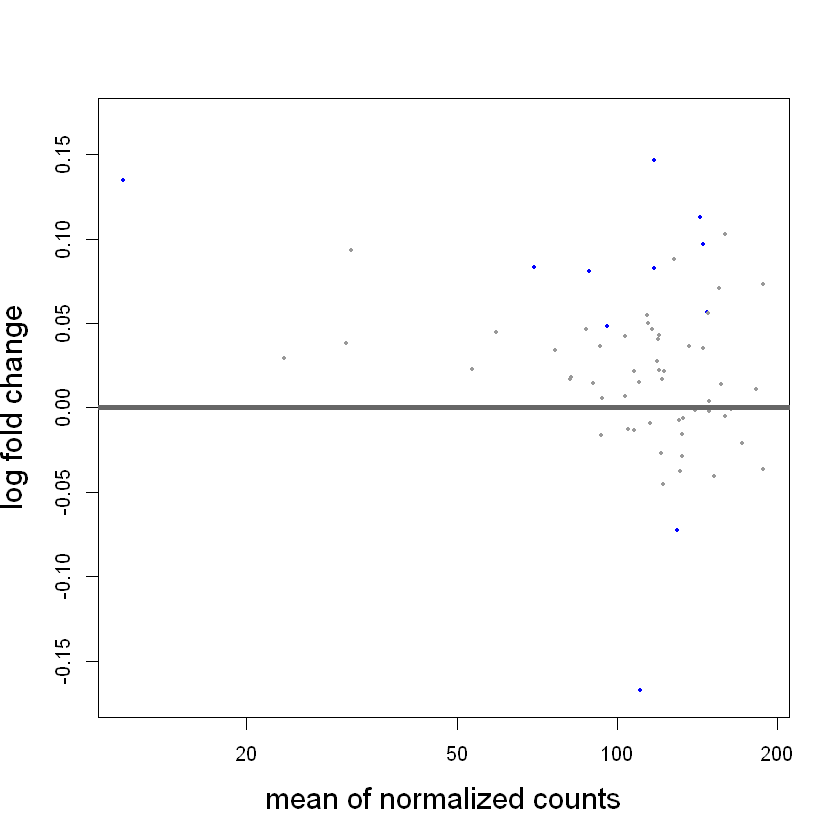

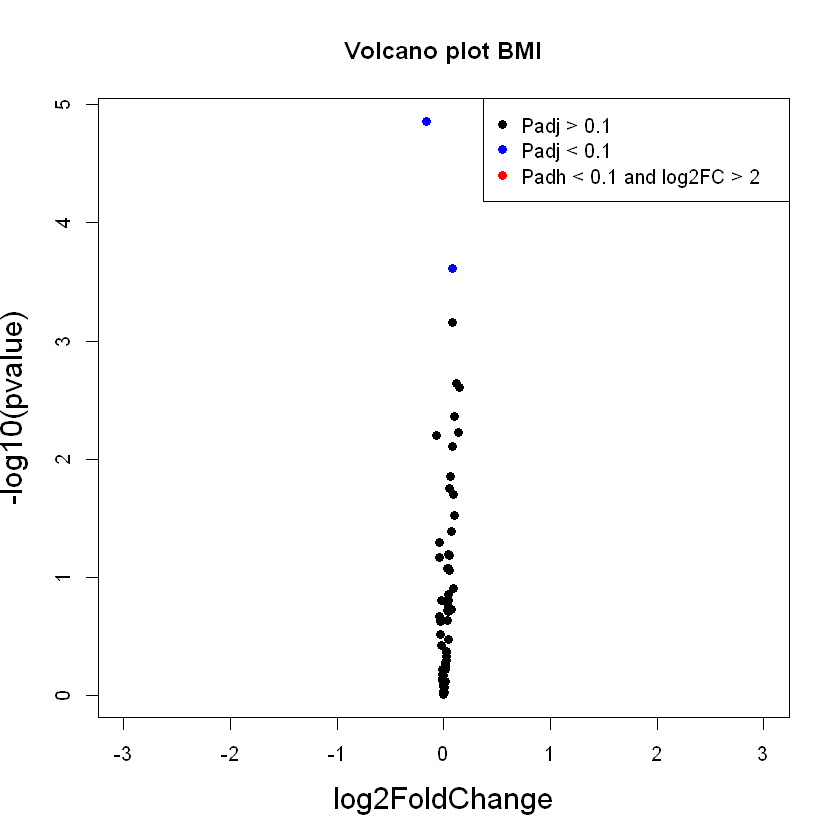

In [94]:
#Q2.1: clinical variables
morph_analysis("AGE", ~ AGE, FALSE)
morph_analysis("HGHT", ~ HGHT, FALSE)
morph_analysis("WGHT", ~ WGHT, FALSE)
morph_analysis("BMI", ~BMI, FALSE)

Warning message in DESeqDataSet(se, design = design, ignoreRank):
"some variables in design formula are characters, converting to factors"
  Note: levels of factors in the design contain characters other than
  letters, numbers, '_' and '.'. It is recommended (but not required) to use
  only letters, numbers, and delimiters '_' or '.', as these are safe characters
  for column names in R. [This is a message, not a warning or an error]

estimating size factors

  Note: levels of factors in the design contain characters other than
  letters, numbers, '_' and '.'. It is recommended (but not required) to use
  only letters, numbers, and delimiters '_' or '.', as these are safe characters
  for column names in R. [This is a message, not a warning or an error]

estimating dispersions

gene-wise dispersion estimates

mean-dispersion relationship

  Note: levels of factors in the design contain characters other than
  letters, numbers, '_' and '.'. It is recommended (but not required) to use
 


out of 64 with nonzero total read count
adjusted p-value < 0.1
LFC > 0 (up)       : 25, 39%
LFC < 0 (down)     : 25, 39%
outliers [1]       : 0, 0%
low counts [2]     : 0, 0%
(mean count < 5)
[1] see 'cooksCutoff' argument of ?results
[2] see 'independentFiltering' argument of ?results



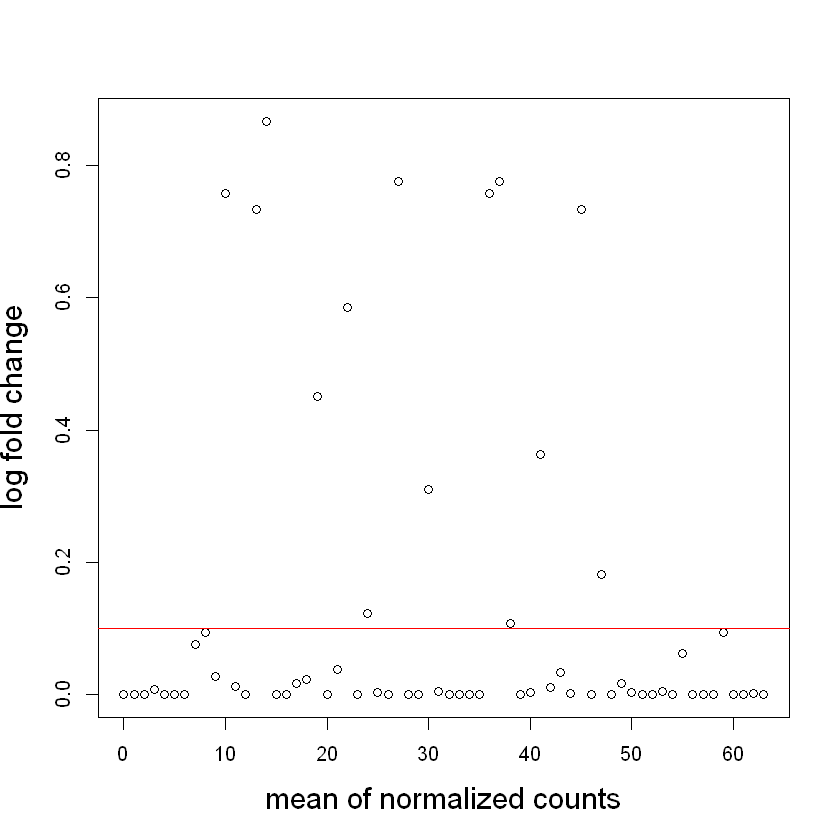

log2 fold change (MLE): COHORT Postmortem vs Organ.Donor..OPO. 
Wald test p-value: COHORT Postmortem vs Organ.Donor..OPO. 
DataFrame with 50 rows and 6 columns
     baseMean log2FoldChange     lfcSE      stat      pvalue        padj
    <numeric>      <numeric> <numeric> <numeric>   <numeric>   <numeric>
57    148.241        2.34432  0.217897  10.75884 5.38421e-27 3.44589e-25
33    155.450        2.41645  0.236885  10.20096 1.96322e-24 6.28231e-23
48    116.555        2.28969  0.233212   9.81806 9.41351e-23 2.00822e-21
12    188.915        3.79242  0.400244   9.47527 2.66064e-21 4.25703e-20
35    133.194       -1.90066  0.201448  -9.43501 3.90950e-21 5.00417e-20
...       ...            ...       ...       ...         ...         ...
21   130.7797      -0.371828  0.168324  -2.20901   0.0271740   0.0378073
55   132.8157       0.402014  0.201139   1.99869   0.0456419   0.0621507
7     87.3322      -0.495374  0.260611  -1.90082   0.0573260   0.0764347
8    121.9710      -0.367821  0.20535

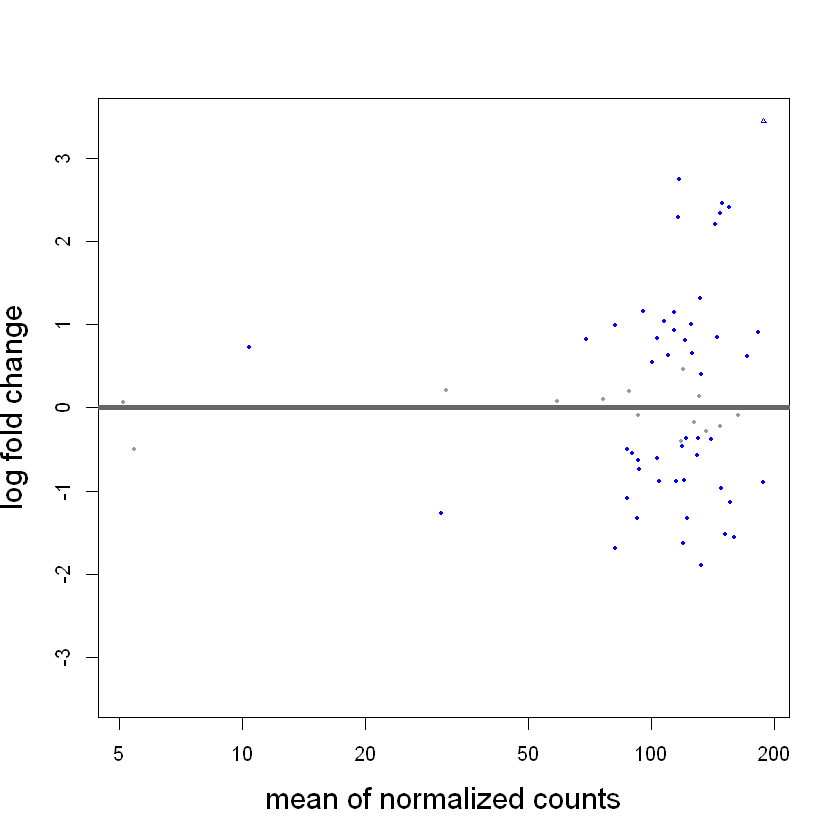

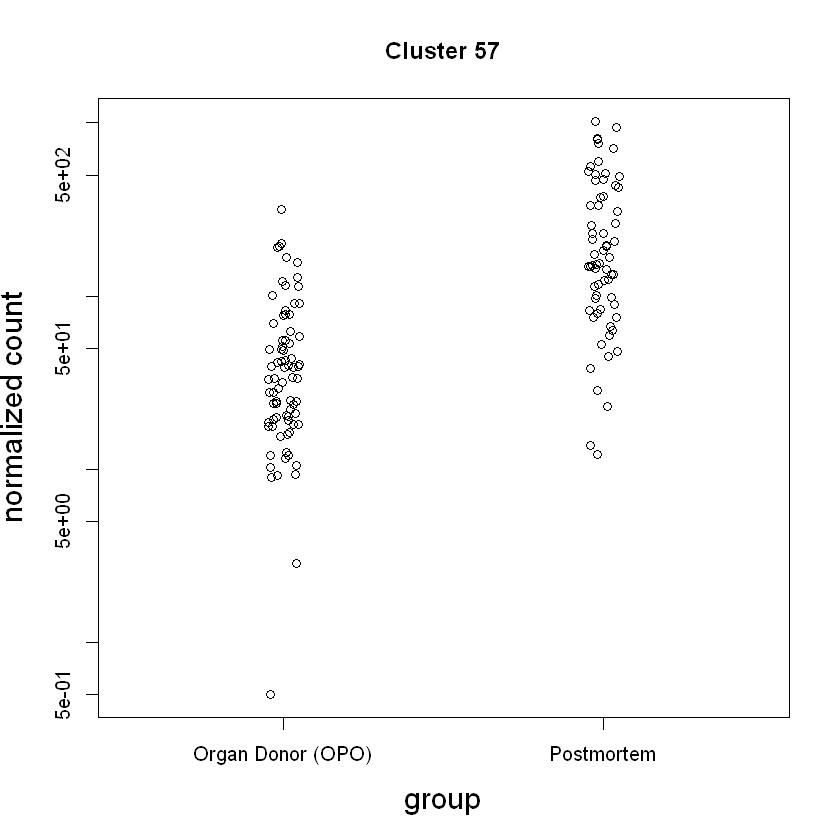

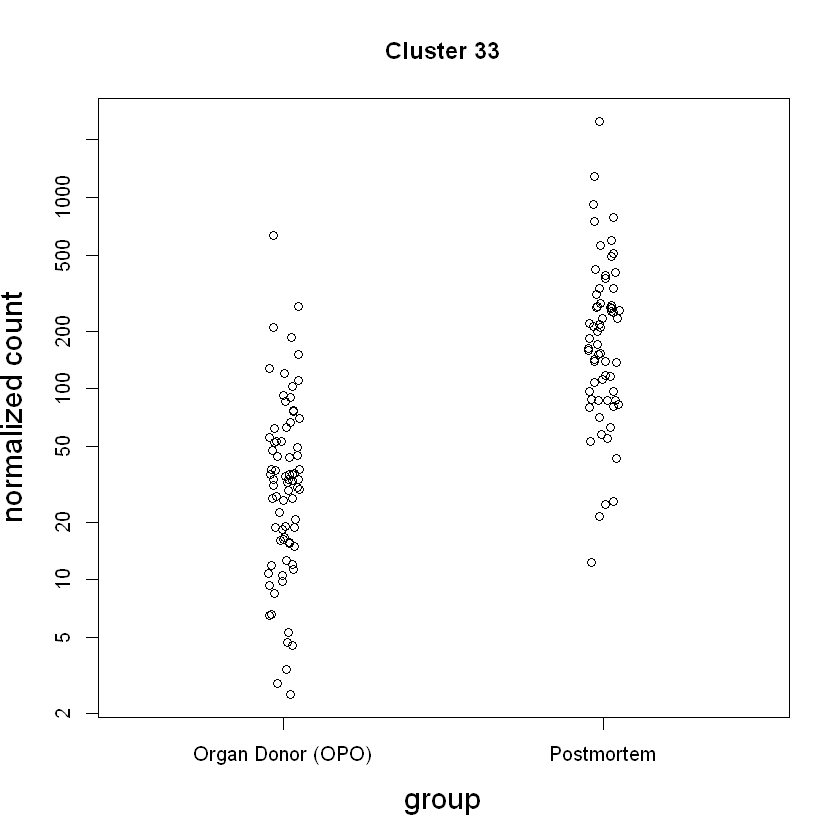

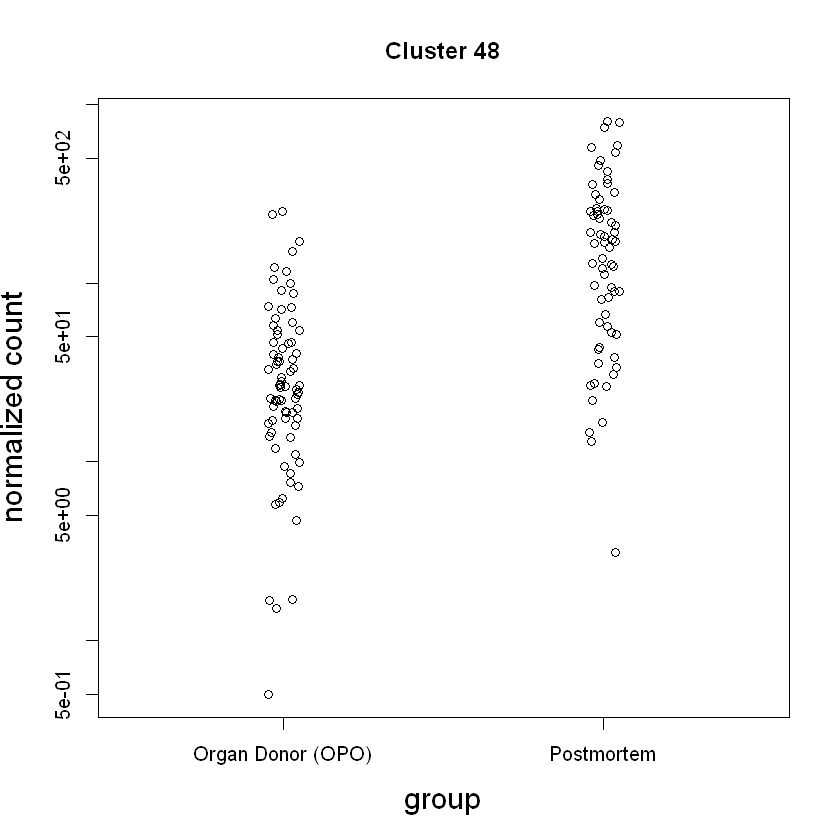

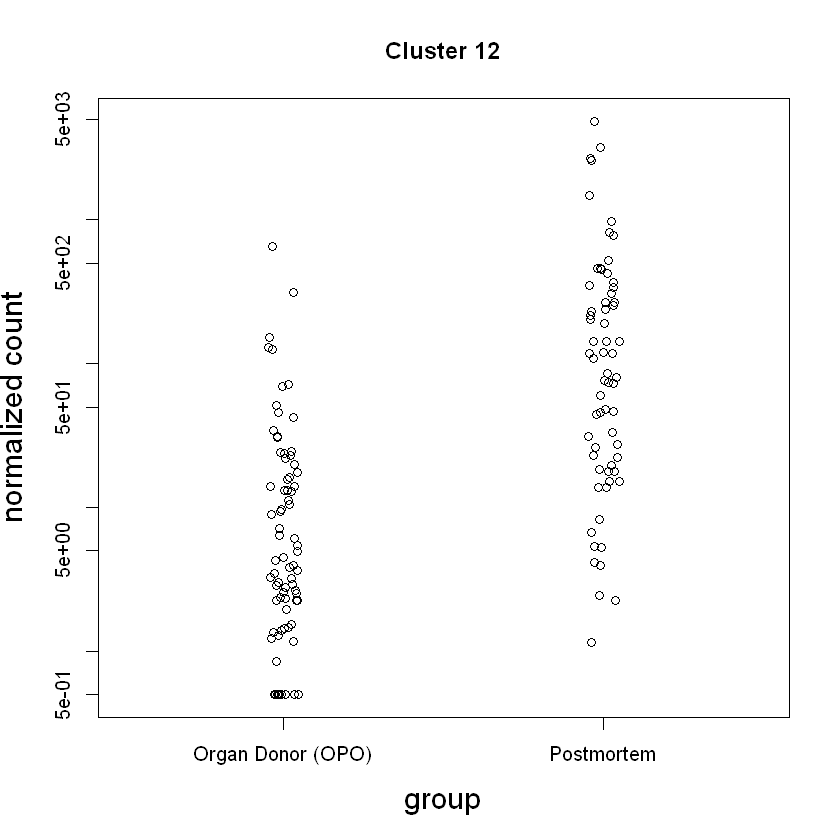

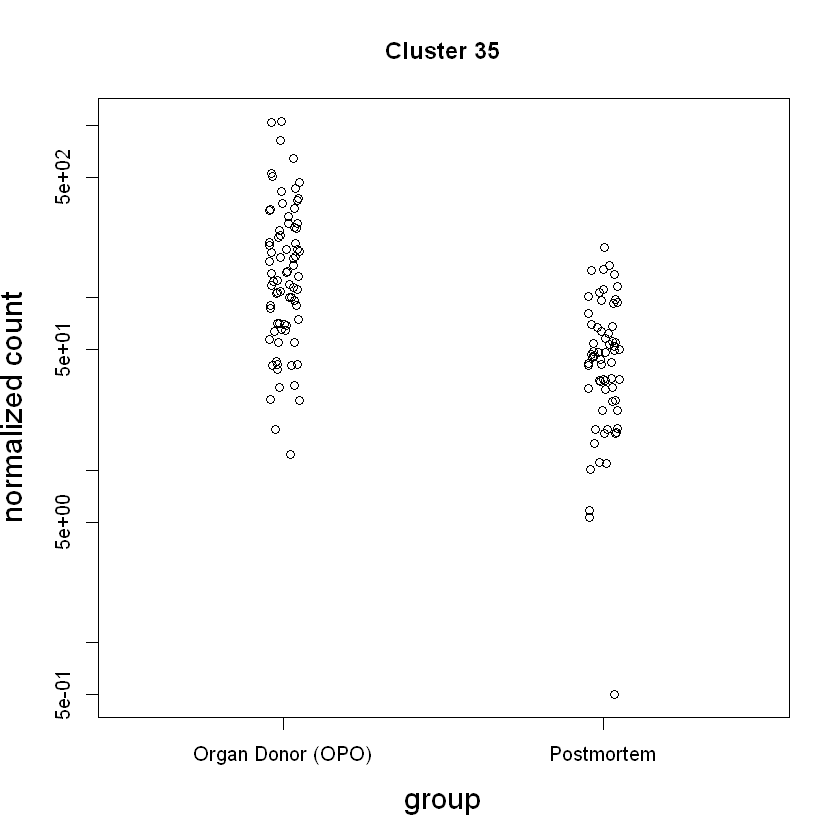

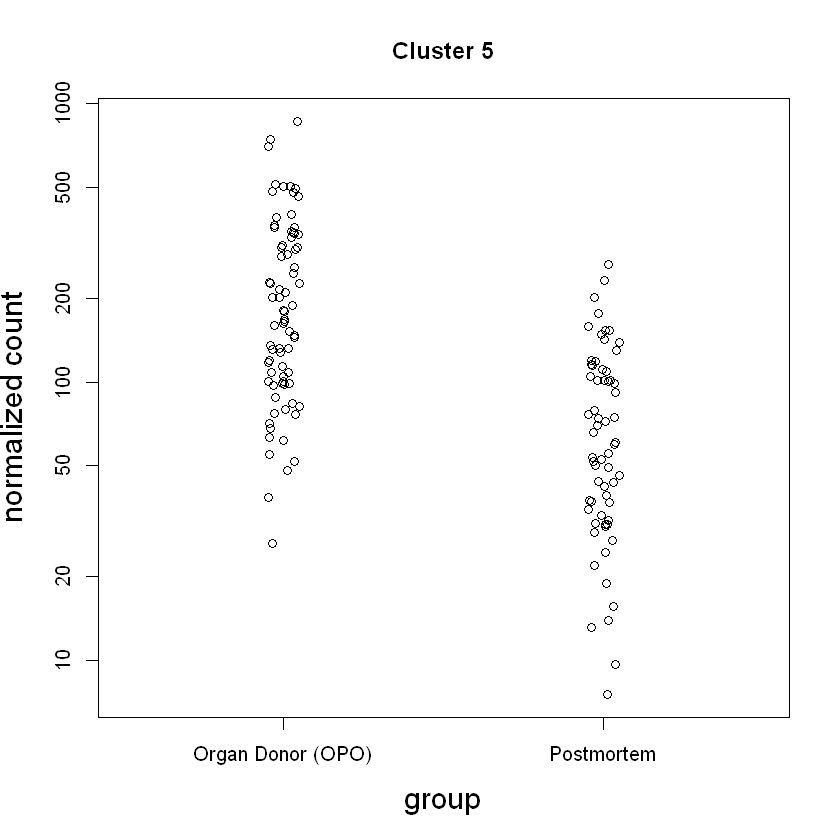

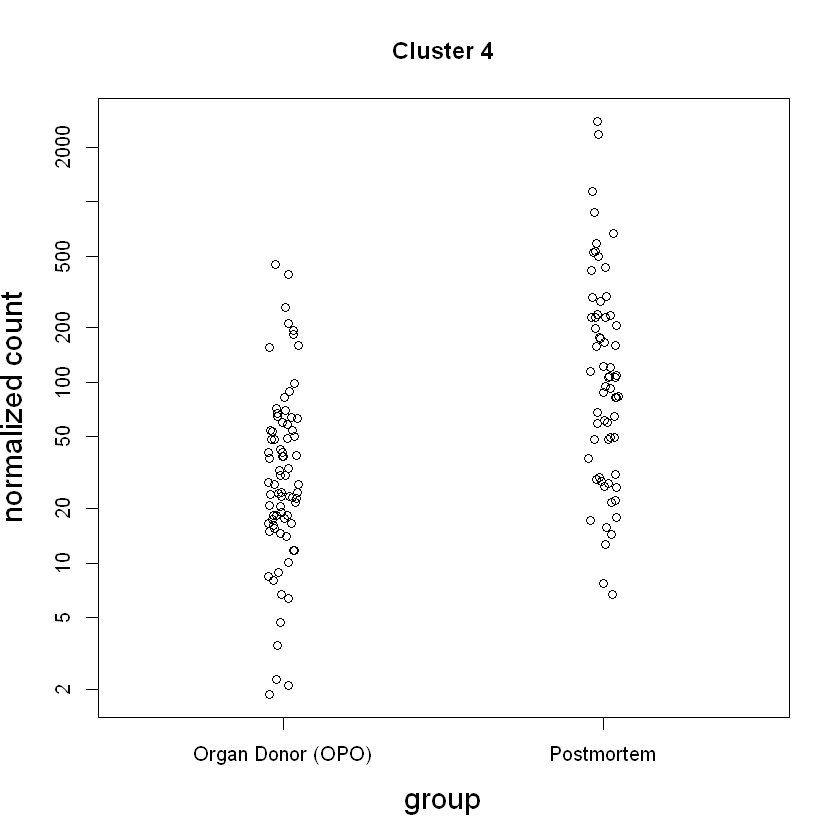

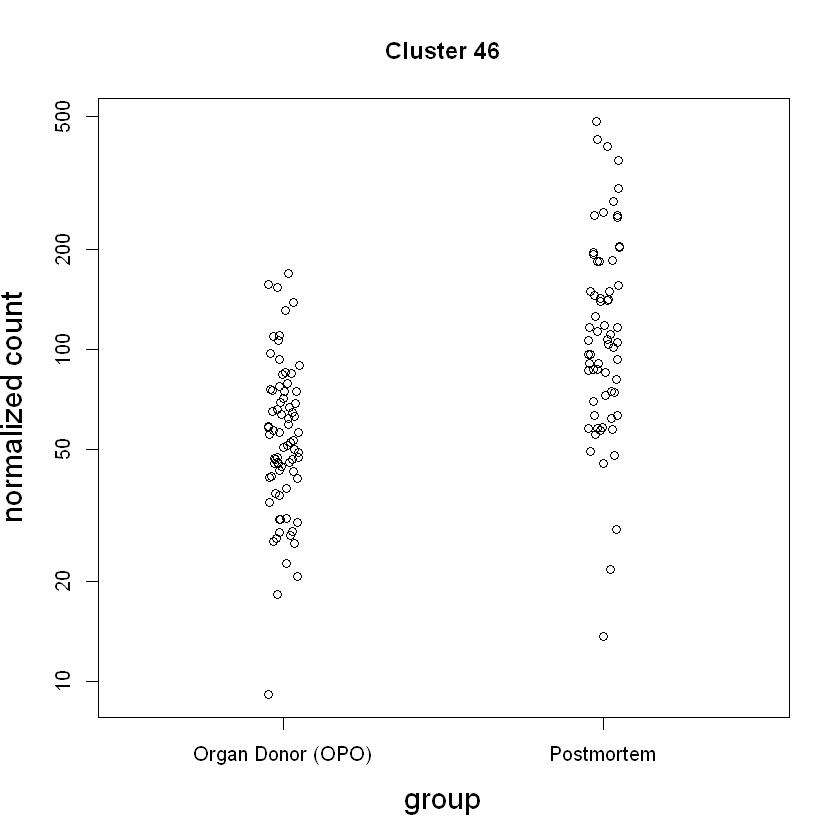

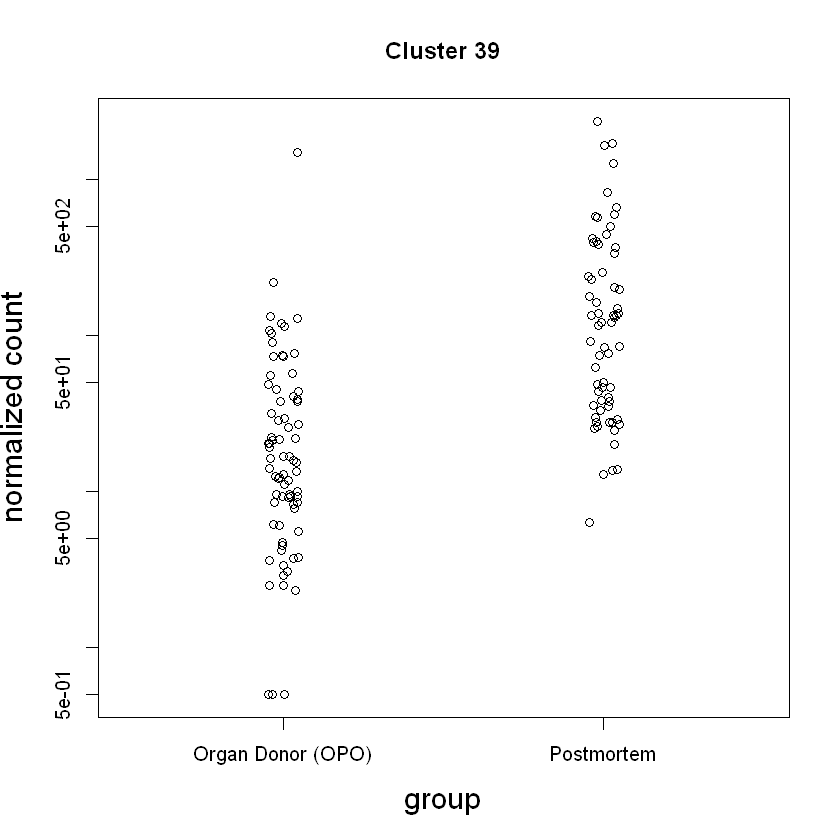

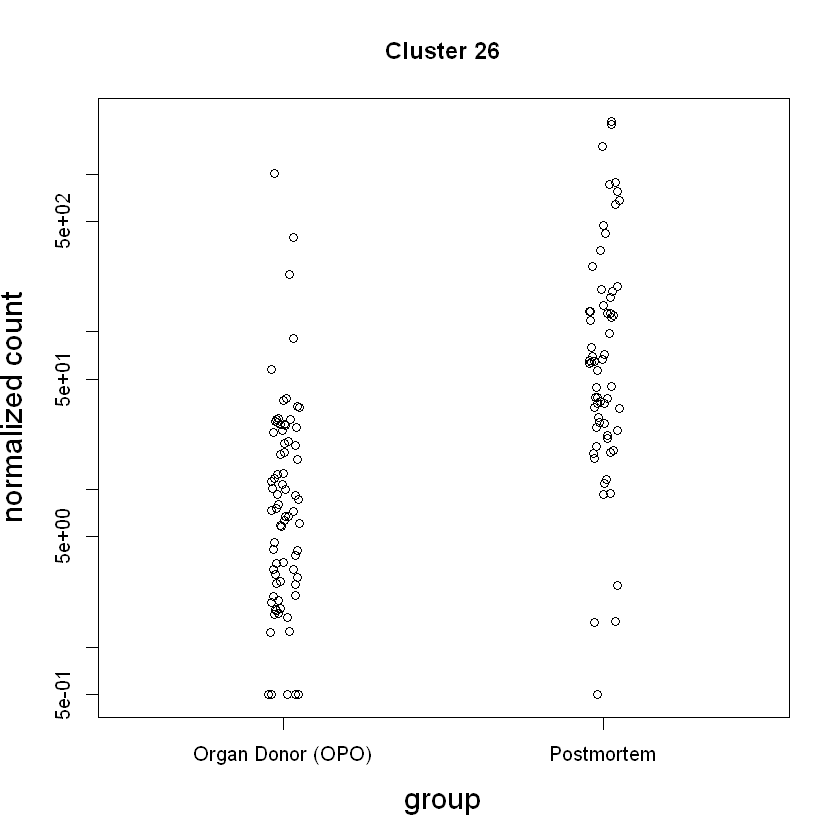

Warning message in DESeqDataSet(se, design = design, ignoreRank):
"some variables in design formula are characters, converting to factors"
estimating size factors

estimating dispersions

gene-wise dispersion estimates

mean-dispersion relationship

final dispersion estimates

fitting model and testing

-- replacing outliers and refitting for 2 genes
-- DESeq argument 'minReplicatesForReplace' = 7 
-- original counts are preserved in counts(dds)

estimating dispersions

fitting model and testing




out of 64 with nonzero total read count
adjusted p-value < 0.1
LFC > 0 (up)       : 15, 23%
LFC < 0 (down)     : 20, 31%
outliers [1]       : 1, 1.6%
low counts [2]     : 0, 0%
(mean count < 5)
[1] see 'cooksCutoff' argument of ?results
[2] see 'independentFiltering' argument of ?results



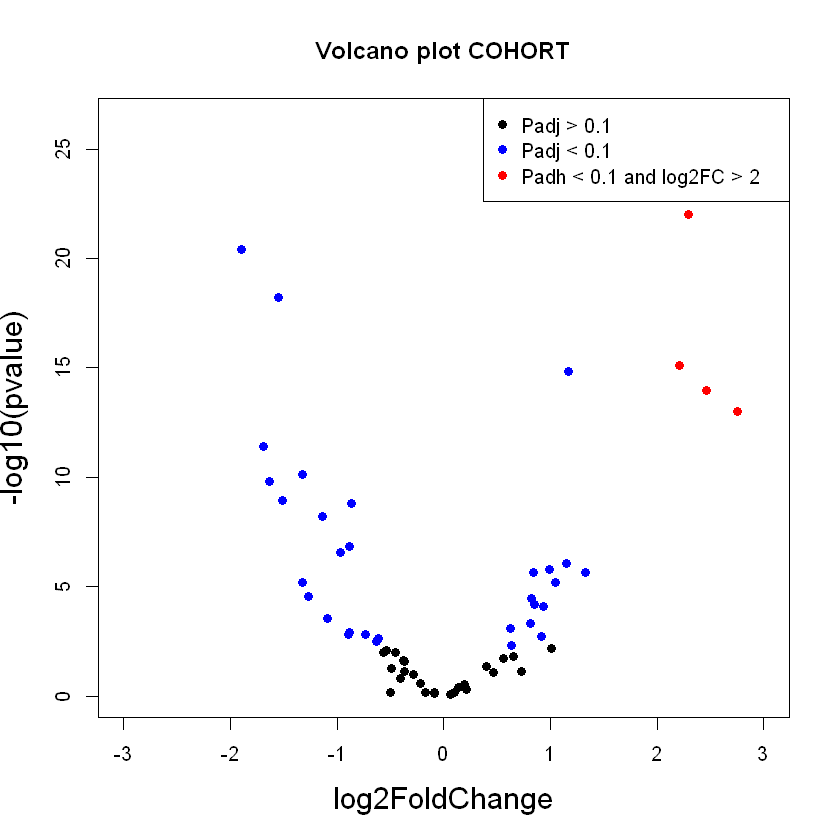

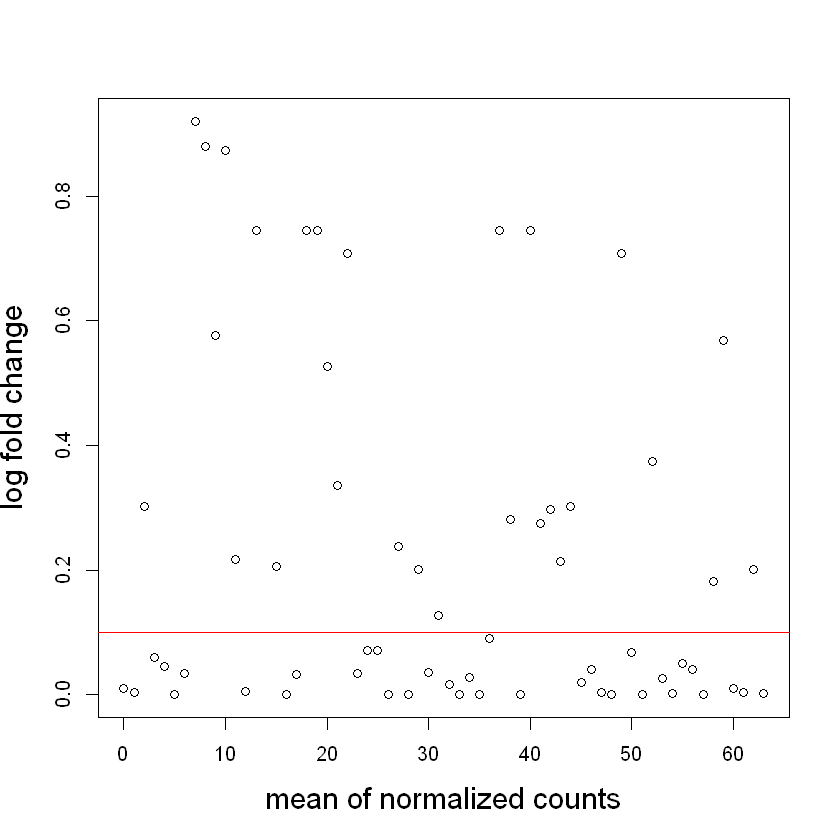

log2 fold change (MLE): DTHHRDY 4 vs 0 
Wald test p-value: DTHHRDY 4 vs 0 
DataFrame with 35 rows and 6 columns
     baseMean log2FoldChange     lfcSE      stat      pvalue        padj
    <numeric>      <numeric> <numeric> <numeric>   <numeric>   <numeric>
28    122.696       -1.87755  0.302180  -6.21333 5.18728e-10 1.97544e-08
35    133.194       -1.93637  0.313153  -6.18346 6.27125e-10 1.97544e-08
33    155.450        1.97710  0.368779   5.36120 8.26727e-08 1.73613e-06
5     159.582       -1.41964  0.269473  -5.26820 1.37765e-07 2.16980e-06
57    148.241        1.69382  0.338032   5.01083 5.41955e-07 6.82863e-06
...       ...            ...       ...       ...         ...         ...
3    110.1487       0.744137  0.341941   2.17622   0.0295390   0.0600309
50   188.2888      -0.902298  0.426150  -2.11733   0.0342322   0.0673946
24   136.7598      -0.550904  0.264670  -2.08147   0.0373905   0.0710444
25    93.5703      -0.727940  0.351461  -2.07119   0.0383414   0.0710444
36   127.937

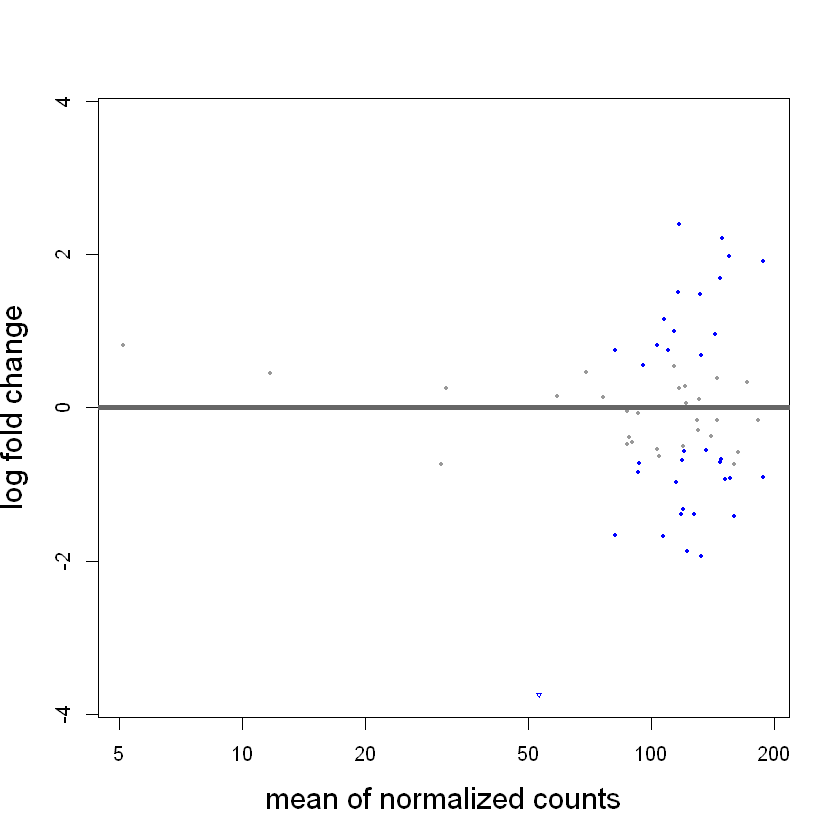

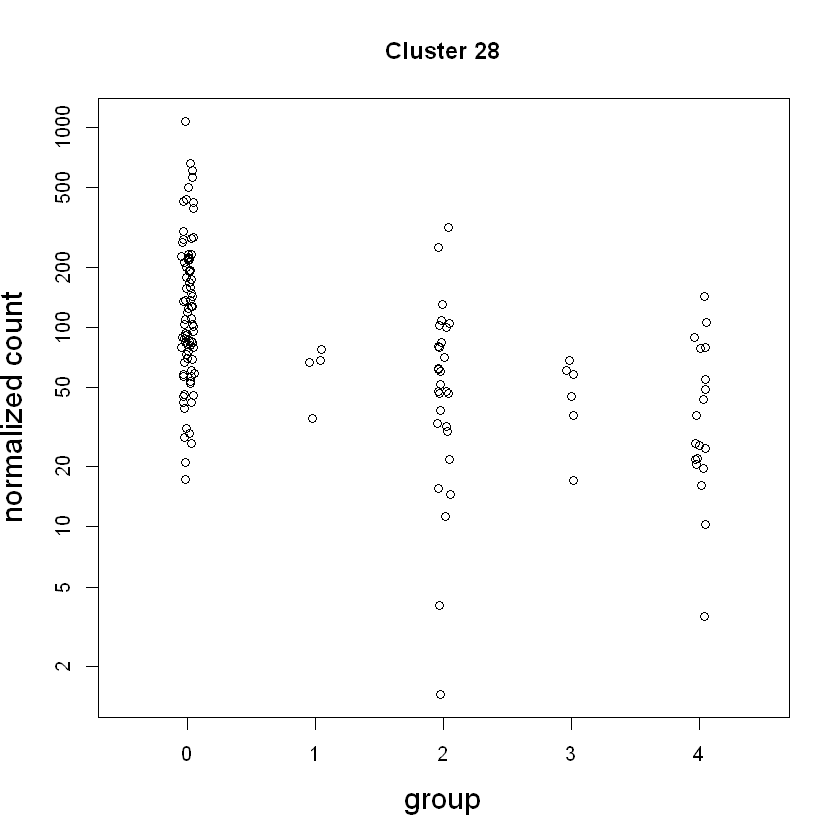

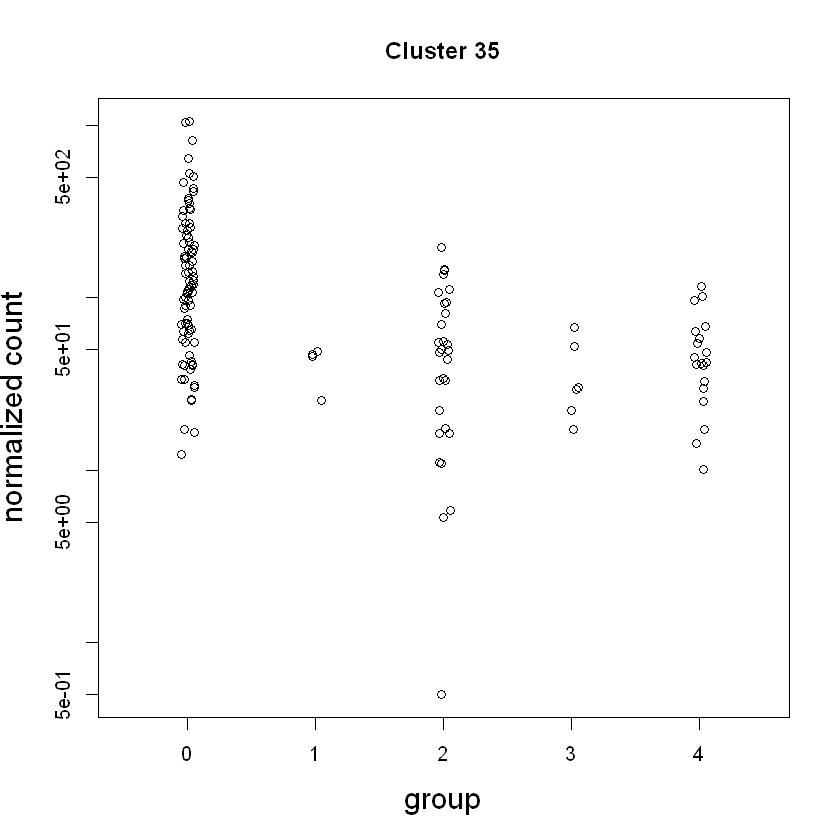

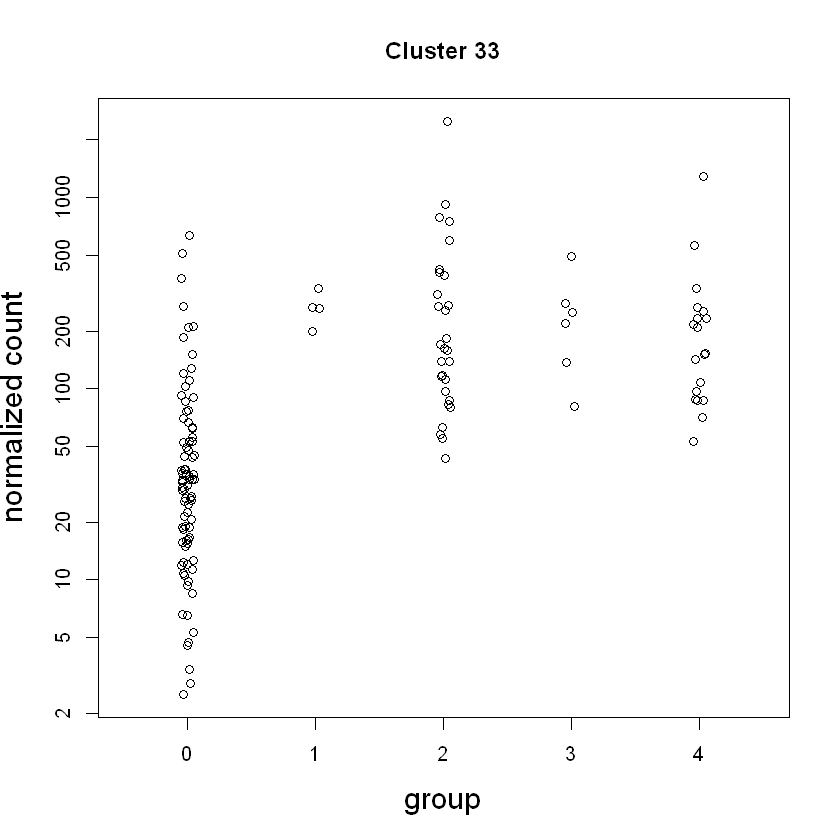

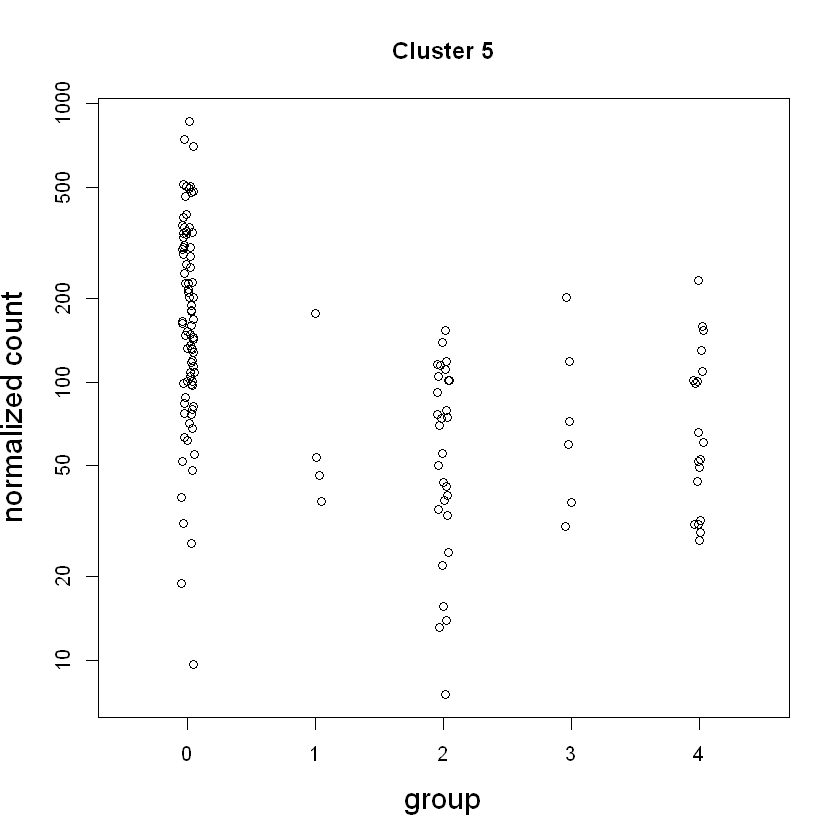

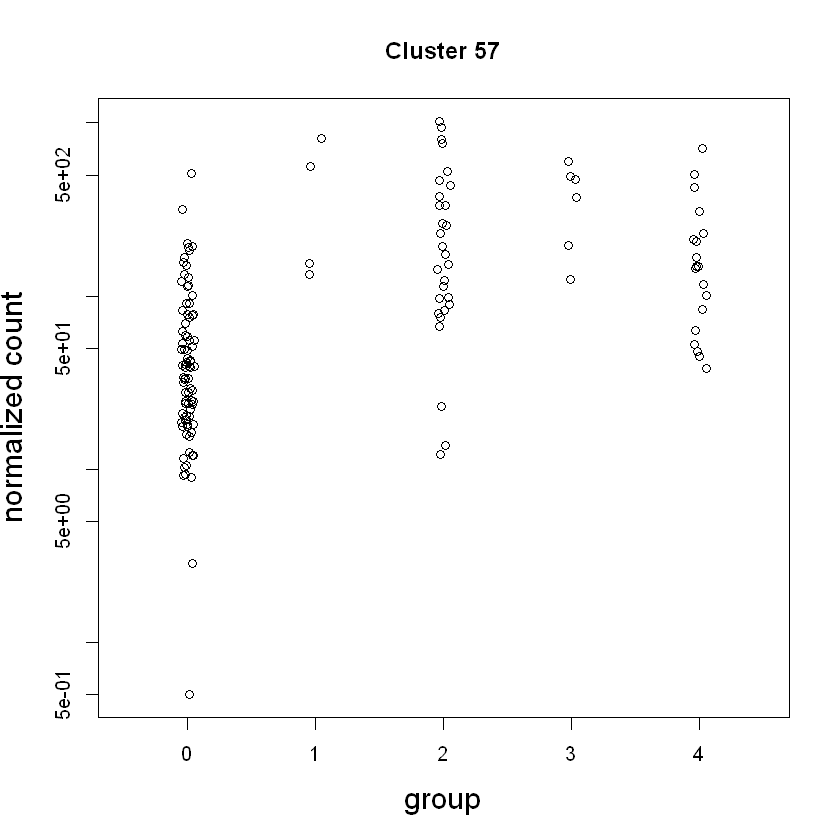

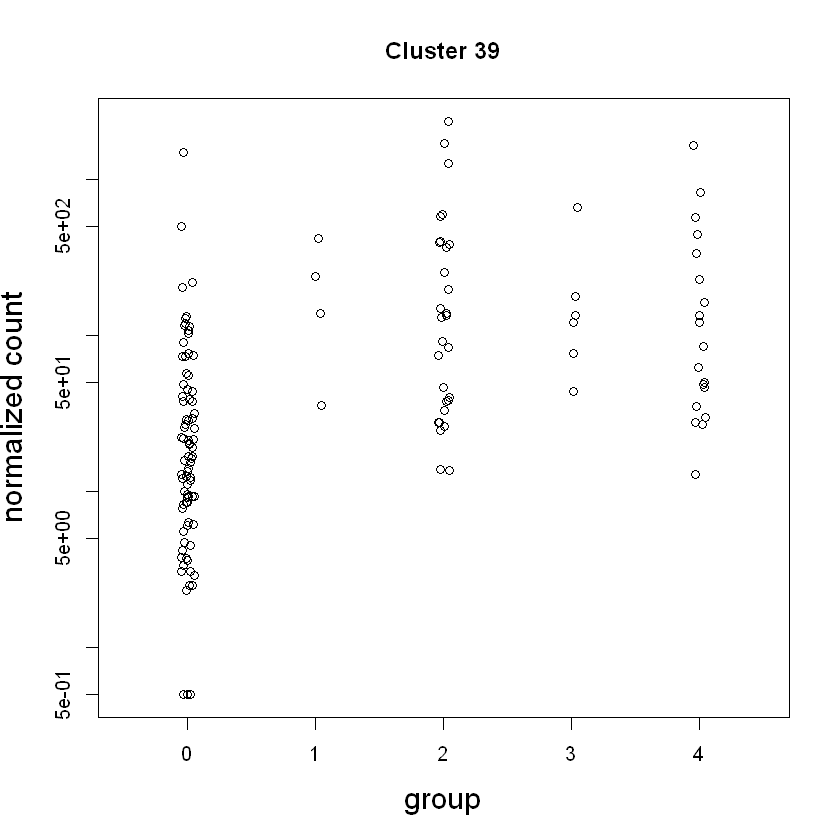

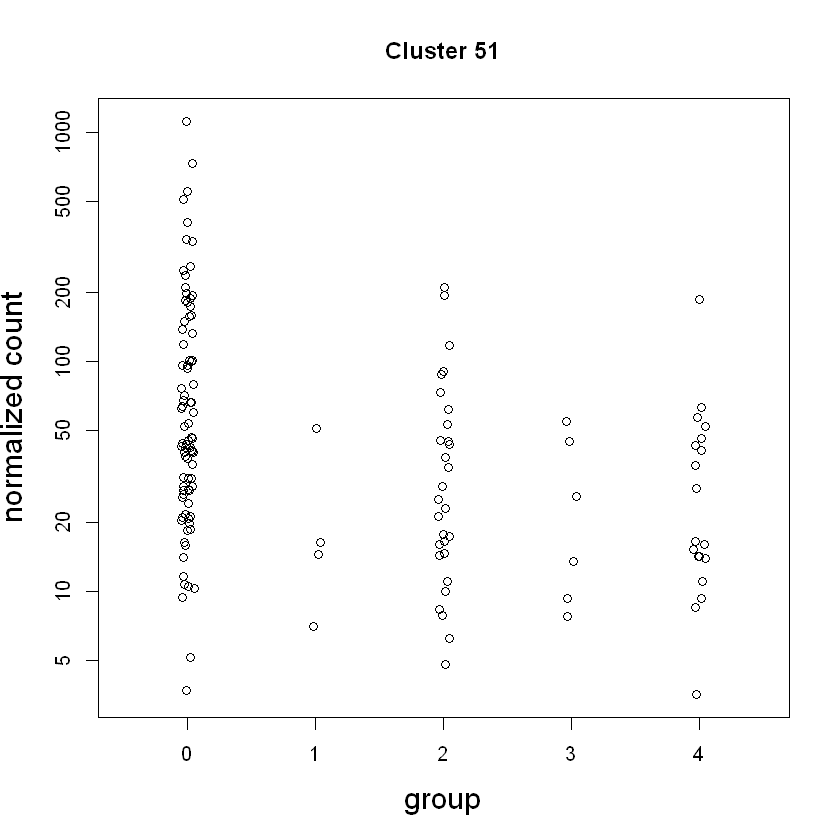

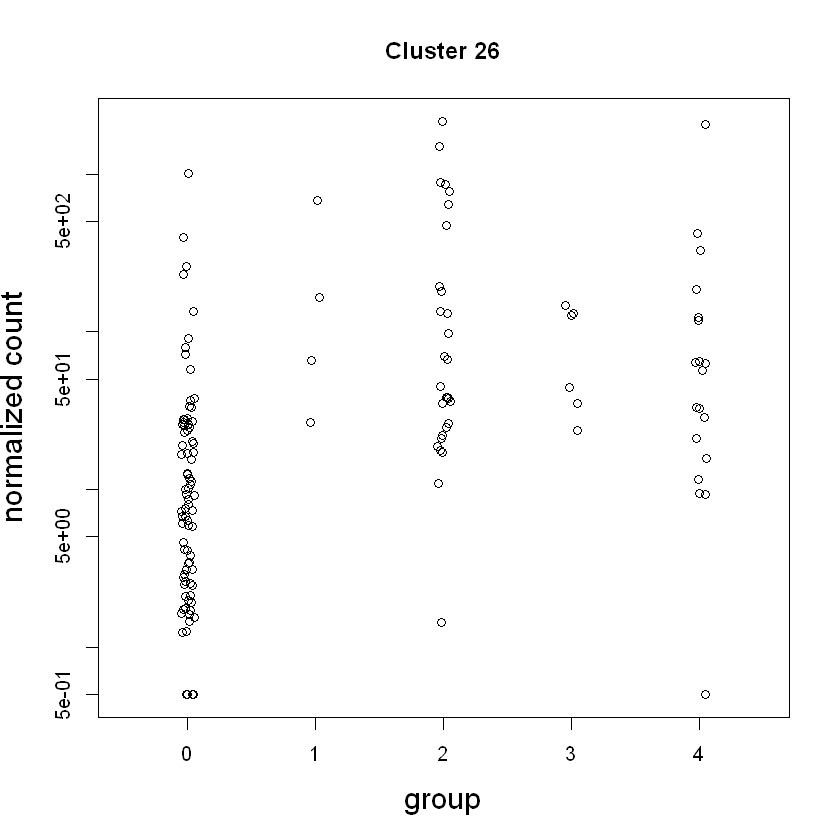

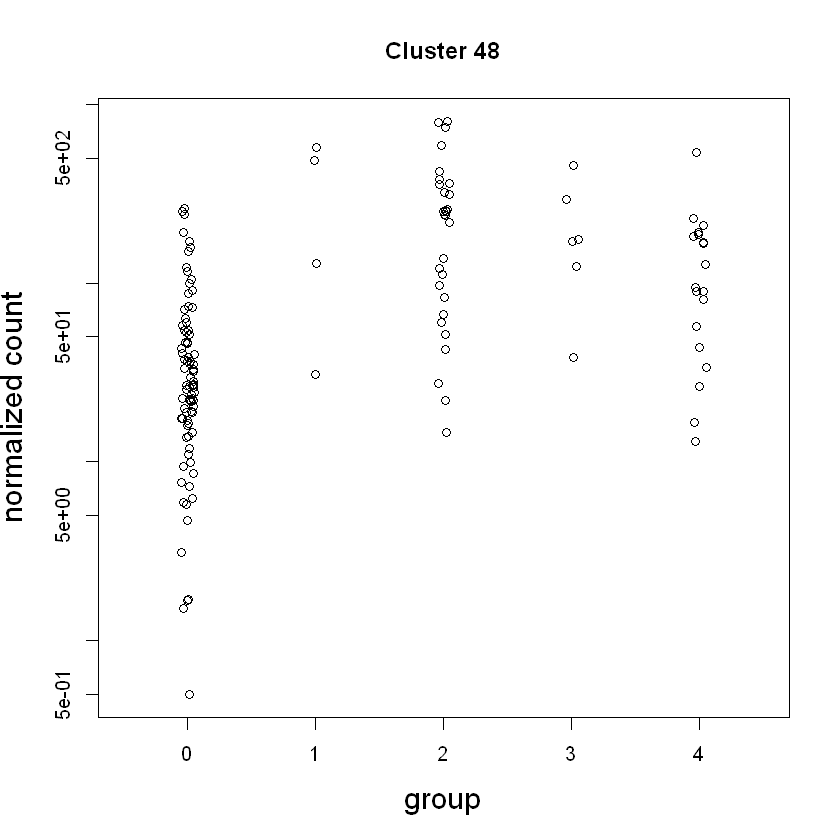

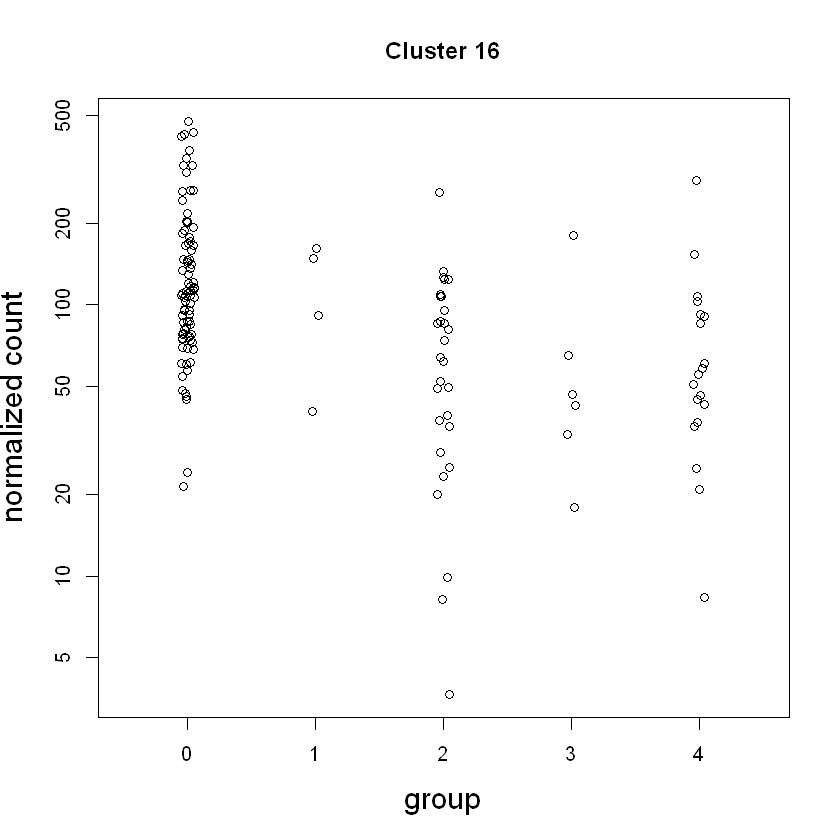

  the design formula contains one or more numeric variables with integer values,
  specifying a model with increasing fold change for higher values.
  did you mean for this to be a factor? if so, first convert
  this variable to a factor using the factor() function

  the design formula contains one or more numeric variables that have mean or
  standard deviation larger than 5 (an arbitrary threshold to trigger this message).
  Including numeric variables with large mean can induce collinearity with the intercept.
  Users should center and scale numeric variables in the design to improve GLM convergence.

estimating size factors

estimating dispersions

gene-wise dispersion estimates

mean-dispersion relationship

final dispersion estimates

fitting model and testing




out of 64 with nonzero total read count
adjusted p-value < 0.1
LFC > 0 (up)       : 22, 34%
LFC < 0 (down)     : 23, 36%
outliers [1]       : 1, 1.6%
low counts [2]     : 0, 0%
(mean count < 12)
[1] see 'cooksCutoff' argument of ?results
[2] see 'independentFiltering' argument of ?results



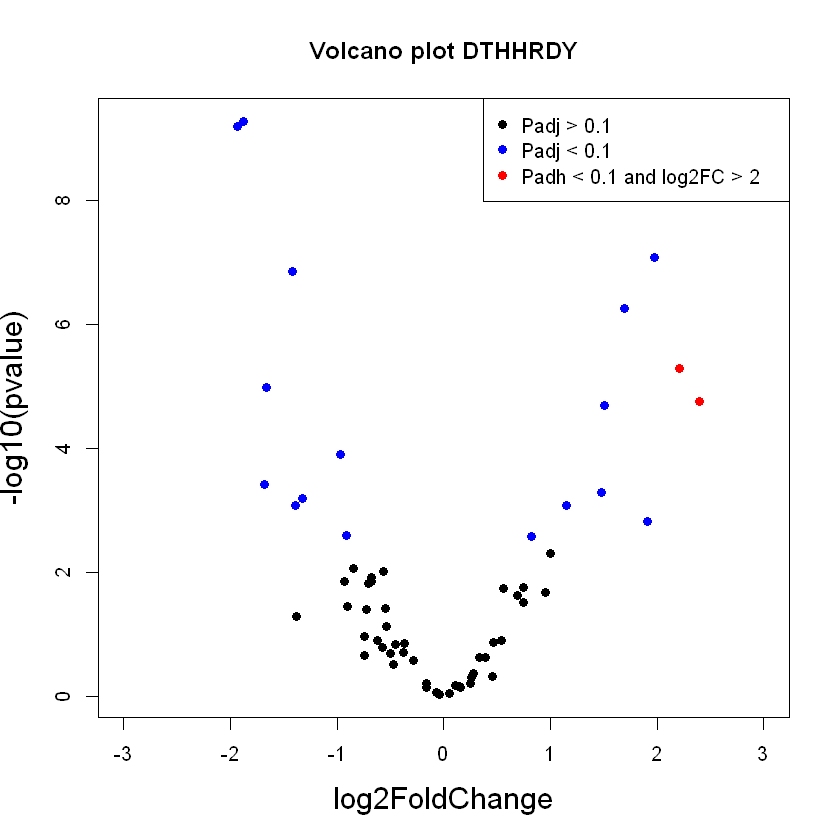

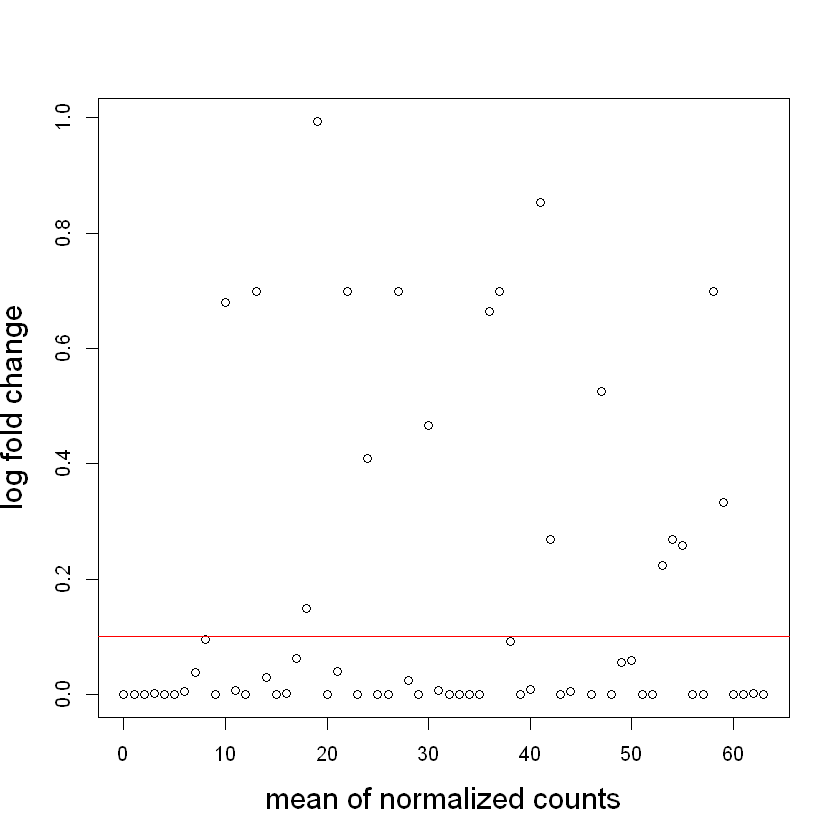

log2 fold change (MLE): TRISCHD 
Wald test p-value: TRISCHD 
DataFrame with 45 rows and 6 columns
     baseMean log2FoldChange       lfcSE      stat      pvalue        padj
    <numeric>      <numeric>   <numeric> <numeric>   <numeric>   <numeric>
33    155.450     0.00325618 0.000272450  11.95146 6.37969e-33 4.01921e-31
39    149.278     0.00400691 0.000355038  11.28587 1.54108e-29 4.85442e-28
57    148.241     0.00282808 0.000268215  10.54408 5.40976e-26 1.13605e-24
26    117.563     0.00418936 0.000416295  10.06346 8.01293e-24 1.26204e-22
12    188.915     0.00432234 0.000486819   8.87874 6.76204e-19 8.52017e-18
...       ...            ...         ...       ...         ...         ...
49    129.846   -0.000556135 0.000266138  -2.08965   0.0366495   0.0563151
50    188.289   -0.000701417 0.000340991  -2.05700   0.0396866   0.0595300
17    119.358   -0.000435820 0.000215123  -2.02590   0.0427745   0.0626697
38    119.988    0.000600854 0.000325205   1.84761   0.0646583   0.0925789
8 

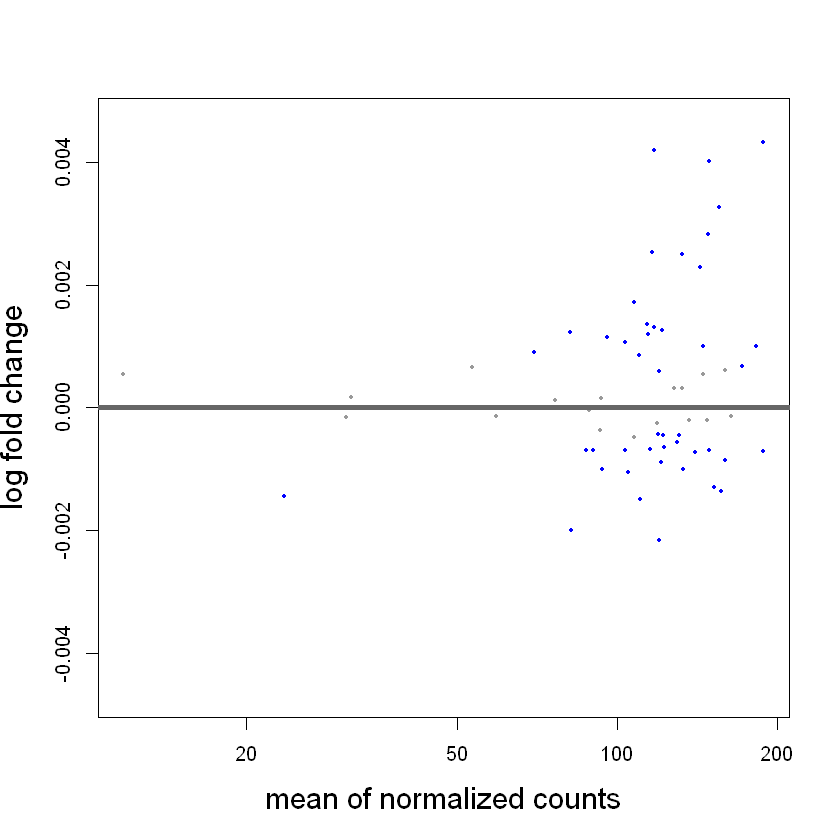

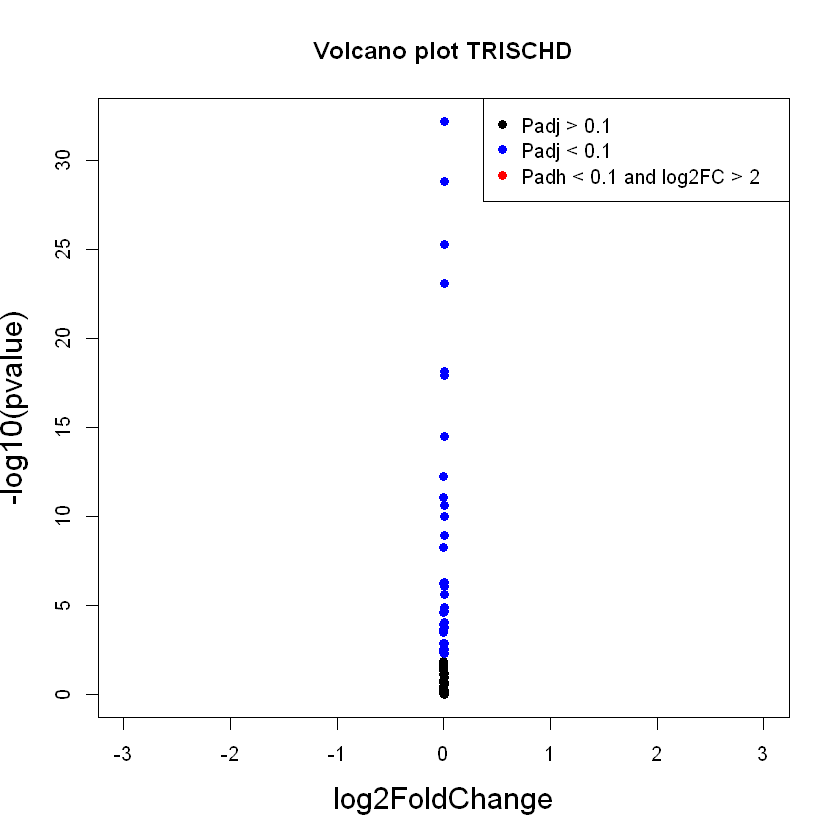

In [97]:
#Q2.2: Technical variables
morph_analysis("COHORT", ~ COHORT, TRUE)
morph_analysis("DTHHRDY", ~ DTHHRDY, TRUE)
morph_analysis("TRISCHD", ~TRISCHD, FALSE)

In [ ]:
#Plotting correlation
#TODO: only for relevant morphological clusters
png("test.png")
corrplot(cor(t(morph_counts)))
dev.off()

## Q3 Morphology vs gene expression

In [9]:
morphological_counts = read.delim(file='morphological-counts.tsv',sep='\t',header=TRUE,row.names=1)
RNA_read_counts = read.delim(file='RNA-read-counts.tsv',sep='\t',header=TRUE,row.names=1)
RNA_read_counts = subset(RNA_read_counts, select = -1)
#Gtex ids have lines in rna file, but dots in morph file --> change ids in rna matrix
names(RNA_read_counts) = gsub("\\.","-",names(RNA_read_counts))
head(morphological_counts)
head(RNA_read_counts)

,Mophological.cluster.0,Mophological.cluster.1,Mophological.cluster.2,Mophological.cluster.3,Mophological.cluster.4,Mophological.cluster.5,Mophological.cluster.6,Mophological.cluster.7,Mophological.cluster.8,Mophological.cluster.9,⋯,Mophological.cluster.54,Mophological.cluster.55,Mophological.cluster.56,Mophological.cluster.57,Mophological.cluster.58,Mophological.cluster.59,Mophological.cluster.60,Mophological.cluster.61,Mophological.cluster.62,Mophological.cluster.63
,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,⋯,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>
GTEX-1122O-0226,171,133,105,235,13,399,350,681,484,105,⋯,146,264,50,44,30,98,1069,686,513,84
GTEX-1128S-0126,198,60,131,345,261,332,186,285,176,135,⋯,7,416,65,378,63,12,655,199,207,334
GTEX-113JC-0126,175,95,73,160,48,163,93,398,301,56,⋯,65,224,153,29,5,3,438,232,115,34
GTEX-11DXX-0226,79,52,144,20,30,177,177,18,462,213,⋯,93,270,72,69,63,3,131,285,67,43
GTEX-11EM3-0126,20,22,107,74,49,589,466,88,49,140,⋯,99,41,150,18,2,2,193,44,66,24
GTEX-11EMC-0226,24,35,161,50,233,84,29,42,76,65,⋯,26,77,114,218,2,0,110,19,10,70


,GTEX-1122O-0226,GTEX-1128S-0126,GTEX-113JC-0126,GTEX-11DXX-0226,GTEX-11EM3-0126,GTEX-11EMC-0226,GTEX-11GSP-0126,GTEX-11I78-0526,GTEX-11P81-0126,GTEX-11TTK-0826,⋯,GTEX-1PBJI-0726,GTEX-1QCLZ-0626,GTEX-1QEPI-0726,GTEX-1QP28-0626,GTEX-1QP67-0326,GTEX-1QPFJ-0626,GTEX-1R46S-0426,GTEX-1R9JW-0226,GTEX-1RDX4-0926,GTEX-1S5ZU-0726
,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,⋯,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>
ENSG00000223972.5,0,0,0,1,0,0,0,0,0,0,⋯,0,1,0,0,1,0,0,0,0,1
ENSG00000227232.5,132,259,87,207,122,251,99,125,119,321,⋯,202,173,164,85,288,183,136,74,168,169
ENSG00000278267.1,0,0,0,0,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0
ENSG00000243485.5,0,1,1,0,3,0,0,0,0,0,⋯,0,0,1,0,0,0,0,0,1,0
ENSG00000237613.2,0,0,0,0,1,0,0,0,0,0,⋯,0,1,0,0,0,0,0,1,0,0
ENSG00000268020.3,0,0,0,1,1,0,1,1,0,0,⋯,0,2,1,0,1,0,0,1,0,1


The provided RNA count file has no missing values

In [4]:
any(is.na(RNA_read_counts))


[1] FALSE

For every sample, we have the RNA counts of 56200 genes

In [13]:
dim(RNA_read_counts)

[1] 56200   142

We construct a vector containing the Median Absolute Deviation (MAD) of the RNA count of every gene. This is a measure of the variability.

In [10]:
MADvector = c()
for (i in 1:nrow(RNA_read_counts)){
  MADvector = c(MADvector,mad(as.numeric(RNA_read_counts[i,])))
}
summary(MADvector)

    Min.  1st Qu.   Median     Mean  3rd Qu.     Max. 
     0.0      0.0      1.5    369.7     75.6 850445.3 

We filter the genes based on the MAD. Only genes with MAD > 1.5 are analysed. We are only interested in genes that vary in expression across samples.

TODO: why 1.5?

In [11]:
RNA_read_counts = RNA_read_counts[which(MADvector > 1.5),]
dim(RNA_read_counts)

[1] 27850   142

We make a matrix of the relative frequencies of clusters instead of raw counts

In [12]:
frequencies_clusters = data.frame(rep(list(rep(0,nrow(morphological_counts))),ncol(morphological_counts)))
rownames(frequencies_clusters) = rownames(morphological_counts)
names(frequencies_clusters) = names(morphological_counts)
for (i in 1:nrow(morphological_counts)){
  sum_r = sum(morphological_counts[i,])
  frequencies_clusters[i,] <- morphological_counts[i,]/sum_r
}
head(frequencies_clusters)

,Mophological.cluster.0,Mophological.cluster.1,Mophological.cluster.2,Mophological.cluster.3,Mophological.cluster.4,Mophological.cluster.5,Mophological.cluster.6,Mophological.cluster.7,Mophological.cluster.8,Mophological.cluster.9,⋯,Mophological.cluster.54,Mophological.cluster.55,Mophological.cluster.56,Mophological.cluster.57,Mophological.cluster.58,Mophological.cluster.59,Mophological.cluster.60,Mophological.cluster.61,Mophological.cluster.62,Mophological.cluster.63
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
GTEX-1122O-0226,0.011771995,0.009155996,0.007228418,0.016177888,0.000894947,0.02746799,0.024094727,0.046881454,0.033319565,0.007228418,⋯,0.0100509431,0.018174308,0.003442104,0.003029051,0.0020652623,0.0067465235,0.07359218,0.047225664,0.035315985,0.005782734
GTEX-1128S-0126,0.016727211,0.005068852,0.011066993,0.029145898,0.022049506,0.02804765,0.015713441,0.024077047,0.014868632,0.011404917,⋯,0.0005913661,0.035144040,0.005491256,0.031933767,0.0053222945,0.0010137704,0.05533497,0.016811692,0.017487539,0.028216609
GTEX-113JC-0126,0.017475534,0.009486719,0.007289794,0.015977631,0.004793289,0.01627721,0.009286998,0.039744358,0.030057919,0.005592171,⋯,0.0064909127,0.022368684,0.015278610,0.002895946,0.0004993010,0.0002995806,0.04373877,0.023167565,0.011483923,0.003395247
GTEX-11DXX-0226,0.009920884,0.006530202,0.018083637,0.002511616,0.003767424,0.02222780,0.022227804,0.002260455,0.058018335,0.026748713,⋯,0.0116790154,0.033906819,0.009041818,0.008665076,0.0079115911,0.0003767424,0.01645109,0.035790531,0.008413914,0.005399975
GTEX-11EM3-0126,0.002532287,0.002785515,0.013547734,0.009369461,0.006204102,0.07457584,0.059002279,0.011142061,0.006204102,0.017726007,⋯,0.0125348189,0.005191188,0.018992150,0.002279058,0.0002532287,0.0002532287,0.02443657,0.005571031,0.008356546,0.003038744
GTEX-11EMC-0226,0.005483208,0.007996345,0.036783185,0.011423349,0.053232808,0.01919123,0.006625543,0.009595613,0.017363491,0.014850354,⋯,0.0059401416,0.017591958,0.026045236,0.049805803,0.0004569340,0.0000000000,0.02513137,0.004340873,0.002284670,0.015992689


We will use DEseq2 in order to get information on each cluster. We prepare empty data frames to store these values in

In [15]:
transcripts <- rep(0,ncol(frequencies_clusters)-1)


TODO: why leave cluster 15 out? maybe it was supposed to be cluster 14? (the muscle one)

In [24]:
rel_Morp = names(frequencies_clusters)[-c(15)]

In [206]:
#subset for all padj, log2, wald test t-values and nominal (non-adjusted) p-value per cluster and transcript

In [19]:
RNA_padJ = data.frame(matrix(
  0, nrow = nrow(RNA_read_counts),
  ncol = ncol(frequencies_clusters)-1))
rownames(RNA_padJ) = rownames(RNA_read_counts)
names(RNA_padJ) = rel_Morp

In [20]:
RNA_log2 = data.frame(matrix(
  0, nrow = nrow(RNA_read_counts),
  ncol = ncol(frequencies_clusters)-1))
rownames(RNA_log2) = rownames(RNA_read_counts)
names(RNA_log2) = rel_Morp

In [21]:
RNA_Wald = data.frame(matrix(
  0, nrow = nrow(RNA_read_counts),
  ncol = ncol(frequencies_clusters)-1))
rownames(RNA_Wald) = rownames(RNA_read_counts)
names(RNA_Wald) = rel_Morp

In [22]:
p_value = data.frame(matrix(
  0, nrow = nrow(RNA_read_counts),
  ncol = ncol(frequencies_clusters)-1))
rownames(p_value) = rownames(RNA_read_counts)
names(p_value) = rel_Morp

In [23]:
sign_padj <- function(padj_val,alpha=0.1){
  sorted_padj <- padj_val[padj_val<alpha & is.na(padj_val) == FALSE]
  names(sorted_padj) <- names(padj_val)[padj_val<alpha & is.na(padj_val) == FALSE]
  increasing_padj <- sort(sorted_padj,index.return=TRUE)$ix
  return(names(sorted_padj)[increasing_padj])
}

In [36]:
for (i in 1:length(rel_Morp)) {
  one_rel_Morph <- rel_Morp[i]
  print(one_rel_Morph)
  des <- as.formula(paste("~", one_rel_Morph, "+", names(frequencies_clusters)[15]))
  ddsfm <- DESeqDataSetFromMatrix(countData = RNA_read_counts,
                                  colData = frequencies_clusters, 
                                  design = des)
  ddsfm <- DESeq(ddsfm)
  res <- results(ddsfm)
  RNA_padJ[, i] <- res$padj
  RNA_log2[, i] <- res$log2FoldChange
  RNA_Wald[, i] <- res$stat
  p_value[, i] <- res$pvalue
  padjMorph <- res$padj
  names(padjMorph) <- rownames(RNA_padJ)
  transcripts[i] <- list(sign_padj(padjMorph), 0.1/64)
}

[1] "Mophological.cluster.0"


estimating size factors

estimating dispersions

gene-wise dispersion estimates

mean-dispersion relationship

final dispersion estimates

fitting model and testing

Warning message in transcripts[i] <- list(sign_padj(padjMorph), 0.1/64):
"number of items to replace is not a multiple of replacement length"


[1] "Mophological.cluster.1"


estimating size factors

estimating dispersions

gene-wise dispersion estimates

mean-dispersion relationship

final dispersion estimates

fitting model and testing

Warning message in transcripts[i] <- list(sign_padj(padjMorph), 0.1/64):
"number of items to replace is not a multiple of replacement length"


[1] "Mophological.cluster.2"


estimating size factors

estimating dispersions

gene-wise dispersion estimates

mean-dispersion relationship

final dispersion estimates

fitting model and testing

Warning message in transcripts[i] <- list(sign_padj(padjMorph), 0.1/64):
"number of items to replace is not a multiple of replacement length"


[1] "Mophological.cluster.3"


estimating size factors

estimating dispersions

gene-wise dispersion estimates

mean-dispersion relationship

final dispersion estimates

fitting model and testing

Warning message in transcripts[i] <- list(sign_padj(padjMorph), 0.1/64):
"number of items to replace is not a multiple of replacement length"


[1] "Mophological.cluster.4"


estimating size factors

estimating dispersions

gene-wise dispersion estimates

mean-dispersion relationship

final dispersion estimates

fitting model and testing

Warning message in transcripts[i] <- list(sign_padj(padjMorph), 0.1/64):
"number of items to replace is not a multiple of replacement length"


[1] "Mophological.cluster.5"


estimating size factors

estimating dispersions

gene-wise dispersion estimates

mean-dispersion relationship

final dispersion estimates

fitting model and testing

Warning message in transcripts[i] <- list(sign_padj(padjMorph), 0.1/64):
"number of items to replace is not a multiple of replacement length"


[1] "Mophological.cluster.6"


estimating size factors

estimating dispersions

gene-wise dispersion estimates

mean-dispersion relationship

final dispersion estimates

fitting model and testing

Warning message in transcripts[i] <- list(sign_padj(padjMorph), 0.1/64):
"number of items to replace is not a multiple of replacement length"


[1] "Mophological.cluster.7"


estimating size factors

estimating dispersions

gene-wise dispersion estimates

mean-dispersion relationship

final dispersion estimates

fitting model and testing

Warning message in transcripts[i] <- list(sign_padj(padjMorph), 0.1/64):
"number of items to replace is not a multiple of replacement length"


[1] "Mophological.cluster.8"


estimating size factors

estimating dispersions

gene-wise dispersion estimates

mean-dispersion relationship

final dispersion estimates

fitting model and testing

Warning message in transcripts[i] <- list(sign_padj(padjMorph), 0.1/64):
"number of items to replace is not a multiple of replacement length"


[1] "Mophological.cluster.9"


estimating size factors

estimating dispersions

gene-wise dispersion estimates

mean-dispersion relationship

final dispersion estimates

fitting model and testing

Warning message in transcripts[i] <- list(sign_padj(padjMorph), 0.1/64):
"number of items to replace is not a multiple of replacement length"


[1] "Mophological.cluster.10"


estimating size factors

estimating dispersions

gene-wise dispersion estimates

mean-dispersion relationship

final dispersion estimates

fitting model and testing

Warning message in transcripts[i] <- list(sign_padj(padjMorph), 0.1/64):
"number of items to replace is not a multiple of replacement length"


[1] "Mophological.cluster.11"


estimating size factors

estimating dispersions

gene-wise dispersion estimates

mean-dispersion relationship

final dispersion estimates

fitting model and testing

Warning message in transcripts[i] <- list(sign_padj(padjMorph), 0.1/64):
"number of items to replace is not a multiple of replacement length"


[1] "Mophological.cluster.12"


estimating size factors

estimating dispersions

gene-wise dispersion estimates

mean-dispersion relationship

final dispersion estimates

fitting model and testing

Warning message in transcripts[i] <- list(sign_padj(padjMorph), 0.1/64):
"number of items to replace is not a multiple of replacement length"


[1] "Mophological.cluster.13"


estimating size factors

estimating dispersions

gene-wise dispersion estimates

mean-dispersion relationship

final dispersion estimates

fitting model and testing

Warning message in transcripts[i] <- list(sign_padj(padjMorph), 0.1/64):
"number of items to replace is not a multiple of replacement length"


[1] "Mophological.cluster.15"


estimating size factors

estimating dispersions

gene-wise dispersion estimates

mean-dispersion relationship

final dispersion estimates

fitting model and testing

Warning message in transcripts[i] <- list(sign_padj(padjMorph), 0.1/64):
"number of items to replace is not a multiple of replacement length"


[1] "Mophological.cluster.16"


estimating size factors

estimating dispersions

gene-wise dispersion estimates

mean-dispersion relationship

final dispersion estimates

fitting model and testing

Warning message in transcripts[i] <- list(sign_padj(padjMorph), 0.1/64):
"number of items to replace is not a multiple of replacement length"


[1] "Mophological.cluster.17"


estimating size factors

estimating dispersions

gene-wise dispersion estimates

mean-dispersion relationship

final dispersion estimates

fitting model and testing

Warning message in transcripts[i] <- list(sign_padj(padjMorph), 0.1/64):
"number of items to replace is not a multiple of replacement length"


[1] "Mophological.cluster.18"


estimating size factors

estimating dispersions

gene-wise dispersion estimates

mean-dispersion relationship

final dispersion estimates

fitting model and testing

Warning message in transcripts[i] <- list(sign_padj(padjMorph), 0.1/64):
"number of items to replace is not a multiple of replacement length"


[1] "Mophological.cluster.19"


estimating size factors

estimating dispersions

gene-wise dispersion estimates

mean-dispersion relationship

final dispersion estimates

fitting model and testing

Warning message in transcripts[i] <- list(sign_padj(padjMorph), 0.1/64):
"number of items to replace is not a multiple of replacement length"


[1] "Mophological.cluster.20"


estimating size factors

estimating dispersions

gene-wise dispersion estimates

mean-dispersion relationship

final dispersion estimates

fitting model and testing

Warning message in transcripts[i] <- list(sign_padj(padjMorph), 0.1/64):
"number of items to replace is not a multiple of replacement length"


[1] "Mophological.cluster.21"


estimating size factors

estimating dispersions

gene-wise dispersion estimates

mean-dispersion relationship

final dispersion estimates

fitting model and testing

Warning message in transcripts[i] <- list(sign_padj(padjMorph), 0.1/64):
"number of items to replace is not a multiple of replacement length"


[1] "Mophological.cluster.22"


estimating size factors

estimating dispersions

gene-wise dispersion estimates

mean-dispersion relationship

final dispersion estimates

fitting model and testing

Warning message in transcripts[i] <- list(sign_padj(padjMorph), 0.1/64):
"number of items to replace is not a multiple of replacement length"


[1] "Mophological.cluster.23"


estimating size factors

estimating dispersions

gene-wise dispersion estimates

mean-dispersion relationship

final dispersion estimates

fitting model and testing

Warning message in transcripts[i] <- list(sign_padj(padjMorph), 0.1/64):
"number of items to replace is not a multiple of replacement length"


[1] "Mophological.cluster.24"


estimating size factors

estimating dispersions

gene-wise dispersion estimates

mean-dispersion relationship

final dispersion estimates

fitting model and testing

Warning message in transcripts[i] <- list(sign_padj(padjMorph), 0.1/64):
"number of items to replace is not a multiple of replacement length"


[1] "Mophological.cluster.25"


estimating size factors

estimating dispersions

gene-wise dispersion estimates

mean-dispersion relationship

final dispersion estimates

fitting model and testing

Warning message in transcripts[i] <- list(sign_padj(padjMorph), 0.1/64):
"number of items to replace is not a multiple of replacement length"


[1] "Mophological.cluster.26"


estimating size factors

estimating dispersions

gene-wise dispersion estimates

mean-dispersion relationship

final dispersion estimates

fitting model and testing

Warning message in transcripts[i] <- list(sign_padj(padjMorph), 0.1/64):
"number of items to replace is not a multiple of replacement length"


[1] "Mophological.cluster.27"


estimating size factors

estimating dispersions

gene-wise dispersion estimates

mean-dispersion relationship

final dispersion estimates

fitting model and testing

Warning message in transcripts[i] <- list(sign_padj(padjMorph), 0.1/64):
"number of items to replace is not a multiple of replacement length"


[1] "Mophological.cluster.28"


estimating size factors

estimating dispersions

gene-wise dispersion estimates

mean-dispersion relationship

final dispersion estimates

fitting model and testing

Warning message in transcripts[i] <- list(sign_padj(padjMorph), 0.1/64):
"number of items to replace is not a multiple of replacement length"


[1] "Mophological.cluster.29"


estimating size factors

estimating dispersions

gene-wise dispersion estimates

mean-dispersion relationship

final dispersion estimates

fitting model and testing

Warning message in transcripts[i] <- list(sign_padj(padjMorph), 0.1/64):
"number of items to replace is not a multiple of replacement length"


[1] "Mophological.cluster.30"


estimating size factors

estimating dispersions

gene-wise dispersion estimates

mean-dispersion relationship

final dispersion estimates

fitting model and testing

Warning message in transcripts[i] <- list(sign_padj(padjMorph), 0.1/64):
"number of items to replace is not a multiple of replacement length"


[1] "Mophological.cluster.31"


estimating size factors

estimating dispersions

gene-wise dispersion estimates

mean-dispersion relationship

final dispersion estimates

fitting model and testing

Warning message in transcripts[i] <- list(sign_padj(padjMorph), 0.1/64):
"number of items to replace is not a multiple of replacement length"


[1] "Mophological.cluster.32"


estimating size factors

estimating dispersions

gene-wise dispersion estimates

mean-dispersion relationship

final dispersion estimates

fitting model and testing

Warning message in transcripts[i] <- list(sign_padj(padjMorph), 0.1/64):
"number of items to replace is not a multiple of replacement length"


[1] "Mophological.cluster.33"


estimating size factors

estimating dispersions

gene-wise dispersion estimates

mean-dispersion relationship

final dispersion estimates

fitting model and testing

Warning message in transcripts[i] <- list(sign_padj(padjMorph), 0.1/64):
"number of items to replace is not a multiple of replacement length"


[1] "Mophological.cluster.34"


estimating size factors

estimating dispersions

gene-wise dispersion estimates

mean-dispersion relationship

final dispersion estimates

fitting model and testing

Warning message in transcripts[i] <- list(sign_padj(padjMorph), 0.1/64):
"number of items to replace is not a multiple of replacement length"


[1] "Mophological.cluster.35"


estimating size factors

estimating dispersions

gene-wise dispersion estimates

mean-dispersion relationship

final dispersion estimates

fitting model and testing

Warning message in transcripts[i] <- list(sign_padj(padjMorph), 0.1/64):
"number of items to replace is not a multiple of replacement length"


[1] "Mophological.cluster.36"


estimating size factors

estimating dispersions

gene-wise dispersion estimates

mean-dispersion relationship

final dispersion estimates

fitting model and testing

Warning message in transcripts[i] <- list(sign_padj(padjMorph), 0.1/64):
"number of items to replace is not a multiple of replacement length"


[1] "Mophological.cluster.37"


estimating size factors

estimating dispersions

gene-wise dispersion estimates

mean-dispersion relationship

final dispersion estimates

fitting model and testing

Warning message in transcripts[i] <- list(sign_padj(padjMorph), 0.1/64):
"number of items to replace is not a multiple of replacement length"


[1] "Mophological.cluster.38"


estimating size factors

estimating dispersions

gene-wise dispersion estimates

mean-dispersion relationship

final dispersion estimates

fitting model and testing

Warning message in transcripts[i] <- list(sign_padj(padjMorph), 0.1/64):
"number of items to replace is not a multiple of replacement length"


[1] "Mophological.cluster.39"


estimating size factors

estimating dispersions

gene-wise dispersion estimates

mean-dispersion relationship

final dispersion estimates

fitting model and testing

Warning message in transcripts[i] <- list(sign_padj(padjMorph), 0.1/64):
"number of items to replace is not a multiple of replacement length"


[1] "Mophological.cluster.40"


estimating size factors

estimating dispersions

gene-wise dispersion estimates

mean-dispersion relationship

final dispersion estimates

fitting model and testing

Warning message in transcripts[i] <- list(sign_padj(padjMorph), 0.1/64):
"number of items to replace is not a multiple of replacement length"


[1] "Mophological.cluster.41"


estimating size factors

estimating dispersions

gene-wise dispersion estimates

mean-dispersion relationship

final dispersion estimates

fitting model and testing

Warning message in transcripts[i] <- list(sign_padj(padjMorph), 0.1/64):
"number of items to replace is not a multiple of replacement length"


[1] "Mophological.cluster.42"


estimating size factors

estimating dispersions

gene-wise dispersion estimates

mean-dispersion relationship

final dispersion estimates

fitting model and testing

Warning message in transcripts[i] <- list(sign_padj(padjMorph), 0.1/64):
"number of items to replace is not a multiple of replacement length"


[1] "Mophological.cluster.43"


estimating size factors

estimating dispersions

gene-wise dispersion estimates

mean-dispersion relationship

final dispersion estimates

fitting model and testing

Warning message in transcripts[i] <- list(sign_padj(padjMorph), 0.1/64):
"number of items to replace is not a multiple of replacement length"


[1] "Mophological.cluster.44"


estimating size factors

estimating dispersions

gene-wise dispersion estimates

mean-dispersion relationship

final dispersion estimates

fitting model and testing

Warning message in transcripts[i] <- list(sign_padj(padjMorph), 0.1/64):
"number of items to replace is not a multiple of replacement length"


[1] "Mophological.cluster.45"


estimating size factors

estimating dispersions

gene-wise dispersion estimates

mean-dispersion relationship

final dispersion estimates

fitting model and testing

-- replacing outliers and refitting for 1878 genes
-- DESeq argument 'minReplicatesForReplace' = 7 
-- original counts are preserved in counts(dds)

estimating dispersions

fitting model and testing

Warning message in transcripts[i] <- list(sign_padj(padjMorph), 0.1/64):
"number of items to replace is not a multiple of replacement length"


[1] "Mophological.cluster.46"


estimating size factors

estimating dispersions

gene-wise dispersion estimates

mean-dispersion relationship

final dispersion estimates

fitting model and testing

Warning message in transcripts[i] <- list(sign_padj(padjMorph), 0.1/64):
"number of items to replace is not a multiple of replacement length"


[1] "Mophological.cluster.47"


estimating size factors

estimating dispersions

gene-wise dispersion estimates

mean-dispersion relationship

final dispersion estimates

fitting model and testing

Warning message in transcripts[i] <- list(sign_padj(padjMorph), 0.1/64):
"number of items to replace is not a multiple of replacement length"


[1] "Mophological.cluster.48"


estimating size factors

estimating dispersions

gene-wise dispersion estimates

mean-dispersion relationship

final dispersion estimates

fitting model and testing

Warning message in transcripts[i] <- list(sign_padj(padjMorph), 0.1/64):
"number of items to replace is not a multiple of replacement length"


[1] "Mophological.cluster.49"


estimating size factors

estimating dispersions

gene-wise dispersion estimates

mean-dispersion relationship

final dispersion estimates

fitting model and testing

Warning message in transcripts[i] <- list(sign_padj(padjMorph), 0.1/64):
"number of items to replace is not a multiple of replacement length"


[1] "Mophological.cluster.50"


estimating size factors

estimating dispersions

gene-wise dispersion estimates

mean-dispersion relationship

final dispersion estimates

fitting model and testing

Warning message in transcripts[i] <- list(sign_padj(padjMorph), 0.1/64):
"number of items to replace is not a multiple of replacement length"


[1] "Mophological.cluster.51"


estimating size factors

estimating dispersions

gene-wise dispersion estimates

mean-dispersion relationship

final dispersion estimates

fitting model and testing

Warning message in transcripts[i] <- list(sign_padj(padjMorph), 0.1/64):
"number of items to replace is not a multiple of replacement length"


[1] "Mophological.cluster.52"


estimating size factors

estimating dispersions

gene-wise dispersion estimates

mean-dispersion relationship

final dispersion estimates

fitting model and testing

Warning message in transcripts[i] <- list(sign_padj(padjMorph), 0.1/64):
"number of items to replace is not a multiple of replacement length"


[1] "Mophological.cluster.53"


estimating size factors

estimating dispersions

gene-wise dispersion estimates

mean-dispersion relationship

final dispersion estimates

fitting model and testing

Warning message in transcripts[i] <- list(sign_padj(padjMorph), 0.1/64):
"number of items to replace is not a multiple of replacement length"


[1] "Mophological.cluster.54"


estimating size factors

estimating dispersions

gene-wise dispersion estimates

mean-dispersion relationship

final dispersion estimates

fitting model and testing

Warning message in transcripts[i] <- list(sign_padj(padjMorph), 0.1/64):
"number of items to replace is not a multiple of replacement length"


[1] "Mophological.cluster.55"


estimating size factors

estimating dispersions

gene-wise dispersion estimates

mean-dispersion relationship

final dispersion estimates

fitting model and testing

Warning message in transcripts[i] <- list(sign_padj(padjMorph), 0.1/64):
"number of items to replace is not a multiple of replacement length"


[1] "Mophological.cluster.56"


estimating size factors

estimating dispersions

gene-wise dispersion estimates

mean-dispersion relationship

final dispersion estimates

fitting model and testing

Warning message in transcripts[i] <- list(sign_padj(padjMorph), 0.1/64):
"number of items to replace is not a multiple of replacement length"


[1] "Mophological.cluster.57"


estimating size factors

estimating dispersions

gene-wise dispersion estimates

mean-dispersion relationship

final dispersion estimates

fitting model and testing

Warning message in transcripts[i] <- list(sign_padj(padjMorph), 0.1/64):
"number of items to replace is not a multiple of replacement length"


[1] "Mophological.cluster.58"


estimating size factors

estimating dispersions

gene-wise dispersion estimates

mean-dispersion relationship

final dispersion estimates

fitting model and testing

Warning message in transcripts[i] <- list(sign_padj(padjMorph), 0.1/64):
"number of items to replace is not a multiple of replacement length"


[1] "Mophological.cluster.59"


estimating size factors

estimating dispersions

gene-wise dispersion estimates

mean-dispersion relationship

final dispersion estimates

fitting model and testing

-- replacing outliers and refitting for 1430 genes
-- DESeq argument 'minReplicatesForReplace' = 7 
-- original counts are preserved in counts(dds)

estimating dispersions

fitting model and testing

Warning message in transcripts[i] <- list(sign_padj(padjMorph), 0.1/64):
"number of items to replace is not a multiple of replacement length"


[1] "Mophological.cluster.60"


estimating size factors

estimating dispersions

gene-wise dispersion estimates

mean-dispersion relationship

final dispersion estimates

fitting model and testing

Warning message in transcripts[i] <- list(sign_padj(padjMorph), 0.1/64):
"number of items to replace is not a multiple of replacement length"


[1] "Mophological.cluster.61"


estimating size factors

estimating dispersions

gene-wise dispersion estimates

mean-dispersion relationship

final dispersion estimates

fitting model and testing

Warning message in transcripts[i] <- list(sign_padj(padjMorph), 0.1/64):
"number of items to replace is not a multiple of replacement length"


[1] "Mophological.cluster.62"


estimating size factors

estimating dispersions

gene-wise dispersion estimates

mean-dispersion relationship

final dispersion estimates

fitting model and testing

Warning message in transcripts[i] <- list(sign_padj(padjMorph), 0.1/64):
"number of items to replace is not a multiple of replacement length"


[1] "Mophological.cluster.63"


estimating size factors

estimating dispersions

gene-wise dispersion estimates

mean-dispersion relationship

final dispersion estimates

fitting model and testing

Warning message in transcripts[i] <- list(sign_padj(padjMorph), 0.1/64):
"number of items to replace is not a multiple of replacement length"


In [239]:
m_Order <- c() #list of the names of the morphological clusters in the order that they appear in transcripts
for (i in 1:length(transcripts)){
  print(names(RNA_padJ)[i])
  m_Order <- c(m_Order,names(RNA_padJ)[i])
  len <- transcripts[[i]]
  print(length(len)) #number of up or downregulated genes
  print(len[1:min(c(10,length(len)))]) #10 most up or downregulated genes
}


[1] "Mophological.cluster.0"
[1] 31
 [1] "NA.10831"           "NA.1510"            "ENSG00000267213.4" 
 [4] "ENSG00000107404.19" "NA.248"             "NA.3101"           
 [7] "ENSG00000144908.13" "ENSG00000118508.4"  "NA.7771"           
[10] "NA.1322"           
[1] "Mophological.cluster.1"
[1] 17
 [1] "ENSG00000198961.9"  "NA.6887"            "ENSG00000197386.10"
 [4] "ENSG00000237065.2"  "ENSG00000151239.13" "NA.8414"           
 [7] "NA.13059"           "ENSG00000267674.1"  "ENSG00000196860.7" 
[10] "NA.7023"           
[1] "Mophological.cluster.2"
[1] 33
 [1] "NA.10831"           "ENSG00000267213.4"  "ENSG00000107404.19"
 [4] "NA.3101"            "NA.9465"            "NA.248"            
 [7] "NA.1510"            "ENSG00000118508.4"  "NA.1322"           
[10] "ENSG00000157778.8" 
[1] "Mophological.cluster.3"
[1] 32
 [1] "ENSG00000118508.4" "NA.1510"           "ENSG00000267213.4"
 [4] "NA.248"            "ENSG00000267674.1" "NA.7057"          
 [7] "NA.13059"          "ENSG000001

In [37]:
# Create an empty list to store the results
transcripts2 <- vector("list", length = length(rel_Morp))

for (i in 1:length(rel_Morp)) {
  one_rel_Morph <- rel_Morp[i]
  print(one_rel_Morph)
  des <- as.formula(paste("~", one_rel_Morph, "+", names(frequencies_clusters)[15]))
  ddsfm <- DESeqDataSetFromMatrix(countData = RNA_read_counts,
                                  colData = frequencies_clusters, 
                                  design = des)
  ddsfm <- DESeq(ddsfm)
  res <- results(ddsfm)
  
  # Save res as a CSV file
  csv_file <- paste0("res_", i, ".csv")
  write.csv(res, file = csv_file)
  
  RNA_padJ[, i] <- res$padj
  padjMorph <- res$padj
  names(padjMorph) <- rownames(RNA_padJ)
  transcripts2[i] <- list(sign_padj(padjMorph), 0.1/64)
}


[1] "Mophological.cluster.0"


estimating size factors

estimating dispersions

gene-wise dispersion estimates

mean-dispersion relationship

final dispersion estimates

fitting model and testing

Warning message in transcripts2[i] <- list(sign_padj(padjMorph), 0.1/63):
"number of items to replace is not a multiple of replacement length"


[1] "Mophological.cluster.1"


estimating size factors

estimating dispersions

gene-wise dispersion estimates

mean-dispersion relationship

final dispersion estimates

fitting model and testing

Warning message in transcripts2[i] <- list(sign_padj(padjMorph), 0.1/63):
"number of items to replace is not a multiple of replacement length"


[1] "Mophological.cluster.2"


estimating size factors

estimating dispersions

gene-wise dispersion estimates

mean-dispersion relationship

final dispersion estimates

fitting model and testing

Warning message in transcripts2[i] <- list(sign_padj(padjMorph), 0.1/63):
"number of items to replace is not a multiple of replacement length"


[1] "Mophological.cluster.3"


estimating size factors

estimating dispersions

gene-wise dispersion estimates

mean-dispersion relationship

final dispersion estimates

fitting model and testing

Warning message in transcripts2[i] <- list(sign_padj(padjMorph), 0.1/63):
"number of items to replace is not a multiple of replacement length"


[1] "Mophological.cluster.4"


estimating size factors

estimating dispersions

gene-wise dispersion estimates

mean-dispersion relationship

final dispersion estimates

fitting model and testing

Warning message in transcripts2[i] <- list(sign_padj(padjMorph), 0.1/63):
"number of items to replace is not a multiple of replacement length"


[1] "Mophological.cluster.5"


estimating size factors

estimating dispersions

gene-wise dispersion estimates

mean-dispersion relationship

final dispersion estimates

fitting model and testing

Warning message in transcripts2[i] <- list(sign_padj(padjMorph), 0.1/63):
"number of items to replace is not a multiple of replacement length"


[1] "Mophological.cluster.6"


estimating size factors

estimating dispersions

gene-wise dispersion estimates

mean-dispersion relationship

final dispersion estimates

fitting model and testing

Warning message in transcripts2[i] <- list(sign_padj(padjMorph), 0.1/63):
"number of items to replace is not a multiple of replacement length"


[1] "Mophological.cluster.7"


estimating size factors

estimating dispersions

gene-wise dispersion estimates

mean-dispersion relationship

final dispersion estimates

fitting model and testing

Warning message in transcripts2[i] <- list(sign_padj(padjMorph), 0.1/63):
"number of items to replace is not a multiple of replacement length"


[1] "Mophological.cluster.8"


estimating size factors

estimating dispersions

gene-wise dispersion estimates

mean-dispersion relationship

final dispersion estimates

fitting model and testing

Warning message in transcripts2[i] <- list(sign_padj(padjMorph), 0.1/63):
"number of items to replace is not a multiple of replacement length"


[1] "Mophological.cluster.9"


estimating size factors

estimating dispersions

gene-wise dispersion estimates

mean-dispersion relationship

final dispersion estimates

fitting model and testing

Warning message in transcripts2[i] <- list(sign_padj(padjMorph), 0.1/63):
"number of items to replace is not a multiple of replacement length"


[1] "Mophological.cluster.10"


estimating size factors

estimating dispersions

gene-wise dispersion estimates

mean-dispersion relationship

final dispersion estimates

fitting model and testing

Warning message in transcripts2[i] <- list(sign_padj(padjMorph), 0.1/63):
"number of items to replace is not a multiple of replacement length"


[1] "Mophological.cluster.11"


estimating size factors

estimating dispersions

gene-wise dispersion estimates

mean-dispersion relationship

final dispersion estimates

fitting model and testing

Warning message in transcripts2[i] <- list(sign_padj(padjMorph), 0.1/63):
"number of items to replace is not a multiple of replacement length"


[1] "Mophological.cluster.12"


estimating size factors

estimating dispersions

gene-wise dispersion estimates

mean-dispersion relationship

final dispersion estimates

fitting model and testing

Warning message in transcripts2[i] <- list(sign_padj(padjMorph), 0.1/63):
"number of items to replace is not a multiple of replacement length"


[1] "Mophological.cluster.13"


estimating size factors

estimating dispersions

gene-wise dispersion estimates

mean-dispersion relationship

final dispersion estimates

fitting model and testing

Warning message in transcripts2[i] <- list(sign_padj(padjMorph), 0.1/63):
"number of items to replace is not a multiple of replacement length"


[1] "Mophological.cluster.15"


estimating size factors

estimating dispersions

gene-wise dispersion estimates

mean-dispersion relationship

final dispersion estimates

fitting model and testing

Warning message in transcripts2[i] <- list(sign_padj(padjMorph), 0.1/63):
"number of items to replace is not a multiple of replacement length"


[1] "Mophological.cluster.16"


estimating size factors

estimating dispersions

gene-wise dispersion estimates

mean-dispersion relationship

final dispersion estimates

fitting model and testing

Warning message in transcripts2[i] <- list(sign_padj(padjMorph), 0.1/63):
"number of items to replace is not a multiple of replacement length"


[1] "Mophological.cluster.17"


estimating size factors

estimating dispersions

gene-wise dispersion estimates

mean-dispersion relationship

final dispersion estimates

fitting model and testing

Warning message in transcripts2[i] <- list(sign_padj(padjMorph), 0.1/63):
"number of items to replace is not a multiple of replacement length"


[1] "Mophological.cluster.18"


estimating size factors

estimating dispersions

gene-wise dispersion estimates

mean-dispersion relationship

final dispersion estimates

fitting model and testing

Warning message in transcripts2[i] <- list(sign_padj(padjMorph), 0.1/63):
"number of items to replace is not a multiple of replacement length"


[1] "Mophological.cluster.19"


estimating size factors

estimating dispersions

gene-wise dispersion estimates

mean-dispersion relationship

final dispersion estimates

fitting model and testing

Warning message in transcripts2[i] <- list(sign_padj(padjMorph), 0.1/63):
"number of items to replace is not a multiple of replacement length"


[1] "Mophological.cluster.20"


estimating size factors

estimating dispersions

gene-wise dispersion estimates

mean-dispersion relationship

final dispersion estimates

fitting model and testing

Warning message in transcripts2[i] <- list(sign_padj(padjMorph), 0.1/63):
"number of items to replace is not a multiple of replacement length"


[1] "Mophological.cluster.21"


estimating size factors

estimating dispersions

gene-wise dispersion estimates

mean-dispersion relationship

final dispersion estimates

fitting model and testing

Warning message in transcripts2[i] <- list(sign_padj(padjMorph), 0.1/63):
"number of items to replace is not a multiple of replacement length"


[1] "Mophological.cluster.22"


estimating size factors

estimating dispersions

gene-wise dispersion estimates

mean-dispersion relationship

final dispersion estimates

fitting model and testing

Warning message in transcripts2[i] <- list(sign_padj(padjMorph), 0.1/63):
"number of items to replace is not a multiple of replacement length"


[1] "Mophological.cluster.23"


estimating size factors

estimating dispersions

gene-wise dispersion estimates

mean-dispersion relationship

final dispersion estimates

fitting model and testing

Warning message in transcripts2[i] <- list(sign_padj(padjMorph), 0.1/63):
"number of items to replace is not a multiple of replacement length"


[1] "Mophological.cluster.24"


estimating size factors

estimating dispersions

gene-wise dispersion estimates

mean-dispersion relationship

final dispersion estimates

fitting model and testing

Warning message in transcripts2[i] <- list(sign_padj(padjMorph), 0.1/63):
"number of items to replace is not a multiple of replacement length"


[1] "Mophological.cluster.25"


estimating size factors

estimating dispersions

gene-wise dispersion estimates

mean-dispersion relationship

final dispersion estimates

fitting model and testing

Warning message in transcripts2[i] <- list(sign_padj(padjMorph), 0.1/63):
"number of items to replace is not a multiple of replacement length"


[1] "Mophological.cluster.26"


estimating size factors

estimating dispersions

gene-wise dispersion estimates

mean-dispersion relationship

final dispersion estimates

fitting model and testing

Warning message in transcripts2[i] <- list(sign_padj(padjMorph), 0.1/63):
"number of items to replace is not a multiple of replacement length"


[1] "Mophological.cluster.27"


estimating size factors

estimating dispersions

gene-wise dispersion estimates

mean-dispersion relationship

final dispersion estimates

fitting model and testing

Warning message in transcripts2[i] <- list(sign_padj(padjMorph), 0.1/63):
"number of items to replace is not a multiple of replacement length"


[1] "Mophological.cluster.28"


estimating size factors

estimating dispersions

gene-wise dispersion estimates

mean-dispersion relationship

final dispersion estimates

fitting model and testing

Warning message in transcripts2[i] <- list(sign_padj(padjMorph), 0.1/63):
"number of items to replace is not a multiple of replacement length"


[1] "Mophological.cluster.29"


estimating size factors

estimating dispersions

gene-wise dispersion estimates

mean-dispersion relationship

final dispersion estimates

fitting model and testing

Warning message in transcripts2[i] <- list(sign_padj(padjMorph), 0.1/63):
"number of items to replace is not a multiple of replacement length"


[1] "Mophological.cluster.30"


estimating size factors

estimating dispersions

gene-wise dispersion estimates

mean-dispersion relationship

final dispersion estimates

fitting model and testing

Warning message in transcripts2[i] <- list(sign_padj(padjMorph), 0.1/63):
"number of items to replace is not a multiple of replacement length"


[1] "Mophological.cluster.31"


estimating size factors

estimating dispersions

gene-wise dispersion estimates

mean-dispersion relationship

final dispersion estimates

fitting model and testing

Warning message in transcripts2[i] <- list(sign_padj(padjMorph), 0.1/63):
"number of items to replace is not a multiple of replacement length"


[1] "Mophological.cluster.32"


estimating size factors

estimating dispersions

gene-wise dispersion estimates

mean-dispersion relationship

final dispersion estimates

fitting model and testing

Warning message in transcripts2[i] <- list(sign_padj(padjMorph), 0.1/63):
"number of items to replace is not a multiple of replacement length"


[1] "Mophological.cluster.33"


estimating size factors

estimating dispersions

gene-wise dispersion estimates

mean-dispersion relationship

final dispersion estimates

fitting model and testing

Warning message in transcripts2[i] <- list(sign_padj(padjMorph), 0.1/63):
"number of items to replace is not a multiple of replacement length"


[1] "Mophological.cluster.34"


estimating size factors

estimating dispersions

gene-wise dispersion estimates

mean-dispersion relationship

final dispersion estimates

fitting model and testing

Warning message in transcripts2[i] <- list(sign_padj(padjMorph), 0.1/63):
"number of items to replace is not a multiple of replacement length"


[1] "Mophological.cluster.35"


estimating size factors

estimating dispersions

gene-wise dispersion estimates

mean-dispersion relationship

final dispersion estimates

fitting model and testing

Warning message in transcripts2[i] <- list(sign_padj(padjMorph), 0.1/63):
"number of items to replace is not a multiple of replacement length"


[1] "Mophological.cluster.36"


estimating size factors

estimating dispersions

gene-wise dispersion estimates

mean-dispersion relationship

final dispersion estimates

fitting model and testing

Warning message in transcripts2[i] <- list(sign_padj(padjMorph), 0.1/63):
"number of items to replace is not a multiple of replacement length"


[1] "Mophological.cluster.37"


estimating size factors

estimating dispersions

gene-wise dispersion estimates

mean-dispersion relationship

final dispersion estimates

fitting model and testing

Warning message in transcripts2[i] <- list(sign_padj(padjMorph), 0.1/63):
"number of items to replace is not a multiple of replacement length"


[1] "Mophological.cluster.38"


estimating size factors

estimating dispersions

gene-wise dispersion estimates

mean-dispersion relationship

final dispersion estimates

fitting model and testing

Warning message in transcripts2[i] <- list(sign_padj(padjMorph), 0.1/63):
"number of items to replace is not a multiple of replacement length"


[1] "Mophological.cluster.39"


estimating size factors

estimating dispersions

gene-wise dispersion estimates

mean-dispersion relationship

final dispersion estimates

fitting model and testing

Warning message in transcripts2[i] <- list(sign_padj(padjMorph), 0.1/63):
"number of items to replace is not a multiple of replacement length"


[1] "Mophological.cluster.40"


estimating size factors

estimating dispersions

gene-wise dispersion estimates

mean-dispersion relationship

final dispersion estimates

fitting model and testing

Warning message in transcripts2[i] <- list(sign_padj(padjMorph), 0.1/63):
"number of items to replace is not a multiple of replacement length"


[1] "Mophological.cluster.41"


estimating size factors

estimating dispersions

gene-wise dispersion estimates

mean-dispersion relationship

final dispersion estimates

fitting model and testing

Warning message in transcripts2[i] <- list(sign_padj(padjMorph), 0.1/63):
"number of items to replace is not a multiple of replacement length"


[1] "Mophological.cluster.42"


estimating size factors

estimating dispersions

gene-wise dispersion estimates

mean-dispersion relationship

final dispersion estimates

fitting model and testing

Warning message in transcripts2[i] <- list(sign_padj(padjMorph), 0.1/63):
"number of items to replace is not a multiple of replacement length"


[1] "Mophological.cluster.43"


estimating size factors

estimating dispersions

gene-wise dispersion estimates

mean-dispersion relationship

final dispersion estimates

fitting model and testing

Warning message in transcripts2[i] <- list(sign_padj(padjMorph), 0.1/63):
"number of items to replace is not a multiple of replacement length"


[1] "Mophological.cluster.44"


estimating size factors

estimating dispersions

gene-wise dispersion estimates

mean-dispersion relationship

final dispersion estimates

fitting model and testing

Warning message in transcripts2[i] <- list(sign_padj(padjMorph), 0.1/63):
"number of items to replace is not a multiple of replacement length"


[1] "Mophological.cluster.45"


estimating size factors

estimating dispersions

gene-wise dispersion estimates

mean-dispersion relationship

final dispersion estimates

fitting model and testing

-- replacing outliers and refitting for 1878 genes
-- DESeq argument 'minReplicatesForReplace' = 7 
-- original counts are preserved in counts(dds)

estimating dispersions

fitting model and testing

Warning message in transcripts2[i] <- list(sign_padj(padjMorph), 0.1/63):
"number of items to replace is not a multiple of replacement length"


[1] "Mophological.cluster.46"


estimating size factors

estimating dispersions

gene-wise dispersion estimates

mean-dispersion relationship

final dispersion estimates

fitting model and testing

Warning message in transcripts2[i] <- list(sign_padj(padjMorph), 0.1/63):
"number of items to replace is not a multiple of replacement length"


[1] "Mophological.cluster.47"


estimating size factors

estimating dispersions

gene-wise dispersion estimates

mean-dispersion relationship

final dispersion estimates

fitting model and testing

Warning message in transcripts2[i] <- list(sign_padj(padjMorph), 0.1/63):
"number of items to replace is not a multiple of replacement length"


[1] "Mophological.cluster.48"


estimating size factors

estimating dispersions

gene-wise dispersion estimates

mean-dispersion relationship

final dispersion estimates

fitting model and testing

Warning message in transcripts2[i] <- list(sign_padj(padjMorph), 0.1/63):
"number of items to replace is not a multiple of replacement length"


[1] "Mophological.cluster.49"


estimating size factors

estimating dispersions

gene-wise dispersion estimates

mean-dispersion relationship

final dispersion estimates

fitting model and testing

Warning message in transcripts2[i] <- list(sign_padj(padjMorph), 0.1/63):
"number of items to replace is not a multiple of replacement length"


[1] "Mophological.cluster.50"


estimating size factors

estimating dispersions

gene-wise dispersion estimates

mean-dispersion relationship

final dispersion estimates

fitting model and testing

Warning message in transcripts2[i] <- list(sign_padj(padjMorph), 0.1/63):
"number of items to replace is not a multiple of replacement length"


[1] "Mophological.cluster.51"


estimating size factors

estimating dispersions

gene-wise dispersion estimates

mean-dispersion relationship

final dispersion estimates

fitting model and testing

Warning message in transcripts2[i] <- list(sign_padj(padjMorph), 0.1/63):
"number of items to replace is not a multiple of replacement length"


[1] "Mophological.cluster.52"


estimating size factors

estimating dispersions

gene-wise dispersion estimates

mean-dispersion relationship

final dispersion estimates

fitting model and testing

Warning message in transcripts2[i] <- list(sign_padj(padjMorph), 0.1/63):
"number of items to replace is not a multiple of replacement length"


[1] "Mophological.cluster.53"


estimating size factors

estimating dispersions

gene-wise dispersion estimates

mean-dispersion relationship

final dispersion estimates

fitting model and testing

Warning message in transcripts2[i] <- list(sign_padj(padjMorph), 0.1/63):
"number of items to replace is not a multiple of replacement length"


[1] "Mophological.cluster.54"


estimating size factors

estimating dispersions

gene-wise dispersion estimates

mean-dispersion relationship

final dispersion estimates

fitting model and testing

Warning message in transcripts2[i] <- list(sign_padj(padjMorph), 0.1/63):
"number of items to replace is not a multiple of replacement length"


[1] "Mophological.cluster.55"


estimating size factors

estimating dispersions

gene-wise dispersion estimates

mean-dispersion relationship

final dispersion estimates

fitting model and testing

Warning message in transcripts2[i] <- list(sign_padj(padjMorph), 0.1/63):
"number of items to replace is not a multiple of replacement length"


[1] "Mophological.cluster.56"


estimating size factors

estimating dispersions

gene-wise dispersion estimates

mean-dispersion relationship

final dispersion estimates

fitting model and testing

Warning message in transcripts2[i] <- list(sign_padj(padjMorph), 0.1/63):
"number of items to replace is not a multiple of replacement length"


[1] "Mophological.cluster.57"


estimating size factors

estimating dispersions

gene-wise dispersion estimates

mean-dispersion relationship

final dispersion estimates

fitting model and testing

Warning message in transcripts2[i] <- list(sign_padj(padjMorph), 0.1/63):
"number of items to replace is not a multiple of replacement length"


[1] "Mophological.cluster.58"


estimating size factors

estimating dispersions

gene-wise dispersion estimates

mean-dispersion relationship

final dispersion estimates

fitting model and testing

Warning message in transcripts2[i] <- list(sign_padj(padjMorph), 0.1/63):
"number of items to replace is not a multiple of replacement length"


[1] "Mophological.cluster.59"


estimating size factors

estimating dispersions

gene-wise dispersion estimates

mean-dispersion relationship

final dispersion estimates

fitting model and testing

-- replacing outliers and refitting for 1430 genes
-- DESeq argument 'minReplicatesForReplace' = 7 
-- original counts are preserved in counts(dds)

estimating dispersions

fitting model and testing

Warning message in transcripts2[i] <- list(sign_padj(padjMorph), 0.1/63):
"number of items to replace is not a multiple of replacement length"


[1] "Mophological.cluster.60"


estimating size factors

estimating dispersions

gene-wise dispersion estimates

mean-dispersion relationship

final dispersion estimates

fitting model and testing

Warning message in transcripts2[i] <- list(sign_padj(padjMorph), 0.1/63):
"number of items to replace is not a multiple of replacement length"


[1] "Mophological.cluster.61"


estimating size factors

estimating dispersions

gene-wise dispersion estimates

mean-dispersion relationship

final dispersion estimates

fitting model and testing

Warning message in transcripts2[i] <- list(sign_padj(padjMorph), 0.1/63):
"number of items to replace is not a multiple of replacement length"


[1] "Mophological.cluster.62"


estimating size factors

estimating dispersions

gene-wise dispersion estimates

mean-dispersion relationship

final dispersion estimates

fitting model and testing

Warning message in transcripts2[i] <- list(sign_padj(padjMorph), 0.1/63):
"number of items to replace is not a multiple of replacement length"


[1] "Mophological.cluster.63"


estimating size factors

estimating dispersions

gene-wise dispersion estimates

mean-dispersion relationship

final dispersion estimates

fitting model and testing

Warning message in transcripts2[i] <- list(sign_padj(padjMorph), 0.1/63):
"number of items to replace is not a multiple of replacement length"


To determine for each morphological cluster, the significantly associated genes, the following datasets were loaded. These datasets contain for each morphological cluster, the log 2 fold change and adjusted p-value for each gene.

In [16]:
# Load the datasets containing the log 2 fold change and adjusted p-values
# for each gene and each morphological cluster.
cluster0 = read.csv("res_1.csv")
cluster1 = read.csv("res_2.csv")
cluster2 = read.csv("res_3.csv")
cluster3 = read.csv("res_4.csv")
cluster4 = read.csv("res_5.csv")
cluster5 = read.csv("res_6.csv")
cluster6 = read.csv("res_7.csv")
cluster7 = read.csv("res_8.csv")
cluster8 = read.csv("res_9.csv")
cluster9 = read.csv("res_10.csv")
cluster10 = read.csv("res_11.csv")
cluster11 = read.csv("res_12.csv")
cluster12 = read.csv("res_13.csv")
cluster13 = read.csv("res_14.csv")
cluster15 = read.csv("res_15.csv")
cluster16 = read.csv("res_16.csv")
cluster17 = read.csv("res_17.csv")
cluster18 = read.csv("res_18.csv")
cluster19 = read.csv("res_19.csv")
cluster20 = read.csv("res_20.csv")
cluster21 = read.csv("res_21.csv")
cluster22 = read.csv("res_22.csv")
cluster23 = read.csv("res_23.csv")
cluster24 = read.csv("res_24.csv")
cluster25 = read.csv("res_25.csv")
cluster26 = read.csv("res_26.csv")
cluster27 = read.csv("res_27.csv")
cluster28 = read.csv("res_28.csv")
cluster29 = read.csv("res_29.csv")
cluster30 = read.csv("res_30.csv")
cluster31 = read.csv("res_31.csv")
cluster32 = read.csv("res_32.csv")
cluster33 = read.csv("res_33.csv")
cluster34 = read.csv("res_34.csv")
cluster35 = read.csv("res_35.csv")
cluster36 = read.csv("res_36.csv")
cluster37 = read.csv("res_37.csv")
cluster38 = read.csv("res_38.csv")
cluster39 = read.csv("res_39.csv")
cluster40 = read.csv("res_40.csv")
cluster41 = read.csv("res_41.csv")
cluster42 = read.csv("res_42.csv")
cluster43 = read.csv("res_43.csv")
cluster44 = read.csv("res_44.csv")
cluster45 = read.csv("res_45.csv")
cluster46 = read.csv("res_46.csv")
cluster47 = read.csv("res_47.csv")
cluster48 = read.csv("res_48.csv")
cluster49 = read.csv("res_49.csv")
cluster50 = read.csv("res_50.csv")
cluster51 = read.csv("res_51.csv")
cluster52 = read.csv("res_52.csv")
cluster53 = read.csv("res_53.csv")
cluster54 = read.csv("res_54.csv")
cluster55 = read.csv("res_55.csv")
cluster56 = read.csv("res_56.csv")
cluster57 = read.csv("res_57.csv")
cluster58 = read.csv("res_58.csv")
cluster59 = read.csv("res_59.csv")
cluster60 = read.csv("res_60.csv")
cluster61 = read.csv("res_61.csv")
cluster62 = read.csv("res_62.csv")
cluster63 = read.csv("res_63.csv")

First of all, the number of significant down-regulated and up-regulated genes associated with each morphological cluster were determined and stored in a table. Therefore, a function was made that first of all makes a subset of the significant associated genes for which the adjusted p-value lies under 0.1 devided by the total number of morphological clusters. Then, the number of genes in that subset is counted and the number of upregulated and down-regulated genes. These values are then stored in a table for each morphological cluster.

In [74]:
# Initiate an empty table.
significant_genes_table = data.frame(Significant_Genes = numeric(),
                                      Up_Regulated_Genes = numeric(),
                                      Down_Regulated_Genes = numeric(),
                                      check.names = FALSE)

In [75]:
# Create a table with the number of up- and down regulated genes for each morphological cluster.
find_significant_genes = function(cluster, significant_genes_table) {
  threshold = 0.1 / 64
  
  # The number of significant genes:
  total_significant_genes = subset(cluster, padj < threshold)
  significant_genes = nrow(total_significant_genes)
  
  # The number of up-regulated genes:
  up_regulated_genes = subset(total_significant_genes, log2FoldChange > 0)
  up_regulated_genes_nr = nrow(up_regulated_genes)
  
  # The number of down-regulated genes:"
  down_regulated_genes = subset(total_significant_genes, log2FoldChange < 0)
  down_regulated_genes_nr = nrow(down_regulated_genes)
  
  new_row = c(significant_genes, up_regulated_genes_nr, down_regulated_genes_nr)
  
  significant_genes_table = rbind(significant_genes_table, new_row)
  
  return(significant_genes_table)
}

In [76]:
datasets = list(cluster0,cluster1,cluster2,cluster3,cluster4,cluster5,cluster6,cluster7,cluster8,cluster9,cluster10,cluster11,cluster12,cluster13,cluster15,cluster16,cluster17,cluster18,cluster19,cluster20,cluster21,cluster22,cluster23,cluster24,cluster25,cluster26,cluster27,cluster28,cluster29,cluster30,cluster31,cluster32,cluster33,cluster34,cluster35,cluster36,cluster37,cluster38,cluster39,cluster40,cluster41,cluster42,cluster43,cluster44,cluster45,cluster46,cluster47,cluster48,cluster49,cluster50,cluster51,cluster52,cluster53,cluster54,cluster55,cluster56,cluster57,cluster58,cluster59,cluster60,cluster61,cluster62,cluster63) 
for (dataset in datasets) {
  significant_genes_table = find_significant_genes(dataset, significant_genes_table)
}

In [78]:
# Since the cluster names start at zero and cluster 14 was not included, the specific cluster names are added to the table.
clusters = c(0,1,2,3,4,5,6,7,8,9,10,11,12,13,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63)
significant_genes_table$Cluster = clusters

In [79]:
# To correct the order of the columns and provide column names.
significant_genes_table = significant_genes_table[, c(4, 1, 2,3)]
colnames(significant_genes_table) <- c("Cluster", "Up-regulated genes", "Down-regulated genes","Total regulated genes")

In [85]:
# This is the final table containing the number of up-regulated and down-regulated genes for each cluster.
significant_genes_table

Cluster,Up-regulated genes,Down-regulated genes,Total regulated genes
<dbl>,<int>,<int>,<int>
0,11,11,0
1,1,1,0
2,12,12,0
3,4,4,0
4,13,13,0
5,4,4,0
6,8,8,0
7,6,6,0
8,10,10,0


In [108]:
# To print the latex code
significant_genes_xtable = xtable(significant_genes_table)
latex_code = print.xtable(significant_genes_xtable,tabular.environment = "longtable", floating = FALSE,include.rownames = FALSE)

% latex table generated in R 4.1.3 by xtable 1.8-4 package
% Sun May 28 20:53:59 2023
\begin{longtable}{rrrr}
  \hline
Cluster & Up-regulated genes & Down-regulated genes & Total regulated genes \\ 
  \hline
0.00 &  11 &  11 &   0 \\ 
  1.00 &   1 &   1 &   0 \\ 
  2.00 &  12 &  12 &   0 \\ 
  3.00 &   4 &   4 &   0 \\ 
  4.00 &  13 &  13 &   0 \\ 
  5.00 &   4 &   4 &   0 \\ 
  6.00 &   8 &   8 &   0 \\ 
  7.00 &   6 &   6 &   0 \\ 
  8.00 &  10 &  10 &   0 \\ 
  9.00 &   0 &   0 &   0 \\ 
  10.00 &  13 &  13 &   0 \\ 
  11.00 &   4 &   4 &   0 \\ 
  12.00 &  11 &  11 &   0 \\ 
  13.00 &   6 &   6 &   0 \\ 
  15.00 &   7 &   7 &   0 \\ 
  16.00 &   4 &   4 &   0 \\ 
  17.00 &   2 &   2 &   0 \\ 
  18.00 &   0 &   0 &   0 \\ 
  19.00 &   7 &   7 &   0 \\ 
  20.00 &  13 &  13 &   0 \\ 
  21.00 &  11 &  11 &   0 \\ 
  22.00 &   9 &   9 &   0 \\ 
  23.00 &   9 &   9 &   0 \\ 
  24.00 &  12 &  12 &   0 \\ 
  25.00 &  15 &  15 &   0 \\ 
  26.00 &  13 &  13 &   0 \\ 
  27.00 &   0 &   0 &   

Do determine which genes are the most upregulated, a new dataset was made including all the up-regulated genes.

In [165]:
# Create an empty list to store the subsets
subset_list = list()

# Function to store significant genes
store_significant_genes <- function(cluster) {
  threshold = 0.1 / 64
  
  # Filter significant genes based on the threshold
  significant_genes <- subset(cluster, padj < threshold)    
  
  # Add the subset to the list
  subset_list <<- append(subset_list, list(significant_genes))
}



In [166]:
datasets <- list(cluster0,cluster1,cluster2,cluster3,cluster4,cluster5,cluster6,cluster7,cluster8,cluster9,cluster10,cluster11,cluster12,cluster13,cluster15,cluster16,cluster17,cluster18,cluster19,cluster20,cluster21,cluster22,cluster23,cluster24,cluster25,cluster26,cluster27,cluster28,cluster29,cluster30,cluster31,cluster32,cluster33,cluster34,cluster35,cluster36,cluster37,cluster38,cluster39,cluster40,cluster41,cluster42,cluster43,cluster44,cluster45,cluster46,cluster47,cluster48,cluster49,cluster50,cluster51,cluster52,cluster53,cluster54,cluster55,cluster56,cluster57,cluster58,cluster59,cluster60,cluster61,cluster62,cluster63) 
for (dataset in datasets) {
  store_significant_genes(dataset)
}

In [167]:
# Combine the subsets into one dataset
combined_dataset = bind_rows(subset_list)

ordered_combined_dataset = combined_dataset %>%
    arrange(padj)

In [168]:
print(ordered_combined_dataset)

                     X    baseMean log2FoldChange    lfcSE     stat
1   ENSG00000177791.11  288.579922      42.734323 5.167865 8.269242
2   ENSG00000177791.11  288.579922      42.700950 5.166966 8.264221
3   ENSG00000068976.13  800.648155      43.253701 5.251013 8.237211
4   ENSG00000068976.13  800.648155      43.172533 5.250647 8.222327
5   ENSG00000177791.11  288.579922      42.260151 5.160528 8.189114
6   ENSG00000177791.11  288.579922      40.949178 5.053901 8.102490
7   ENSG00000068976.13  800.648155      42.798685 5.240472 8.166952
8   ENSG00000177791.11  288.579922      42.260999 5.180419 8.157834
9   ENSG00000177791.11  288.579922      41.840006 5.166408 8.098471
10  ENSG00000068976.13  800.648155      42.561161 5.270594 8.075212
11  ENSG00000177791.11  288.579922      41.544968 5.162927 8.046786
12  ENSG00000068976.13  800.648155      41.678325 5.229540 7.969788
13  ENSG00000177791.11  288.579922      40.903270 5.180385 7.895797
14   ENSG00000164879.6  260.922085      37.09715

The ten most up-regulated genes were identified manually and stored in a vector. The vector is then used to determine the clusters.

In [137]:
top_10 = c('ENSG00000177791.11','ENSG00000068976.13','ENSG00000164879.6','ENSG00000196218.12','ENSG00000160808.9','ENSG00000187642.9','ENSG00000265142.8','ENSG00000101306.10','ENSG00000185482.7','ENSG00000138100.13')

In [191]:
gene_id = top_10[10]

for (dataset_name in seq_along(subset_list)) {
    dataset = subset_list[[dataset_name]]
    
    if (gene_id %in% dataset[,1]){
        print(dataset_name)
    }
}

# Because the numbering starts at 0 and cluster 14 was left out,
# The numbers below 14 should be decreased by 1 to find the actual cluster number.

[1] 1
[1] 5
[1] 9
[1] 13
[1] 20
[1] 22
[1] 25
[1] 26
[1] 33
[1] 36
[1] 39
[1] 40
[1] 42
[1] 44
[1] 46
[1] 48
[1] 50
[1] 51
[1] 52
[1] 56
[1] 57
[1] 61


The next step is to identify the genes that occur in the top 10. This was done using the package *entrez*.

In [ ]:
# KAN IEMAND BIOMART INSTALLEREN EN DIT LADEN PLSSS
library(biomaRt)
mart <- useMart("ensembl", dataset = "hsapiens_gene_ensembl")

top_10_id = c('ENSG00000177791','ENSG00000068976','ENSG00000164879','ENSG00000196218','ENSG00000160808','ENSG00000187642','ENSG00000265142','ENSG00000101306','ENSG00000185482','ENSG00000138100')

gene_info1 <- getBM(attributes = c("ensembl_gene_id", "external_gene_name"), filters = "ensembl_gene_id", values = top_10_id[1], mart = mart)
print(gene_info1)

gene_info2 <- getBM(attributes = c("ensembl_gene_id", "external_gene_name"), filters = "ensembl_gene_id", values = top_10_id[2], mart = mart)
print(gene_info2)

gene_info3 <- getBM(attributes = c("ensembl_gene_id", "external_gene_name"), filters = "ensembl_gene_id", values = top_10_id[3], mart = mart)
print(gene_info3)

gene_info4 <- getBM(attributes = c("ensembl_gene_id", "external_gene_name"), filters = "ensembl_gene_id", values = top_10_id[4], mart = mart)
print(gene_info4)

gene_info5 <- getBM(attributes = c("ensembl_gene_id", "external_gene_name"), filters = "ensembl_gene_id", values = top_10_id[5], mart = mart)
print(gene_info5)

gene_info6 <- getBM(attributes = c("ensembl_gene_id", "external_gene_name"), filters = "ensembl_gene_id", values = top_10_id[6], mart = mart)
print(gene_info6)

gene_info7 <- getBM(attributes = c("ensembl_gene_id", "external_gene_name"), filters = "ensembl_gene_id", values = top_10_id[7], mart = mart)
print(gene_info7)

gene_info8 <- getBM(attributes = c("ensembl_gene_id", "external_gene_name"), filters = "ensembl_gene_id", values = top_10_id[8], mart = mart)
print(gene_info8)

gene_info9 <- getBM(attributes = c("ensembl_gene_id", "external_gene_name"), filters = "ensembl_gene_id", values = top_10_id[9], mart = mart)
print(gene_info9)

gene_info10 <- getBM(attributes = c("ensembl_gene_id", "external_gene_name"), filters = "ensembl_gene_id", values = top_10_id[10], mart = mart)
print(gene_info10)